## Overview

This notebook allows to follow the processing  of data generated in the 4 towers foraging task and it generates some figures


In [737]:
# you can place the line below any where you want and use "run all". To execute all the cells without having to go one cell after the other one ... 
# The execution will stop when this line is reached:  

#assert False, "Stopping execution here." 


In [738]:
import os
import copy
import itertools
import pickle
import glob
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #Creation de graphiques et de visualisations comme matlab
import matplotlib.patches as patches
import matplotlib.path as mpath
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon #Creation de graphiques et de visualisations comme matlab
from matplotlib.path import Path
from scipy.ndimage import gaussian_filter as smooth
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, load_data, MOUSE_STRING

from processing_TowerCoordinates import *

mpl.rcParams.update(mpl.rcParamsDefault)

#import gc
#import time
#from matplotlib import cm


### Below yyou must define the folder path where your data. 
#### Then we can print list of mice and sessions for each mice detected   

In [739]:
# the path_to_data_folder is the path of the folder where you store your different mice.

# Windows:
# path_to_data_folder='C:'+os.sep+'Users'+os.sep+'MORVAN'+os.sep+'Documents'+os.sep+'patchouris'+os.sep+'Sample_Data'+os.sep
# Linux:
# path_to_data_folder '/home/david/Documents/Code/ForagingProject/Patchouris/patchouris/Sample_Data/'
# MacOs
#path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'


#path_to_data_folder='/home/david/Documents/David/Data/'
#path_to_data_folder='/LocalData/ForagingMice/JAK2Data'
path_to_data_folder = '/home/david/MyLocalData/Maud/'
# path_to_data_folder='/LocalData/ForagingMice/4TowerTaskMethodPaper/KenzaData'

pattern_of_MOU_Folders = os.path.join(path_to_data_folder, "MOU*")



# assert False, "Stopping execution here."



# List all mice in the data folder (If you want to process all the mice in your data folder),
mice_list = [os.path.basename(path) for path in glob.glob(pattern_of_MOU_Folders)]
mice_list=sorted(mice_list)
print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')


#If you want to process a subset of mice uncomment the line below and comment the 2 lines above

#mice_list: list[str] = ["MOU2334"]  # For processing  a single mice. Equivalent to mice_list = ["MOU2334"] but more correct as it forces to create a list of string
mice_list=['MOU4703', 'MOU4704', 'MOU4695', 'MOU4696', 'MOU4698', 'MOU4692','MOU4694']
#print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')

session_list = {}
for mouse in mice_list:
    mouse_folder = os.path.join(path_to_data_folder,mouse)
    session_list[mouse] = sorted([name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')])
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions:')
    print(session_list[mouse], '\n')








Found 57 mice in the data folder:
Hello, I'm MOU4703! I have foraged for 41 sessions:
['MOU4703_20240920-1006', 'MOU4703_20240920-1516', 'MOU4703_20240923-1034', 'MOU4703_20240923-1500', 'MOU4703_20240924-0958', 'MOU4703_20240924-1511', 'MOU4703_20240925-1026', 'MOU4703_20240925-1539', 'MOU4703_20240926-1011', 'MOU4703_20240926-1451', 'MOU4703_20240927-1031', 'MOU4703_20240927-1535', 'MOU4703_20240930-1109', 'MOU4703_20240930-1621', 'MOU4703_20241001-0948', 'MOU4703_20241001-1456', 'MOU4703_20241002-0939', 'MOU4703_20241002-1435', 'MOU4703_20241003-1056', 'MOU4703_20241003-1605', 'MOU4703_20241004-1013', 'MOU4703_20241004-1526', 'MOU4703_20241005-1012', 'MOU4703_20241005-1509', 'MOU4703_20241006-0957', 'MOU4703_20241006-1519', 'MOU4703_20241007-0850', 'MOU4703_20241007-1409', 'MOU4703_20241008-0904', 'MOU4703_20241008-1448', 'MOU4703_20241009-1013', 'MOU4703_20241009-1515', 'MOU4703_20241010-1020', 'MOU4703_20241010-1523', 'MOU4703_20241011-1028', 'MOU4703_20241011-1507', 'MOU4703_2024

We just print the list of mice, the dictionnany of sessions across mice and then we will choose a single mice and single session for illustration purpose

In [740]:
mice_list

['MOU4703', 'MOU4704', 'MOU4695', 'MOU4696', 'MOU4698', 'MOU4692', 'MOU4694']

In [741]:
session_list # a dictionnay with mice name and sessions name for these mice

{'MOU4703': ['MOU4703_20240920-1006',
  'MOU4703_20240920-1516',
  'MOU4703_20240923-1034',
  'MOU4703_20240923-1500',
  'MOU4703_20240924-0958',
  'MOU4703_20240924-1511',
  'MOU4703_20240925-1026',
  'MOU4703_20240925-1539',
  'MOU4703_20240926-1011',
  'MOU4703_20240926-1451',
  'MOU4703_20240927-1031',
  'MOU4703_20240927-1535',
  'MOU4703_20240930-1109',
  'MOU4703_20240930-1621',
  'MOU4703_20241001-0948',
  'MOU4703_20241001-1456',
  'MOU4703_20241002-0939',
  'MOU4703_20241002-1435',
  'MOU4703_20241003-1056',
  'MOU4703_20241003-1605',
  'MOU4703_20241004-1013',
  'MOU4703_20241004-1526',
  'MOU4703_20241005-1012',
  'MOU4703_20241005-1509',
  'MOU4703_20241006-0957',
  'MOU4703_20241006-1519',
  'MOU4703_20241007-0850',
  'MOU4703_20241007-1409',
  'MOU4703_20241008-0904',
  'MOU4703_20241008-1448',
  'MOU4703_20241009-1013',
  'MOU4703_20241009-1515',
  'MOU4703_20241010-1020',
  'MOU4703_20241010-1523',
  'MOU4703_20241011-1028',
  'MOU4703_20241011-1507',
  'MOU4703_202410

In [1122]:
folder_path_mouse_to_process=os.path.join(path_to_data_folder,mice_list[2])
#folder_path_mouse_to_process=os.path.join(path_to_data_folder,'MOU4624')
print(folder_path_mouse_to_process)

session_to_process=session_list[mice_list[2]][26]
#session_to_process='MOU4624_20240806-1512'
print(session_to_process)

/home/david/MyLocalData/Maud/MOU4695
MOU4695_20241007-0916


Some basic information about the foraging environment.

In [1123]:
######################################
# maze information
######################################

# Mice have to run around 4 towers to obtain rewards. Rewards are delivered when a mouse switch from one trapeze to another concurrent trapeze

video_resolution = 512, 512 # this gives the resolution in pixel of the video recorded(trajectory of the mice in the maze)  
trapeze_width = 40 # rewards are delivered in the maze around 4 towers,  when mice a switch from one trapze to another



#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     NW    |  |                            |  |     NE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+





#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     SW    |  |                            |  |     SE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+


# We therefore need  the coordinate of the 4 towers and the trapeze. The coordinate are given in the reference frame of the video. 
# The video has a resolution of 512 pixeld in trapeze_width and in height. The point 0,0 is the left top corner.



#those are the coordinate taken directly from one of Maud acquisition code (june 2024) Line222
towers_coordinates = {
    "NW": [[104, 125], [173, 125], [173, 201], [104, 201]],
    "NE": [[330, 120], [400, 120], [400, 200], [330, 200]],
    "SW": [[109, 351], [181, 351], [181, 410], [109, 410]],
    "SE": [[330, 350], [400, 350], [400, 410], [330, 410]]
}

#if used as if the N and S are reversed. This is because openCV has the 0 in the upper left corner. 
# So these coordinate do not work in matplotlib environment where the origine is typically on the botoom left 

# starting from July the towers coordinates are saved in the parameter csv file and mist be loaded .....






In [1124]:
# Function to draw the edges(countour) of towers (or trapeze) based on their vertices(corners) coordiniates
def plot_maze_ROIs(vertices, color, label):
    # Close the square polygon by appending the first vertex to the end
    closed_vertices = vertices + [vertices[0]]
    closed_vertices = list(zip(*closed_vertices))  # Transpose vertices for plotting (x, y)
    plt.plot(closed_vertices[0], closed_vertices[1], color)
    
    # Calculate the center of the polygon for labeling
    center_x = sum(v[0] for v in vertices) / len(vertices)
    center_y = sum(v[1] for v in vertices) / len(vertices)
    
    # Plot the label at the center of the polygon
    plt.text(center_x, center_y, label, fontsize=12, ha='center', va='center')

    # Calculate a slight inward offset for the corner numbers
    offset_factor = 0.8  # Adjust this factor to control the offset
    
    # Plot the number of each corner slightly inside the polygon
    for i, (x, y) in enumerate(vertices):
        # Calculate the position slightly inside the polygon
        inward_x = center_x + offset_factor * (x - center_x)
        inward_y = center_y + offset_factor * (y - center_y)
        plt.text(inward_x, inward_y, str(i+1), fontsize=12, ha='center', va='center', color='black')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


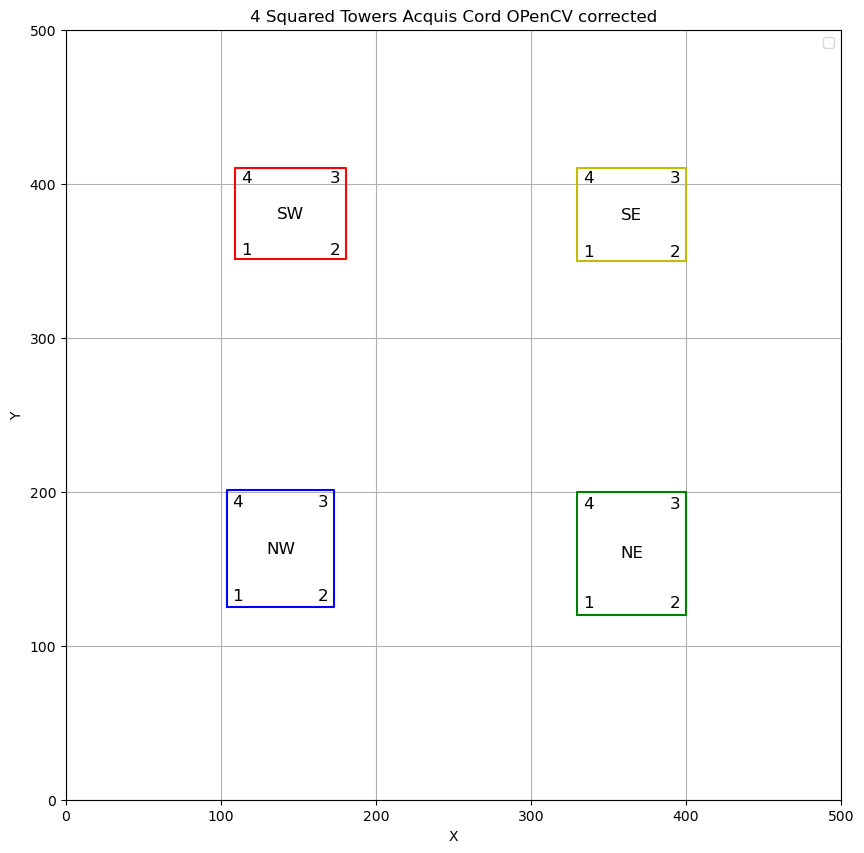

In [1125]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in towers_coordinates.items():
    plot_maze_ROIs(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Acquis Cord OPenCV corrected')
plt.grid(True)
plt.legend()

# Display plot
plt.show()


In [1126]:
def get_reward_spouts(Towers_coordinates):
    # Reward spouts dictionary to store midpoint coordinates
    reward_spouts = {}

    # Function to calculate middle point of a line segment
    def mid_point(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2]

    # Iterate through each tower and calculate the reward spouts
    for tower_name, coords in Towers_coordinates.items():
        # Initialize reward spouts dictionary for the tower
        reward_spouts[tower_name] = {}

        # The sides corresponding to North, East, South, West
        sides = ['N', 'E', 'S', 'W']

        # Calculate and store the midpoints of each side
        for j in range(4):
            # Midpoint of each side of the square
            mid = mid_point(coords[j], coords[(j + 1) % 4])
            # Save the reward spout position in the dictionary
            reward_spouts[tower_name][sides[j]] = mid

    return reward_spouts

# Example usage with Towers_coordinates
Towers_coordinates = {
    "NW": [[104, 125], [173, 125], [173, 201], [104, 201]],
    "NE": [[330, 120], [400, 120], [400, 200], [330, 200]],
    "SW": [[109, 351], [181, 351], [181, 410], [109, 410]],
    "SE": [[330, 350], [400, 350], [400, 410], [330, 410]]
}

reward_spouts = get_reward_spouts(Towers_coordinates)
print(reward_spouts)


{'NW': {'N': [138.5, 125.0], 'E': [173.0, 163.0], 'S': [138.5, 201.0], 'W': [104.0, 163.0]}, 'NE': {'N': [365.0, 120.0], 'E': [400.0, 160.0], 'S': [365.0, 200.0], 'W': [330.0, 160.0]}, 'SW': {'N': [145.0, 351.0], 'E': [181.0, 380.5], 'S': [145.0, 410.0], 'W': [109.0, 380.5]}, 'SE': {'N': [365.0, 350.0], 'E': [400.0, 380.0], 'S': [365.0, 410.0], 'W': [330.0, 380.0]}}


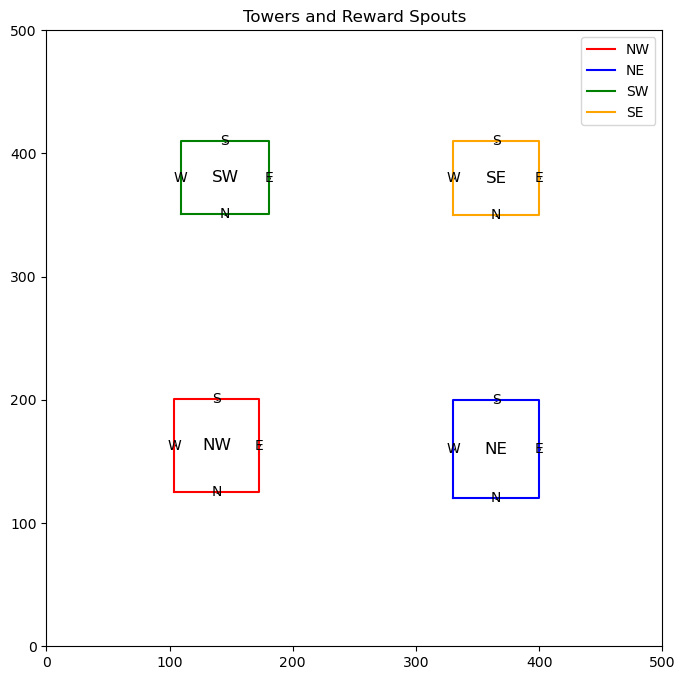

{'NW': {'N': [138.5, 125.0], 'E': [173.0, 163.0], 'S': [138.5, 201.0], 'W': [104.0, 163.0]}, 'NE': {'N': [365.0, 120.0], 'E': [400.0, 160.0], 'S': [365.0, 200.0], 'W': [330.0, 160.0]}, 'SW': {'N': [145.0, 351.0], 'E': [181.0, 380.5], 'S': [145.0, 410.0], 'W': [109.0, 380.5]}, 'SE': {'N': [365.0, 350.0], 'E': [400.0, 380.0], 'S': [365.0, 410.0], 'W': [330.0, 380.0]}}


In [1127]:
# Plot the towers and reward spouts and save the water spoots in a dictionary

# Tower coordinates
Towers_coordinates = {
    "NW": [[104, 125], [173, 125], [173, 201], [104, 201]],
    "NE": [[330, 120], [400, 120], [400, 200], [330, 200]],
    "SW": [[109, 351], [181, 351], [181, 410], [109, 410]],
    "SE": [[330, 350], [400, 350], [400, 410], [330, 410]]
}

# Reward spouts dictionary
reward_spouts = {}

# Function to calculate middle point of a line segment
def mid_point(p1, p2):
    return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2]

# Colors for the squares
colors = ['red', 'blue', 'green', 'orange']

# Plotting the towers and reward spouts
plt.figure(figsize=(8, 8))

for i, (tower_name, coords) in enumerate(Towers_coordinates.items()):
    # Extract x and y coordinates for each tower
    x_coords = [p[0] for p in coords]
    y_coords = [p[1] for p in coords]
    
    # Close the square by repeating the first point at the end
    x_coords.append(coords[0][0])
    y_coords.append(coords[0][1])
    
    # Plot the square
    plt.plot(x_coords, y_coords, color=colors[i], label=tower_name)
    
    # Plot and label the center of the tower
    center_x = sum(x_coords[:-1]) / 4
    center_y = sum(y_coords[:-1]) / 4
    plt.text(center_x, center_y, tower_name, fontsize=12, ha='center', va='center')
    
    # Initialize reward spouts dictionary for the tower
    reward_spouts[tower_name] = {}
    
    # Calculate and plot reward spouts
    sides = ['N', 'E', 'S', 'W']
    for j in range(4):
        # Midpoint of each side of the square
        mid = mid_point(coords[j], coords[(j + 1) % 4])
        
        # Save the reward spout position in the dictionary
        reward_spouts[tower_name][sides[j]] = mid
        
        # Plot the reward spout
        plt.scatter(mid[0], mid[1], color='black', marker='o', s=1)
        
        # Label the reward spout with its corresponding side
        plt.text(mid[0], mid[1], sides[j], fontsize=10, ha='center', va='center', color='black')

# Set plot limits
plt.xlim(0, 500)
plt.ylim(0, 500)

# Show the plot with legend
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Towers and Reward Spouts")
plt.show()

# Output reward spouts dictionary
print(reward_spouts)


In [1128]:
# This is the transformation we have to do to get the coordinates in pixel right, knowing that on open CV they go from 0,0 (upper left origin)  to (0,512), lower left max value
max_y = video_resolution[1]

# Transform the coordinates to have the origin at the lower left
transformed_towers_coordinates = {
    label: [[x, max_y - y] for x, y in vertices]
    for label, vertices in towers_coordinates.items()
}
print(transformed_towers_coordinates)


{'NW': [[104, 387], [173, 387], [173, 311], [104, 311]], 'NE': [[330, 392], [400, 392], [400, 312], [330, 312]], 'SW': [[109, 161], [181, 161], [181, 102], [109, 102]], 'SE': [[330, 162], [400, 162], [400, 102], [330, 102]]}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


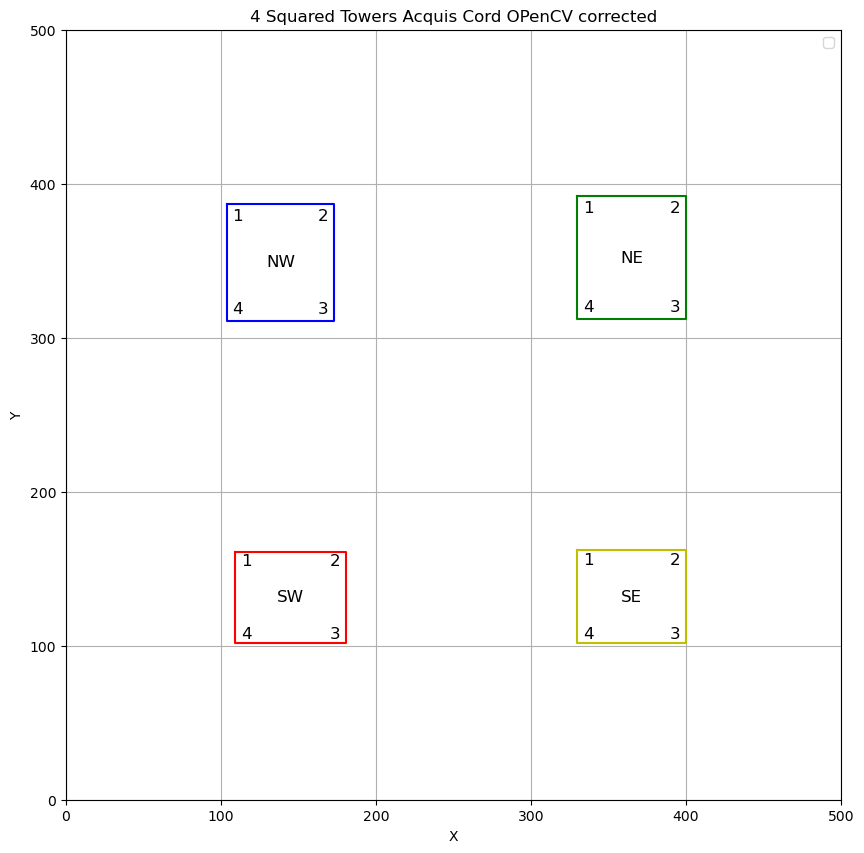

In [1129]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in transformed_towers_coordinates.items():
    plot_maze_ROIs(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Acquis Cord OPenCV corrected')
plt.grid(True)
plt.legend()

# Display plot
plt.show()


In [1130]:
# # #This below  will be deleted. No need to execute
# # now lets do the same with the coordinate in Alice original processing code
# #define the coordinates of each patch
# video_resolution=512,512
# NWpatch_coords = [[104, video_resolution[1] -  125], [173, video_resolution[1] -  125], [173, video_resolution[1] -  201], [104, video_resolution[1] -  201]]
# NEpatch_coords = [[330, video_resolution[1] -  120], [400, video_resolution[1] -  120], [400, video_resolution[1] -  200], [330, video_resolution[1] -  200]]
# SWpatch_coords = [[109, video_resolution[1] -  351], [181, video_resolution[1] -  351], [181, video_resolution[1] -  410], [109, video_resolution[1] -  410]]
# SEpatch_coords = [[330, video_resolution[1] -  350], [400, video_resolution[1] -  350], [400, video_resolution[1] -  410], [330, video_resolution[1] -  410]]
# towers_coordinates_alice = {
#     "NW": NWpatch_coords,
#     "NE": NEpatch_coords,
#     "SW": SWpatch_coords,
#     "SE": SEpatch_coords,
# }

# #This piece above will be deleted
# # Initialize plot
# plt.figure(figsize=(10, 10))

# # Colors for the towers
# colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# # Plot each tower
# for tower_name, vertices in towers_coordinates_alice.items():
#     plot_maze_ROIs(vertices, colors[tower_name], tower_name)

# # Set plot limits and labels
# plt.xlim(0, 500)
# plt.ylim(0, 500)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('4 Squared Towers Alice processing code')
# plt.grid(True)
# plt.legend()

# # Display plot
# plt.show()

{'NW': {'N': [[104, 387], [173, 387], [213, 427], [64, 427]], 'E': [[173, 387], [173, 311], [213, 271], [213, 427]], 'S': [[173, 311], [104, 311], [64, 271], [213, 271]], 'W': [[104, 311], [104, 387], [64, 427], [64, 271]]}, 'NE': {'N': [[330, 392], [400, 392], [440, 432], [290, 432]], 'E': [[400, 392], [400, 312], [440, 272], [440, 432]], 'S': [[400, 312], [330, 312], [290, 272], [440, 272]], 'W': [[330, 312], [330, 392], [290, 432], [290, 272]]}, 'SW': {'N': [[109, 161], [181, 161], [221, 201], [69, 201]], 'E': [[181, 161], [181, 102], [221, 62], [221, 201]], 'S': [[181, 102], [109, 102], [69, 62], [221, 62]], 'W': [[109, 102], [109, 161], [69, 201], [69, 62]]}, 'SE': {'N': [[330, 162], [400, 162], [440, 202], [290, 202]], 'E': [[400, 162], [400, 102], [440, 62], [440, 202]], 'S': [[400, 102], [330, 102], [290, 62], [440, 62]], 'W': [[330, 102], [330, 162], [290, 202], [290, 62]]}}


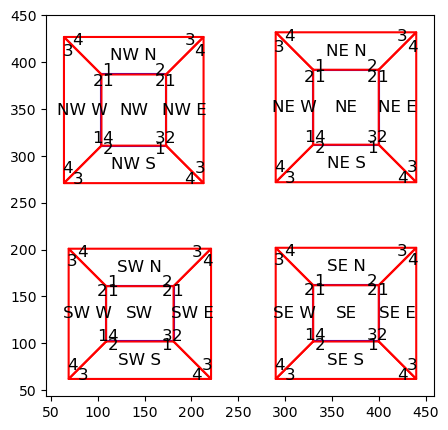

In [1131]:
#Now let's draw the trapezes around the towers, knowing their width and the transformed_towers_coordinates

trapeze_width = 40 

# Those vectors point in the direction of the 4 reward ports from the center of the tower (0,0)
# They will be used to determine turn direction around tower using angle_between function
cardinalvectors= {'N': (0,1),'E': (1,0),'S': (0,-1),'W': (-1,0), 'none':(0,0)}
def angle_between(vect1, vect2):
    ang1 = np.arctan2(*vect1[::-1])
    ang2 = np.arctan2(*vect2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

def trapeze_coordinates_from_tower(tower_coordinates, trapeze_width):
    """
    generate the trapezes coordinates surrounding a tower
    inputs:
    tower_coordinates - coordinates of the 4 corners of a tower [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    trapeze_width - width of the trapeze in pixels
    outputs:
    coordinates [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]] for the 4 trapezes (N, E, S, W).
    
    """

    trapeze_N = [tower_coordinates[0], tower_coordinates[1], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width]]
    trapeze_E = [tower_coordinates[1], tower_coordinates[2], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width]]
    trapeze_S = [tower_coordinates[2], tower_coordinates[3], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width]]
    trapeze_W = [tower_coordinates[3], tower_coordinates[0], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width]]
    return trapeze_N, trapeze_E, trapeze_S, trapeze_W


    # N = [patch[0], patch[1], [patch[1][0]+width, patch[1][1]+width], [patch[0][0]-width, patch[0][1]+width]]
    # E = [patch[1], patch[2], [patch[2][0]+width, patch[2][1]-width], [patch[1][0]+width, patch[1][1]+width]]
    # S = [patch[2], patch[3], [patch[3][0]-width, patch[3][1]-width], [patch[2][0]+width, patch[2][1]-width]]
    # W = [patch[3], patch[0], [patch[0][0]-width, patch[0][1]+width], [patch[3][0]-width, patch[3][1]-width]]
    # return N, E, S, W


# Initialize dictionary to store trapeze coordinates
all_trapezes_coordinates = {"NW": {}, "NE": {}, "SW": {}, "SE": {}}

# Iterate over each tower and compute trapeze coordinates
for tower_name, tower_coordinates in transformed_towers_coordinates.items():
    all_trapezes_coordinates[tower_name]["N"], \
    all_trapezes_coordinates[tower_name]["E"], \
    all_trapezes_coordinates[tower_name]["S"], \
    all_trapezes_coordinates[tower_name]["W"] = trapeze_coordinates_from_tower(tower_coordinates, trapeze_width)


print(all_trapezes_coordinates)

# Plot each transformed tower and its trapezes
for label, vertices in transformed_towers_coordinates.items():
    plot_maze_ROIs(vertices, 'blue', label)
    for direction, trapeze in all_trapezes_coordinates[label].items():
        plot_maze_ROIs(trapeze, 'red', f'{label} {direction}')

# Display the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [1132]:
#just for info 
all_trapezes_coordinates


{'NW': {'N': [[104, 387], [173, 387], [213, 427], [64, 427]],
  'E': [[173, 387], [173, 311], [213, 271], [213, 427]],
  'S': [[173, 311], [104, 311], [64, 271], [213, 271]],
  'W': [[104, 311], [104, 387], [64, 427], [64, 271]]},
 'NE': {'N': [[330, 392], [400, 392], [440, 432], [290, 432]],
  'E': [[400, 392], [400, 312], [440, 272], [440, 432]],
  'S': [[400, 312], [330, 312], [290, 272], [440, 272]],
  'W': [[330, 312], [330, 392], [290, 432], [290, 272]]},
 'SW': {'N': [[109, 161], [181, 161], [221, 201], [69, 201]],
  'E': [[181, 161], [181, 102], [221, 62], [221, 201]],
  'S': [[181, 102], [109, 102], [69, 62], [221, 62]],
  'W': [[109, 102], [109, 161], [69, 201], [69, 62]]},
 'SE': {'N': [[330, 162], [400, 162], [440, 202], [290, 202]],
  'E': [[400, 162], [400, 102], [440, 62], [440, 202]],
  'S': [[400, 102], [330, 102], [290, 62], [440, 62]],
  'W': [[330, 102], [330, 162], [290, 202], [290, 62]]}}

In [1133]:
#this function plots all the trapezes based on the provided coordinates
def plot_all_trapezes(all_trapezes_coordinates, xlim=(0, 85), ylim=(0, 85), figsize=(10, 10), title='', towers_color=['orange', 'purple', 'brown',  'cyan']):
    """
    Plots all the trapezes based on the provided coordinates, with each tower's trapezes colored differently.

    Parameters:
        all_trapezes_coordinates (dict): Dictionary containing the coordinates of each trapeze, organized by tower.
        xlim (tuple): Limits for the x-axis. Default is (0, 85).
        ylim (tuple): Limits for the y-axis. Default is (0, 85).
        figsize (tuple): Size of the figure. Default is (10, 10).
        title (str): Title of the plot. Default is 'Squares and Trapezes'.
    """

    # Initialize plot
    plt.figure(figsize=figsize)
    
    # Plot each square and trapeze with a specific color
    for i, (tower, trapezes) in enumerate(all_trapezes_coordinates.items()):
        color= towers_color[i]  # Cycle through the colors for each tower
        for trapeze, coordinates in trapezes.items():
            coordinates_copy = coordinates + [coordinates[0]]  # Close the polygon
            x_coords, y_coords = zip(*coordinates_copy)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color=color)
    
    # Set plot limits and labels
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)

    # Show plot
    plt.show()


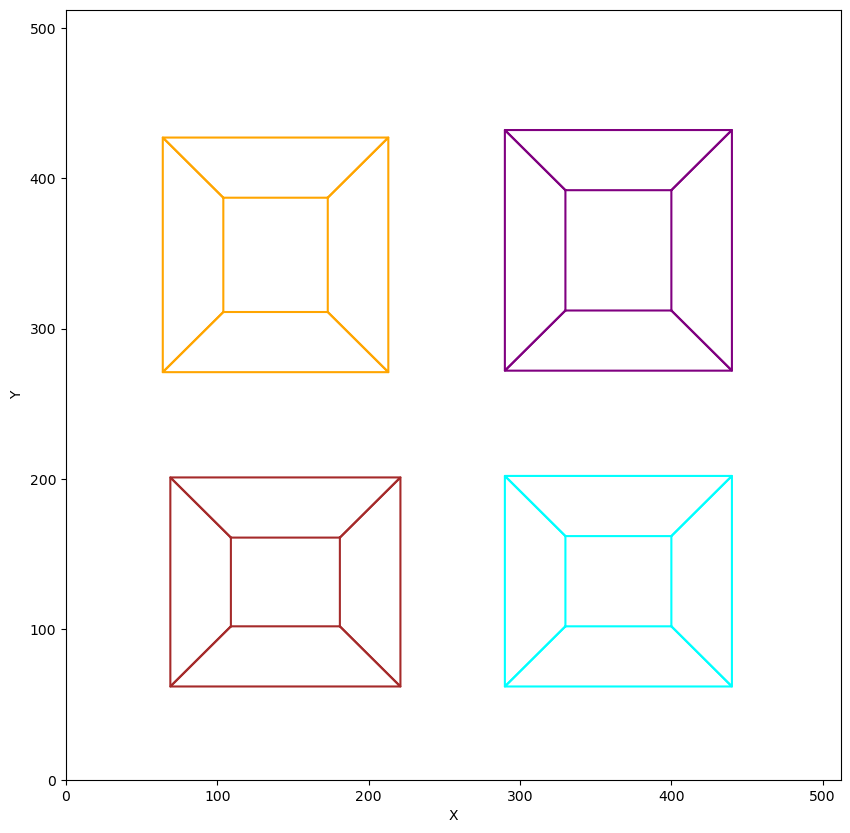

In [1134]:
plot_all_trapezes(all_trapezes_coordinates,xlim=(0, 512), ylim=(0, 512))


### now we're going to go through the processing of the trajectory.


In [1135]:
#SOME PROCESSING HERE
# We load the trajectory , turn info and parametres info from the csv files generated by the acqusition software
traj_df, turns_df, param_df=load_data(folder_path_mouse_to_process,session_to_process)

# Correct for some open CV flipping
smooth_sigma = 1 # The sigma used for the remaining of the analysis for smoothing
traject_time = traj_df['time'].to_numpy()
xpositions = traj_df['xposition'].to_numpy()
ypositions = traj_df['yposition'].to_numpy()
ypositions = video_resolution[1] - ypositions # yposition is inverted, puts it back in the right way. David: this is not simply an inversion because resolution is added

# Smooth positions
smoothed_Xpositions = smooth(xpositions, smooth_sigma)
smoothed_Ypositions = smooth(ypositions, smooth_sigma) # Smoothes the positions with true sigma
smoothed_positions_cm=[smoothed_Xpositions,smoothed_Ypositions]


We Can plot the trajectory. 

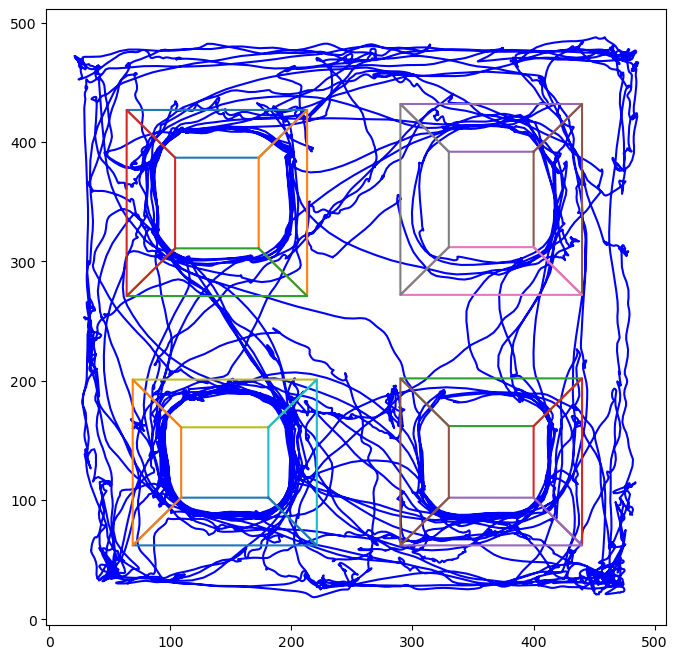

In [1136]:
# Could be delete in future (cf function below)
plt.figure(figsize=(8, 8))
    
# Plot trajectory speeds
plt.plot(smoothed_Xpositions,smoothed_Ypositions, label='Trajectory', color='blue')

# Plot each square and trapeze
for tower, trapezes in all_trapezes_coordinates.items():
    for trapeze, coordinates in trapezes.items():
        # Make a copy of the coordinates and close the polygon by appending the first vertex
        coordinates_copy = coordinates + [coordinates[0]]
        # Extract x and y coordinates for plotting
        x_coords, y_coords = zip(*coordinates_copy)
        plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')
plt.show()


In [1137]:
def plot_trajectory_with_trapezes(smoothed_Xpositions, smoothed_Ypositions, all_trapezes_coordinates, 
                                  ax=None, xlim=(0, 512), ylim=(0, 512), title='Trajectory with Trapezes'):
    """
    Plots the trajectory of the mice along with the trapezes. Can plot on a provided axis or create its own.

    Parameters:
        smoothed_Xpositions (list or np.array): List or array of smoothed X positions of the mice.
        smoothed_Ypositions (list or np.array): List or array of smoothed Y positions of the mice.
        all_trapezes_coordinates (dict): Dictionary containing the coordinates of each trapeze, organized by tower.
        ax (matplotlib.axes._subplots.AxesSubplot, optional): The axis on which to plot the trajectory and trapezes. 
                                                             If None, a new figure and axis are created.
        xlim (tuple): Limits for the x-axis. Default is (0, 512).
        ylim (tuple): Limits for the y-axis. Default is (0, 512).
        title (str): Title of the plot. Default is 'Trajectory with Trapezes'.
    """
    # Create a new figure and axis if no axis is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
        axcreated=1
    else:
        axcreated=0

    # Plot the trajectory
    ax.plot(smoothed_Xpositions, smoothed_Ypositions, label='Trajectory', color='black')

    # Generate a color map using matplotlib's tab10 colormap (which has 10 distinct colors) to plot the trapezes
    colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinct colors
    
    # Plot each square and trapeze with the same color for each tower
    for i, (tower, trapezes) in enumerate(all_trapezes_coordinates.items()):
        tower_color = colors[i % len(colors)]  # Cycle through the colors if there are more than 10 towers
        for trapeze, coordinates in trapezes.items():
            # Make a copy of the coordinates and close the polygon by appending the first vertex
            coordinates_copy = coordinates + [coordinates[0]]
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates_copy)
            ax.plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color=tower_color,linestyle='--')

    # Set plot limits and labels
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('X Position (cm)')
    ax.set_ylabel('Y Position (cm)')
    ax.set_title(title)
    #ax.grid(True)
    #ax.legend()

    # If no axis was provided, show the plot
    if axcreated:
        plt.show()


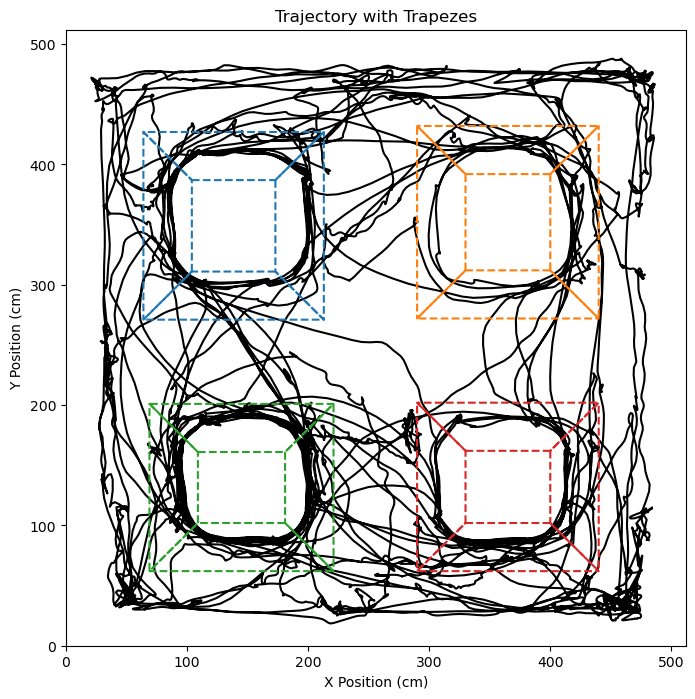

In [1138]:
plot_trajectory_with_trapezes(smoothed_Xpositions, smoothed_Ypositions, all_trapezes_coordinates)


In [1139]:
# #SOME PROCESSING HERE (WE NEED TO EXTRACT THE WIDTH OF THE ARENA IN PIXEL TO GENERATE A CONVERSION FACTOR)
# #this below is used to help calculate the conversion ratio to convert pixein in cm
# # Create a histogram with bins of size 1 pixel from 0 to 512
# bins = np.arange(0, 513)  # 513 because np.histogram uses bins as edges, so 512 is the last edge
# hist, bin_edges = np.histogram(smoothed_Xpositions, bins=bins)
# # Find the first and last bins with more than 10 values
# first_bin = None
# last_bin = None

# for i, count in enumerate(hist):
#     if count > 10:
#         if first_bin is None:
#             first_bin = bin_edges[i]
#         last_bin = bin_edges[i]

# # Conversion factor we know that the width of the arena is 84 cm 
# conversion_factor = 84 / (last_bin - first_bin) 

# print(f"First bin with more than 10 values: {first_bin}")
# print(f"Last bin with more than 10 values: {last_bin}")
# print(f"Width on the X axis: {last_bin-first_bin}")
# print(f"conversion factor cm per pixel { conversion_factor}")

# # Plot the histogram
# plt.figure(figsize=(10, 6))
# plt.bar(bin_edges[:-1], hist, width=1, edgecolor='black')
# plt.xlim(0, 512)
# plt.xlabel('Pixel Position')
# plt.ylabel('Frequency')
# plt.title('Distribution of Xsmooothposition')
# plt.grid(True)
# plt.show()


# This cell has been used to determine a conversion factor to transform coordinates in pixels into cm. 
# This has been commented because otherwise it will calculate this factor for every session processed (we don't want that)
# By using a familiarization session (where the mouse goes to the edges of the set-up a lot), we calculated this conversion factor
# Its value is 0.18 approximately (the size of the set-up does not change so don't need to calculate this for every session/animal)

Conversion of the trajectory and trapze coordinates from pixel to cm 

In [1140]:
#SOME PROCESSING HERE
# Transformed smooth position in pixel to cm
conversion_factor = 0.18 # Has been calculated thanks to one familiarization session

smoothed_Xpositions_cm = smoothed_Xpositions*conversion_factor
smoothed_Ypositions_cm = smoothed_Ypositions*conversion_factor
smoothed_positions_cm=[smoothed_Xpositions_cm,smoothed_Ypositions_cm]

# Function to convert pixels to cm
def convert_pix_to_cm(coordinate):
    return [round(coordinate[0] * conversion_factor, 2), round(coordinate[1] * conversion_factor, 2)]

# Convert all coordinates
all_trapezes_coordinates_cm = {}
for tower, trapezes in all_trapezes_coordinates.items():
    all_trapezes_coordinates_cm[tower] = {}
    for trapeze, coords in trapezes.items():
        all_trapezes_coordinates_cm[tower][trapeze] = [convert_pix_to_cm(coord) for coord in coords]

# Print the result for the trapezes
for tower, trapezes in all_trapezes_coordinates_cm.items():
    print(f"{tower}:")
    for trapeze, coords in trapezes.items():
        print(f"  {trapeze}: {coords}")


NW:
  N: [[18.72, 69.66], [31.14, 69.66], [38.34, 76.86], [11.52, 76.86]]
  E: [[31.14, 69.66], [31.14, 55.98], [38.34, 48.78], [38.34, 76.86]]
  S: [[31.14, 55.98], [18.72, 55.98], [11.52, 48.78], [38.34, 48.78]]
  W: [[18.72, 55.98], [18.72, 69.66], [11.52, 76.86], [11.52, 48.78]]
NE:
  N: [[59.4, 70.56], [72.0, 70.56], [79.2, 77.76], [52.2, 77.76]]
  E: [[72.0, 70.56], [72.0, 56.16], [79.2, 48.96], [79.2, 77.76]]
  S: [[72.0, 56.16], [59.4, 56.16], [52.2, 48.96], [79.2, 48.96]]
  W: [[59.4, 56.16], [59.4, 70.56], [52.2, 77.76], [52.2, 48.96]]
SW:
  N: [[19.62, 28.98], [32.58, 28.98], [39.78, 36.18], [12.42, 36.18]]
  E: [[32.58, 28.98], [32.58, 18.36], [39.78, 11.16], [39.78, 36.18]]
  S: [[32.58, 18.36], [19.62, 18.36], [12.42, 11.16], [39.78, 11.16]]
  W: [[19.62, 18.36], [19.62, 28.98], [12.42, 36.18], [12.42, 11.16]]
SE:
  N: [[59.4, 29.16], [72.0, 29.16], [79.2, 36.36], [52.2, 36.36]]
  E: [[72.0, 29.16], [72.0, 18.36], [79.2, 11.16], [79.2, 36.36]]
  S: [[72.0, 18.36], [59.4, 

In [1141]:
# Create a new dictionary with coordinates converted to cm
towers_coordinates_cm = {}

for key in transformed_towers_coordinates:
    towers_coordinates_cm[key] = [convert_pix_to_cm(coord) for coord in transformed_towers_coordinates[key]]

print(towers_coordinates_cm)


{'NW': [[18.72, 69.66], [31.14, 69.66], [31.14, 55.98], [18.72, 55.98]], 'NE': [[59.4, 70.56], [72.0, 70.56], [72.0, 56.16], [59.4, 56.16]], 'SW': [[19.62, 28.98], [32.58, 28.98], [32.58, 18.36], [19.62, 18.36]], 'SE': [[59.4, 29.16], [72.0, 29.16], [72.0, 18.36], [59.4, 18.36]]}


In [1142]:
reward_spouts = get_reward_spouts(towers_coordinates_cm)
print(reward_spouts)


{'NW': {'N': [24.93, 69.66], 'E': [31.14, 62.81999999999999], 'S': [24.93, 55.98], 'W': [18.72, 62.81999999999999]}, 'NE': {'N': [65.7, 70.56], 'E': [72.0, 63.36], 'S': [65.7, 56.16], 'W': [59.4, 63.36]}, 'SW': {'N': [26.1, 28.98], 'E': [32.58, 23.67], 'S': [26.1, 18.36], 'W': [19.62, 23.67]}, 'SE': {'N': [65.7, 29.16], 'E': [72.0, 23.759999999999998], 'S': [65.7, 18.36], 'W': [59.4, 23.759999999999998]}}


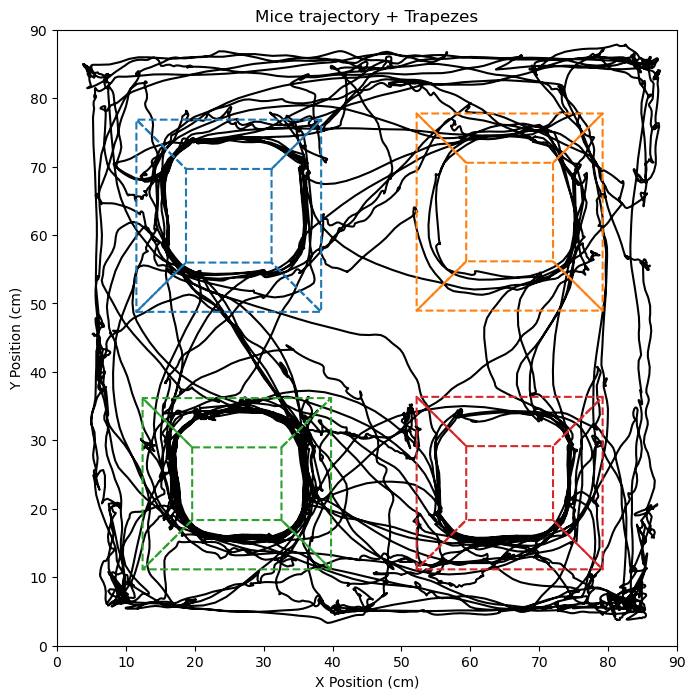

In [1143]:
plot_trajectory_with_trapezes(smoothed_Xpositions_cm, smoothed_Ypositions_cm, all_trapezes_coordinates_cm, xlim=(0, 90), ylim=(0, 90), title='Mice trajectory + Trapezes')


## Compute instantaneous distanced, speeds and angular speedes

Number of Distances: 17603
Number of Speeds: 17603
Number of Angular Speeds: 8717


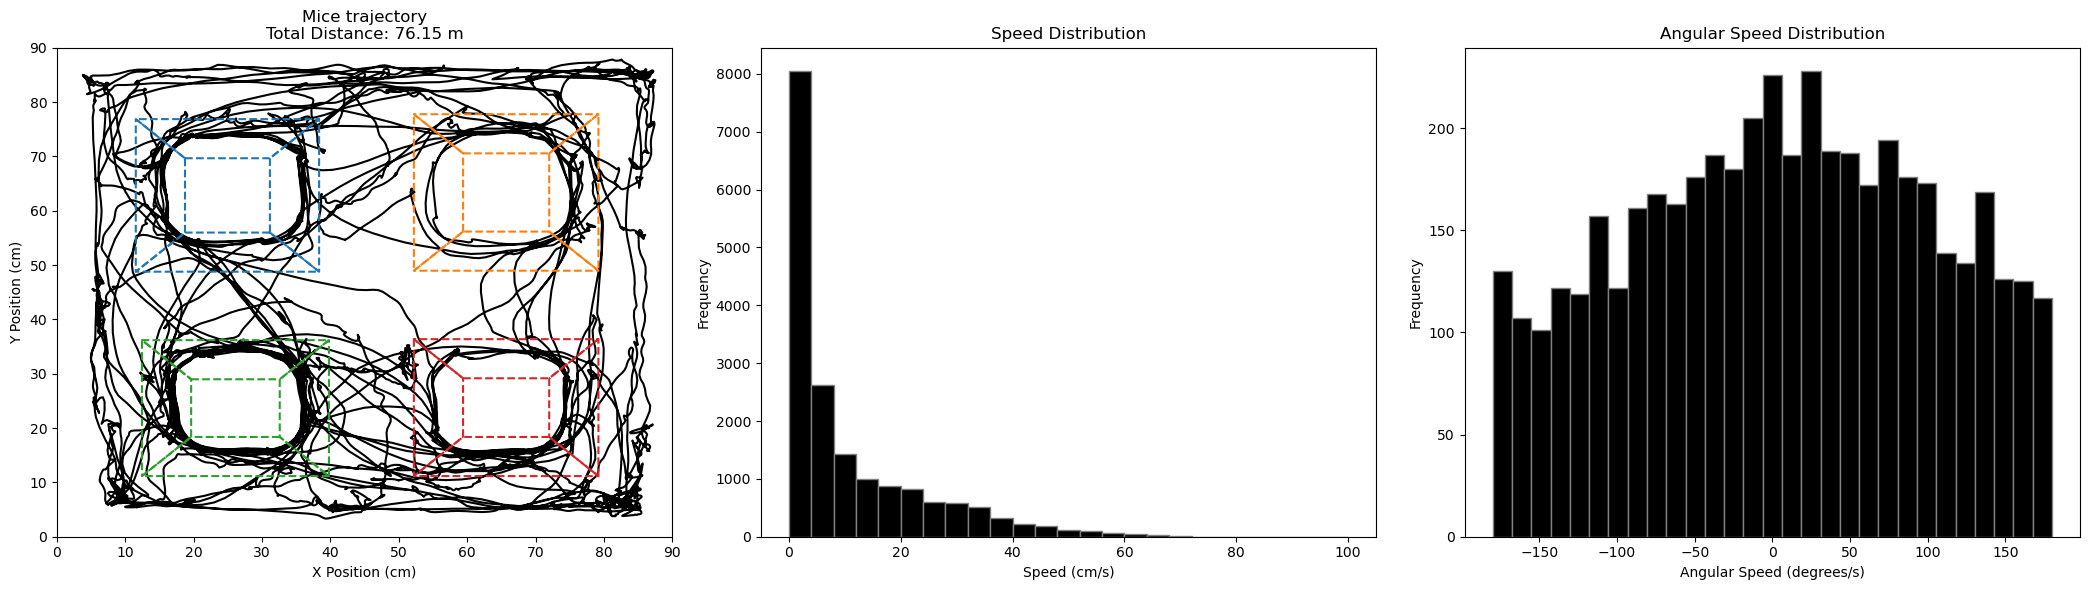

In [1144]:
#assert False, "Stopping execution here."
# SOME PROCESSING HERE

# Function to compute distance, speed, and angular speed in degrees per second. 
# We only compute angular speed when mice is moving above a certain speed threshold in cm/s
def compute_distance_speed_angular_speed(Xpositions, Ypositions, traject_time, speed_threshold=5):
    # Calculate the differences between consecutive points
    delta_x = np.diff(Xpositions)
    delta_y = np.diff(Ypositions)
    delta_t = np.diff(traject_time)
    
    # Compute the distances traveled between each timepoint
    distances = np.sqrt(delta_x**2 + delta_y**2)
    
    speeds = distances / delta_t
    smooth_sigma = 1 # The sigma used for the remaining of the analysis for smoothing
    speeds = smooth(speeds, smooth_sigma)
    
    # Compute the angles between each timepoint
    angles = np.arctan2(delta_y, delta_x)
    
    # Compute the differences between consecutive angles
    delta_angles = np.diff(angles)
    
    # Convert delta_angles from radians to degrees
    delta_angles_deg = np.degrees(delta_angles)
    
    # Ensure angles are within -180 to 180 range
    delta_angles_deg = (delta_angles_deg + 180) % 360 - 180
    
    # Mask speeds below the threshold
    valid_mask = speeds > speed_threshold
    
    # Compute angular speeds in degrees per second
    angular_speeds = np.zeros_like(delta_angles_deg)
    valid_delta_t = delta_t[1:][valid_mask[1:]]
    angular_speeds[valid_mask[1:]] = delta_angles_deg[valid_mask[1:]] / valid_delta_t

    # Filter angular speeds to include only those above the threshold
    filtered_angular_speeds = angular_speeds[valid_mask[1:]]

    distances= np.insert(distances, 0, 0) # insert a 0 to avoid length error with trajectory times. We consider that
                                            # at the first frame the distance is null
    speeds = np.insert(speeds, 0, 0) # insert a 0 to avoid length error with trajectory times. We consider that
                                            # at the first frame the speed is null

    return distances, speeds, filtered_angular_speeds

# Compute instantaneous distances, speeds, and angular speeds
distances, speeds, angular_speeds = compute_distance_speed_angular_speed(smoothed_Xpositions_cm, smoothed_Ypositions_cm, traject_time)

# Print distances, speeds, and angular speeds
print("Number of Distances:", len(distances))
print("Number of Speeds:", len(speeds))
print("Number of Angular Speeds:", len(angular_speeds))

# Calculate total distance in m
total_distance = np.sum(distances)/100  # Convert cm to m

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plot trajectory
#axs[0].plot(smoothed_Xpositions_cm, smoothed_Ypositions_cm, color='k', linestyle='-')
titlewithinfo = f'Mice trajectory\nTotal Distance: {total_distance:.2f} m'
plot_trajectory_with_trapezes(smoothed_Xpositions_cm, smoothed_Ypositions_cm, all_trapezes_coordinates_cm, ax=axs[0],xlim=(0, 90), ylim=(0, 90),title=titlewithinfo)
#axs[0].set_title(f'Trajectory\nTotal Distance: {total_distance:.2f} cm')
axs[0].set_xlabel('X Position (cm)')
axs[0].set_ylabel('Y Position (cm)')

# Plot speed distribution
bins_speed = np.arange(0, 104, 4)  # Bins from 0 to 100 cm/s in steps of 4 cm/s
axs[1].hist(speeds, bins=bins_speed, edgecolor='gray',color='k')
axs[1].set_title('Speed Distribution')
axs[1].set_xlabel('Speed (cm/s)')
axs[1].set_ylabel('Frequency')

# Plot angular speed distribution
bins_angular_speed = np.linspace(-180, 180, 30)  # Bins for angular speeds from -180 to 180 degrees/s
axs[2].hist(angular_speeds, bins=bins_angular_speed, edgecolor='gray',color='k')
axs[2].set_title('Angular Speed Distribution')
axs[2].set_xlabel('Angular Speed (degrees/s)')
axs[2].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


In [1145]:
# assert False, "Stopping execution here."

In [1146]:
# Test pickle file

pickle_file = os.path.join(folder_path_mouse_to_process, session_to_process, session_to_process + '_basic_processing_output.pickle')

with open(pickle_file, 'rb') as f:
    session_data = pickle.load(f)

print(f"Position 0 : {session_data['positions'][0]} \n")
print(f"Position 1 : {session_data['positions'][1]}")
session_data['towers_coordinates_cm']


Position 0 : [34.91303108 35.26871991 35.77898894 ... 83.73717564 83.62916389
 83.52197394] 

Position 1 : [57.80011487 58.27290598 58.93359023 ...  3.94976683  4.02371829
  4.06776536]


{'NW': [[19.47, 72.69], [33.38, 72.69], [33.38, 58.78], [19.47, 58.78]],
 'NE': [[60.26, 72.69], [75.1, 72.69], [75.1, 58.78], [60.26, 58.78]],
 'SW': [[21.32, 31.52], [34.3, 31.52], [34.3, 18.54], [21.32, 18.54]],
 'SE': [[60.26, 31.52], [74.17, 31.52], [74.17, 18.54], [60.26, 18.54]]}

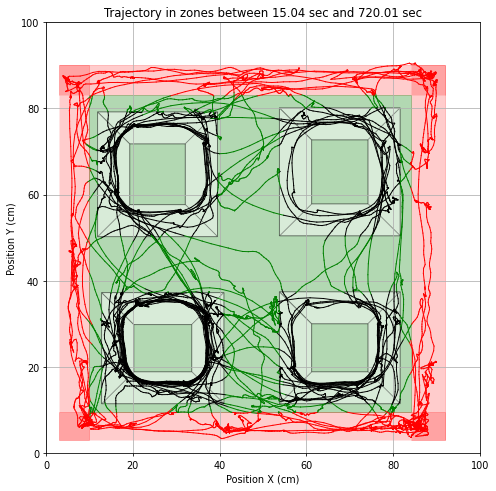

Time spent in zones: {'border': 289.74, 'trapeze': 300.5, 'interior': 113.93} in seconds
Distances traveled in zones : {'border': 2363.03, 'trapeze': 4071.44, 'interior': 1406.94} in cm


In [1147]:
# Step-by-step calculate_time_distance_in_zones function

# Change these values if you want to analyze a specific time (in seconds) of the session
# If None, the entire session will be analyzed
time_start = None
time_end = None

# Path creation and loading pickle file
pickle_file = os.path.join(folder_path_mouse_to_process, session_to_process, session_to_process + '_basic_processing_output.pickle')

with open(pickle_file, 'rb') as f:
    session_data = pickle.load(f)

# Analyze entire session or not
if time_start is None:
    time_start = traject_time[0]
if time_end is None:
    time_end = traject_time[-1]

# Find the indices corresponding to the specified time interval
start_idx = np.searchsorted(traject_time, time_start)
end_idx = np.searchsorted(traject_time, time_end)

# Extract the necessary data from the pickle
traject_time = session_data['timeofframes']
smoothed_Xpositions_cm = session_data['positions'][0]
smoothed_Ypositions_cm = session_data['positions'][1]
all_trapezes_coordinates_cm, towers_coordinates_cm = generate_trapeze_and_tower_coordinates(towers_coordinates, trapeze_width=40)

# Extract data from the selected period
selected_Xpositions = smoothed_Xpositions_cm[start_idx:end_idx]
selected_Ypositions = smoothed_Ypositions_cm[start_idx:end_idx]
selected_time = traject_time[start_idx:end_idx]

# Function to create a bounding box around trapezes
def get_bounding_box(trapezes):
    all_coords = np.concatenate([coordinates for trapeze, coordinates in trapezes.items()])
    xmin, ymin = np.min(all_coords, axis=0)
    xmax, ymax = np.max(all_coords, axis=0)
    return [(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)]

# Define coordinates of border zone (red)
border_zone = [
    [(3, 3), (10, 3), (10, 90), (3, 90)],  # left
    [(3, 3), (3, 9.5), (92, 9.5), (92, 3)],  # down
    [(84, 3), (92, 3), (92, 90), (84, 90)],  # right
    [(3, 83), (3, 90), (92, 90), (92, 83)]   # up
]

# Create the polygons for the border area
border_polygons = [mpath.Path(zone) for zone in border_zone]

# Dimensions and creation of a polygon of the inner area (green)
inner_setup_size = (10, 9.5, 84, 83)

interior_polygon = mpath.Path([
    (inner_setup_size[0], inner_setup_size[1]),
    (inner_setup_size[0], inner_setup_size[3]),
    (inner_setup_size[2], inner_setup_size[3]),
    (inner_setup_size[2], inner_setup_size[1])
])

# Create a large green rectangle for the inner area
outer_rect = patches.Rectangle((inner_setup_size[0], inner_setup_size[1]),
                               inner_setup_size[2] - inner_setup_size[0],
                               inner_setup_size[3] - inner_setup_size[1],
                               facecolor='green', alpha=0.3, edgecolor='green')

# Create a polygone for the trapezes zones (white)
trapeze_polygons = []
for tower, trapezes in all_trapezes_coordinates_cm.items():
    for trapeze, coords in trapezes.items():
        trapeze_polygons.append(mpath.Path(coords))

# Create the figure
fig, ax = plt.subplots(figsize=(8, 8), dpi=70)

# Add the inner area (green)
ax.add_patch(outer_rect)

# Add the polygons for the border (red)
for polygon in border_polygons:
    patch = patches.PathPatch(polygon, facecolor='red', alpha=0.2, edgecolor='red')
    ax.add_patch(patch)

# Add the polygons for the trapezoids (white)
for polygon in trapeze_polygons:
    patch = patches.PathPatch(polygon, facecolor='white', alpha=0.5, edgecolor='black')
    ax.add_patch(patch)

# Variables to store time/distance spent in each zone
time_in_border = 0
time_in_trapeze = 0
time_in_interior = 0
distance_in_border = 0
distance_in_trapeze = 0
distance_in_interior = 0

# Browse the trajectory positions and calculate the time and distance in each area
for i in range(len(selected_Xpositions) - 1):
    point_start = np.array([selected_Xpositions[i], selected_Ypositions[i]])
    point_end = np.array([selected_Xpositions[i+1], selected_Ypositions[i+1]])

    # Calculate the time interval between each point
    dt = selected_time[i+1] - selected_time[i]
    
    # Calculate the distance between two successive points
    distance = np.linalg.norm(point_end - point_start)

    # Test if the initial point is in the 'border' zone (red)
    if any(polygon.contains_point(point_start) for polygon in border_polygons):
        time_in_border += dt
        distance_in_border += distance
        color_traj = 'red'

    # Test if the initial point is in the 'trapeze' (white) area
    elif any(polygon.contains_point(point_start) for polygon in trapeze_polygons):
        time_in_trapeze += dt
        distance_in_trapeze += distance
        color_traj = 'black'

    # Test if the initial point is in the inner (green) zone
    elif interior_polygon.contains_point(point_start):
        time_in_interior += dt
        distance_in_interior += distance
        color_traj = 'green'
    
    # Trace the trajectory between two successive points with the appropriate color
    ax.plot([point_start[0], point_end[0]], [point_start[1], point_end[1]], color=color_traj, lw=1)

# Return results in a dictionary, rounded to 2 decimal places
time_spent_in_zones = {
    'border': round(time_in_border, 2),
    'trapeze': round(time_in_trapeze, 2),
    'interior': round(time_in_interior, 2)
}

distance_covered_in_zones = {
    'border': round(distance_in_border, 2),
    'trapeze': round(distance_in_trapeze, 2),
    'interior': round(distance_in_interior, 2)
}

# Final configurations
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_title(f"Trajectory in zones between {time_start:.2f} sec and {time_end:.2f} sec")
plt.xlabel('Position X (cm)')
plt.ylabel('Position Y (cm)')
plt.grid()
plt.show()

# Time and distance results
print(f"Time spent in zones: {time_spent_in_zones} in seconds")
print(f"Distances traveled in zones : {distance_covered_in_zones} in cm")


In [1148]:
# Function to calculate time and distance spent in zones

# Coordinates of the rectangles representing the edges of the setup
# These values are in centimeters
border_zone = [
    [(3, 3), (10, 3), (10, 90), (3, 90)],  # left
    [(3, 3), (3, 9.5), (92, 9.5), (92, 3)],  # down
    [(84, 3), (92, 3), (92, 90), (84, 90)],  # right
    [(3, 83), (3, 90), (92, 90), (92, 83)]   # up
]

def calculate_time_distance_in_zones(folder_path_mouse_to_process, session_to_process, border_zone, trapeze_width, time_start=None, time_end=None):
    """This function is used to calculate the total time spent and total distance traveled in border, inner and trapezes areas during session. 
    Arguments:
    - folder_path_mouse_to_process
    - session_to_process
    - border_zone : dictionnary of coordinates that define the border zone
    - towers_coordinates : dictionnary of towers coordinates in pixel
    - trapeze_width : value in pixel to set up the size of the trapezes

    Outputs: 
    - time_spent_in_zones : dictionnary with area as key and time spent inside as value
    - distance_covered_in_zones : dictionnary with area as key and distance traveled inside as value
    """

    # Build the path to the session pickle file
    pickle_file = os.path.join(folder_path_mouse_to_process, session_to_process, session_to_process + '_basic_processing_output.pickle')
    
    towers_coordinates=get_trapeze_and_tower_data(folder_path_mouse_to_process, session_to_process)[1]
    
    
    
    # Load data from pickle file
    with open(pickle_file, 'rb') as f:
        session_data = pickle.load(f)
    
    # Extract the necessary data from the pickle in the selected period
    traject_time = session_data['timeofframes']
    smoothed_Xpositions_cm = session_data['positions'][0]
    smoothed_Ypositions_cm = session_data['positions'][1]
    all_trapezes_coordinates_cm = generate_trapeze_and_tower_coordinates(towers_coordinates, trapeze_width)[0]

    # If None, the entire session will be analyzed
    if time_start is None:
        time_start = traject_time[0]
    if time_end is None:
        time_end = traject_time[-1]

    # Find the indices corresponding to the specified time interval
    start_idx = np.searchsorted(traject_time, time_start)
    end_idx = np.searchsorted(traject_time, time_end)

    # Extract data from the selected period
    selected_Xpositions = smoothed_Xpositions_cm[start_idx:end_idx]
    selected_Ypositions = smoothed_Ypositions_cm[start_idx:end_idx]
    selected_time = traject_time[start_idx:end_idx]

    # Border zones (red)
    border_polygons = [
        mpath.Path(border_zone[0]),  # Left
        mpath.Path(border_zone[1]),  # Down
        mpath.Path(border_zone[2]),  # Right
        mpath.Path(border_zone[3])   # Up
    ]
    
    # Trapezes zones (white)
    trapeze_polygons = []
    for tower, trapezes in all_trapezes_coordinates_cm.items():
        for trapeze, coords in trapezes.items():
            trapeze_polygons.append(mpath.Path(coords))
    
    # Interior zone (green)
    inner_setup_size = (10, 9.5, 84, 83)
    interior_polygon = mpath.Path([
        (inner_setup_size[0], inner_setup_size[1]),
        (inner_setup_size[0], inner_setup_size[3]),
        (inner_setup_size[2], inner_setup_size[3]),
        (inner_setup_size[2], inner_setup_size[1])
    ])
    
    # Variables to store time/distance spent in each zone
    time_in_border = 0
    time_in_trapeze = 0
    time_in_interior = 0
    distance_in_border = 0
    distance_in_trapeze = 0
    distance_in_interior = 0
    
    # Browse the trajectory positions and calculate the time and distance in each area
    for i in range(len(selected_Xpositions) - 1):
        point_start = np.array([selected_Xpositions[i], selected_Ypositions[i]])
        point_end = np.array([selected_Xpositions[i+1], selected_Ypositions[i+1]])

        # Calculate the time interval between each point
        dt = selected_time[i+1] - selected_time[i]
        
        # Calculate the distance between two successive points
        distance = np.linalg.norm(point_end - point_start)

        # Test if the initial point is in the 'border' zone (red)
        if any(polygon.contains_point(point_start) for polygon in border_polygons):
            time_in_border += dt
            distance_in_border += distance

        # Test if the initial point is in the 'trapeze' (white) area
        elif any(polygon.contains_point(point_start) for polygon in trapeze_polygons):
            time_in_trapeze += dt
            distance_in_trapeze += distance

        # Test if the initial point is in the inner (green) zone
        elif interior_polygon.contains_point(point_start):
            time_in_interior += dt
            distance_in_interior += distance

    # Return results in a dictionary, rounded to 2 decimal
    time_spent_in_zones = {
        'border': round(time_in_border, 2),
        'trapeze': round(time_in_trapeze, 2),
        'interior': round(time_in_interior, 2)
    }

    distance_covered_in_zones = {
        'border': round(distance_in_border, 2),
        'trapeze': round(distance_in_trapeze, 2),
        'interior': round(distance_in_interior, 2)
    }
    
    return time_spent_in_zones, distance_covered_in_zones


In [1149]:
# Example usage of the function above

# Initiate lists for graph
time_in_border_list = []
time_in_trapeze_list = []
time_in_interior_list = []
distance_in_border_list = []
distance_in_trapeze_list = []
distance_in_interior_list = []
session_names = []

# Initiate dictionnary to stock results per session
time_spent_in_zones = {}
distance_covered_in_zones = {}

# for session in session_to_process:
print(f"Session : {session_to_process} \n")

# Calculate the time spent in each zone
time_spent_in_zones, distance_covered_in_zones = calculate_time_distance_in_zones(folder_path_mouse_to_process, session_to_process, border_zone, trapeze_width=40, time_start=None, time_end=None)

# Store results in dictionary and lists
session_names.append(session_to_process)
time_in_border_list.append(time_spent_in_zones['border'])
time_in_trapeze_list.append(time_spent_in_zones['trapeze'])
time_in_interior_list.append(time_spent_in_zones['interior'])
distance_in_border_list.append(distance_covered_in_zones['border'])
distance_in_trapeze_list.append(distance_covered_in_zones['trapeze'])
distance_in_interior_list.append(distance_covered_in_zones['interior'])

# Show results
print(f"Time spent in border area : {time_in_border_list} sec")
print(f"Time spent in trapeze area : {time_in_trapeze_list} sec")
print(f"Time spent in inner area : {time_in_interior_list} sec \n")
print(f"Distance traveled in border area : {distance_in_border_list} cm")
print(f"Distance traveled in trapeze area : {distance_in_trapeze_list} cm")
print(f"Distance traveled in inner area : {distance_in_interior_list} cm \n")

Session : MOU4695_20241007-0916 

Time spent in border area : [289.74] sec
Time spent in trapeze area : [323.45] sec
Time spent in inner area : [90.98] sec 

Distance traveled in border area : [2363.03] cm
Distance traveled in trapeze area : [4237.01] cm
Distance traveled in inner area : [1241.37] cm 



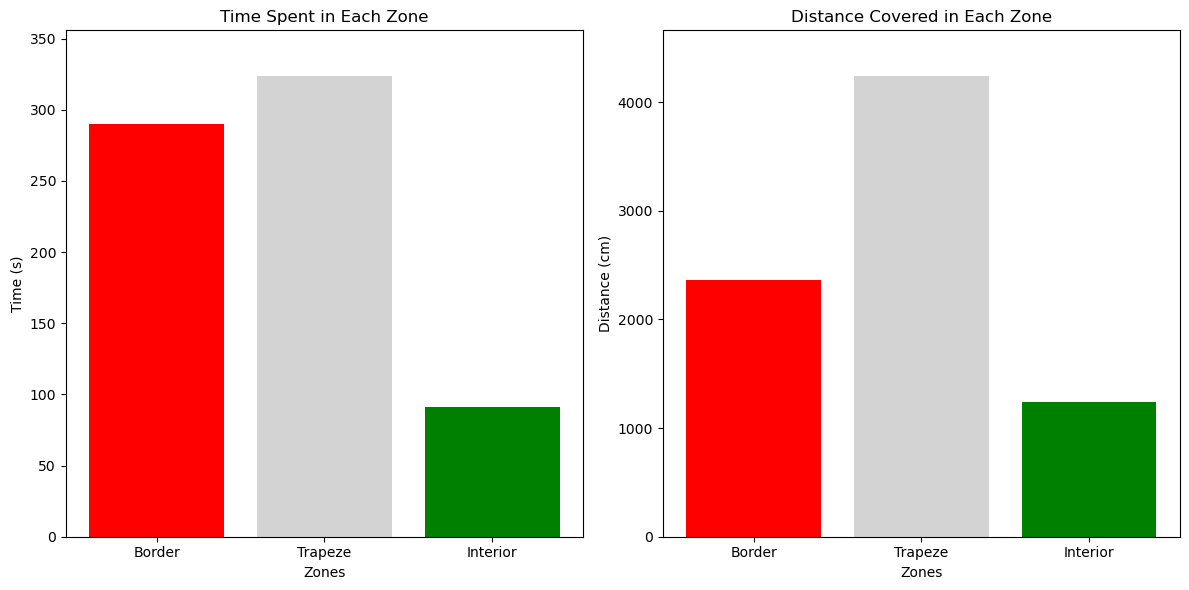

In [1150]:
# Plot time/distance in zones

# Lists of areas and associated colors
zones = ['Border', 'Trapeze', 'Interior']
colors = ['red', 'lightgray', 'green']

# Data to plot
time_data = [time_in_border_list[0], time_in_trapeze_list[0], time_in_interior_list[0]]
distance_data = [distance_in_border_list[0], distance_in_trapeze_list[0], distance_in_interior_list[0]]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Plot 1: Time spent in zones ---
axes[0].bar(zones, time_data, color=colors)
axes[0].set_title('Time Spent in Each Zone')
axes[0].set_xlabel('Zones')
axes[0].set_ylabel('Time (s)')
axes[0].set_ylim(0, max(time_data) * 1.1)  # To leave some space above the bars

# --- Plot 2: Distance traveled in zones ---
axes[1].bar(zones, distance_data, color=colors)
axes[1].set_title('Distance Covered in Each Zone')
axes[1].set_xlabel('Zones')
axes[1].set_ylabel('Distance (cm)')
axes[1].set_ylim(0, max(distance_data) * 1.1)

# Adjust spacing between plots for better display
plt.tight_layout()

# Show plot
plt.show()


In [1151]:
# # Time and distances across sessions

# # Initialiser les listes pour chaque zone (temps et distance)
# time_in_border_list = []
# time_in_trapeze_list = []
# time_in_interior_list = []
# distance_in_border_list = []
# distance_in_trapeze_list = []
# distance_in_interior_list = []
# session_numbers = []

# # Dictionnaire pour stocker les résultats par session
# time_spent_in_zones = {}
# distance_covered_in_zones = {}

# # Parcourir toutes les sessions du premier animal
# for session_idx, session_to_process in enumerate(session_list[mice_list[1]], start=1):
#     # print(f"Session {session_idx}: {session_to_process} \n")
    
#     # Calculer le temps et la distance passés dans chaque zone pour chaque session
#     time_spent_in_zones, distance_covered_in_zones = calculate_time_distance_in_zones(
#         folder_path_mouse_to_process, session_to_process, 
#         border_zone, towers_coordinates, trapeze_width=40, time_start=None, time_end=None
#     )
    
#     # Stocker les résultats dans des listes pour les graphiques
#     session_numbers.append(session_idx)
#     time_in_border_list.append(time_spent_in_zones['border'])
#     time_in_trapeze_list.append(time_spent_in_zones['trapeze'])
#     time_in_interior_list.append(time_spent_in_zones['interior'])
#     distance_in_border_list.append(distance_covered_in_zones['border'])
#     distance_in_trapeze_list.append(distance_covered_in_zones['trapeze'])
#     distance_in_interior_list.append(distance_covered_in_zones['interior'])

# # Générer les graphiques
# # Graphique pour le temps passé dans chaque zone
# plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(session_numbers, time_in_border_list, label='Border', marker='o', color='red')
# plt.plot(session_numbers, time_in_trapeze_list, label='Trapeze', marker='o', color='black')
# plt.plot(session_numbers, time_in_interior_list, label='Interior', marker='o', color='green')
# plt.xlabel('Session')
# plt.ylabel('Time Spent (s)')
# plt.title('Time Spent in Each Zone Across Sessions')
# plt.xticks(rotation=45)
# plt.legend()
# # plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Graphique pour la distance parcourue dans chaque zone
# plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(session_numbers, distance_in_border_list, label='Border', marker='o', color='red')
# plt.plot(session_numbers, distance_in_trapeze_list, label='Trapeze', marker='o', color='black')
# plt.plot(session_numbers, distance_in_interior_list, label='Interior', marker='o', color='green')
# plt.xlabel('Session')
# plt.ylabel('Distance Covered (cm)')
# plt.title('Distance Covered in Each Zone Across Sessions')
# plt.xticks(rotation=45)
# plt.legend()
# # plt.grid(True)
# plt.tight_layout()
# plt.show()


In [1152]:
# Ratios calculation

print("* Ratios distance/time: \n")

# Calculate distance/time ratios for each zone
ratio_border_list = [dist / time if time != 0 else 0 for dist, time in zip(distance_in_border_list, time_in_border_list)]
print(f"Ratio distance/time in border zone: {round(ratio_border_list[0],2)}")

ratio_trapeze_list = [dist / time if time != 0 else 0 for dist, time in zip(distance_in_trapeze_list, time_in_trapeze_list)]
print(f"Ratio distance/time in trapeze zone: {round(ratio_trapeze_list[0],2)}")

ratio_interior_list = [dist / time if time != 0 else 0 for dist, time in zip(distance_in_interior_list, time_in_interior_list)]
print(f"Ratio distance/time in inner zone: {round(ratio_interior_list[0],2)} \n")

print("* Ratios trapeze arena over border arena: \n")

# Calculate the time and distance ratios between trapeze and border
ratio_time_trapeze_border = [trapeze / border if border != 0 else 0 for trapeze, border in zip(time_in_trapeze_list, time_in_border_list)]
print(f"Ratio time spent in trapeze arena over border arena: {round(ratio_time_trapeze_border[0],2)}")

ratio_distance_trapeze_border = [trapeze / border if border != 0 else 0 for trapeze, border in zip(distance_in_trapeze_list, distance_in_border_list)]
print(f"Ratio distance traveled in trapeze arena over border arena: {round(ratio_distance_trapeze_border[0],2)}")

* Ratios distance/time: 

Ratio distance/time in border zone: 8.16
Ratio distance/time in trapeze zone: 13.1
Ratio distance/time in inner zone: 13.64 

* Ratios trapeze arena over border arena: 

Ratio time spent in trapeze arena over border arena: 1.12
Ratio distance traveled in trapeze arena over border arena: 1.79


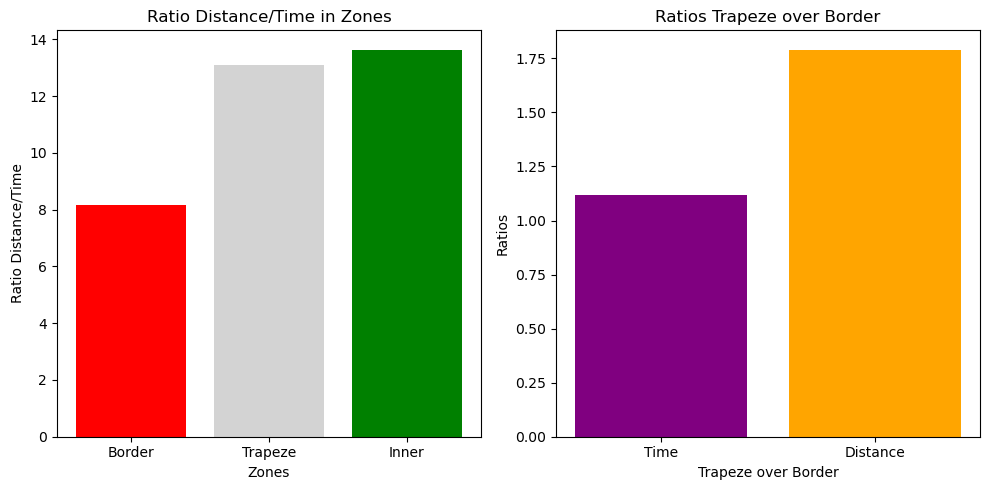

In [1153]:
# Données pour les ratios distance/temps dans chaque zone
zones = ['Border', 'Trapeze', 'Inner']
ratios_distance_time = [round(ratio_border_list[0], 2), 
                        round(ratio_trapeze_list[0], 2), 
                        round(ratio_interior_list[0], 2)]

# Données pour les ratios trapeze over border
ratios_trapeze_over_border = ['Time', 'Distance']
ratios_time_distance = [round(ratio_time_trapeze_border[0], 2), 
                        round(ratio_distance_trapeze_border[0], 2)]

# Création de la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Premier graphique - Histogramme des ratios distance/temps pour chaque zone
ax1.bar(zones, ratios_distance_time, color=['red', 'lightgray', 'green'])
ax1.set_title('Ratio Distance/Time in Zones')
ax1.set_ylabel('Ratio Distance/Time')
ax1.set_xlabel('Zones')
# ax1.set_ylim([0,30])

# Deuxième graphique - Histogramme des ratios trapeze over border (temps et distance)
ax2.bar(ratios_trapeze_over_border, ratios_time_distance, color=['purple', 'orange'])
ax2.set_title('Ratios Trapeze over Border')
ax2.set_ylabel('Ratios')
ax2.set_xlabel('Trapeze over Border')
# ax2.set_ylim([0,10])


# Affichage des graphiques
plt.tight_layout()
plt.show()


In [1154]:
# # Plot ratio trapeze/border

# # Calculer les ratios temps et distance entre trapeze et border
# ratio_time_trapeze_border = [trapeze / border if border != 0 else 0 for trapeze, border in zip(time_in_trapeze_list, time_in_border_list)]
# print(ratio_time_trapeze_border)
# ratio_distance_trapeze_border = [trapeze / border if border != 0 else 0 for trapeze, border in zip(distance_in_trapeze_list, distance_in_border_list)]

# # Graphique pour le ratio du temps passé dans la zone trapeze par rapport à la zone border
# plt.figure(figsize=(10, 6))
# plt.plot(session_numbers, ratio_time_trapeze_border, label='Time Ratio (Trapeze/Border)', marker='o', color='purple')
# plt.xlabel('Session Number')
# plt.ylabel('Time Ratio (Trapeze/Border)')
# plt.title('Time Ratio Between Trapeze and Border Across Sessions')
# plt.xticks(session_numbers)  # Numéros des sessions sur l'axe X
# plt.legend()
# # plt.grid(True)
# plt.tight_layout()
# # plt.ylim(0,15)
# plt.show()

# # Graphique pour le ratio de la distance parcourue dans la zone trapeze par rapport à la zone border
# plt.figure(figsize=(10, 6))
# plt.plot(session_numbers, ratio_distance_trapeze_border, label='Distance Ratio (Trapeze/Border)', marker='o', color='orange')
# plt.xlabel('Session Number')
# plt.ylabel('Distance Ratio (Trapeze/Border)')
# plt.title('Distance Ratio Between Trapeze and Border Across Sessions')
# plt.xticks(session_numbers)  # Numéros des sessions sur l'axe X
# plt.legend()
# # plt.ylim(0,40)
# # plt.grid(True)
# plt.tight_layout()
# plt.show()



In [1155]:
# assert False, "Stopping execution here." 

## identification of run epochs

In [1156]:
# now lets identified  run epcochs

#for this we need some parameters to cut the trajectory into run based on speed, duration of runs and pauses
pause_min_duration = 0.1 #if a stop is shorter than this, merges the two epochs bordering it
run_min_duration = 0.3 #minimal duration of an epoch to be considerd
cut_off_speed = 7 # this value is the speed in cm/s. It is used to detect when the animals stop running. 



def detect_run_epochs(cut_off_speed, speeds, trajectory_times, pause_min_duration, run_min_duration):
    """
    Corrected by David
    Identifies continuous epochs during which the mouse is moving above a certain speed (cut_off_speed).
    A minimal duration of low speed is necessary to be considered as the end of a run.
    Similarly, a minimal duration of high speed is necessary to be considered as a run.
    """
    run_epochs = []
    is_in_epoch = False  # Flag to track if we are currently in a running epoch
    epoch_start_index = 0

    if len(speeds) != len(trajectory_times):
        raise ValueError("speeds and trajectory_times have different lengths")

    for i in range(len(speeds)):
        if speeds[i] >= cut_off_speed:  # Speed above cut-off value
            if not is_in_epoch: # if the previous trajectory speed was not part of running epoch then this will be a start of a new epoch
                epoch_start_index = i  # Mark the beginning of a new epoch
                is_in_epoch = True
        else: # the speed of the current data point is below the treshold
            if is_in_epoch: # if we were in a run epoch just before (1st point below the treshold)
                # Check first if the pause between this epoch's starting point (trajectory_times[epoch_start_index]) and  
                # the previous epoch' last point trajectory_times[run_epochs[-1][1]] is shorter than the minimal time for a pause
                # then the previous epoch  should be extended to the previous data point.  
                if run_epochs and (trajectory_times[epoch_start_index] - trajectory_times[run_epochs[-1][1]] < pause_min_duration):
                    run_epochs[-1][1] = i - 1  # Extend the previous epoch
                else: # the pause has been long enough then we terminate the run epoch  other previous 
                    run_epochs.append([epoch_start_index, i - 1])  # Add new epoch
                is_in_epoch = False

    # Final check for any epoch still in progress
    if is_in_epoch:
        if run_epochs and (trajectory_times[epoch_start_index] - trajectory_times[run_epochs[-1][1]] < pause_min_duration):
            run_epochs[-1][1] = len(speeds) - 1
        elif (trajectory_times[-1] - trajectory_times[epoch_start_index]) >= run_min_duration:
            run_epochs.append([epoch_start_index, len(speeds) - 1])

    # Remove epochs that are too short
    run_epochs = [epoch for epoch in run_epochs if (trajectory_times[epoch[1]] - trajectory_times[epoch[0]]) >= run_min_duration]
    
    # Adjust the start and end of each epoch based on acceleration. The idea is that with the threshold method we miss the beginning and enf of the run
    # for the starting point. We are going back and find the point at wich the animal acceleration is less than 40% 
    # than the acceleration at the moment at which he passed the treshold. 
    clean_run_epochs = [None] * len(run_epochs)
    for index,epoch in enumerate(run_epochs):
        clean_run_epochs[index] = epoch.copy()
        epoch_start, epoch_end = epoch[0], epoch[1]
        # Adjust the start of the epoch
        current_point = epoch_start
        acceleration_at_crossing=(speeds[current_point + 1] - speeds[current_point]) / (trajectory_times[current_point + 1] - trajectory_times[current_point])
        while current_point > 0:
            previous_acceleration = (speeds[current_point] - speeds[current_point - 1]) / (trajectory_times[current_point] - trajectory_times[current_point - 1])
            if previous_acceleration <= (0.1 * acceleration_at_crossing) or previous_acceleration <= 0:
                break
            current_point -= 1
            #print(f'it went backward on epoch {index}')
        clean_run_epochs[index][0] = current_point

    #Adjust the end of the epoch
    #We are going forward after the speed crossed downward the speed threshold and find the point at wich the animal acceleration is less than 40% 
    #than the acceleration at the moment at which it passed the treshold. 
        current_point = epoch_end
        acceleration_at_crossing=(speeds[current_point - 1] - speeds[current_point]) / (trajectory_times[current_point] - trajectory_times[current_point-1])
        while current_point < len(speeds) - 1:
            next_acceleration = (speeds[current_point] - speeds[current_point + 1]) / (trajectory_times[current_point+1] - trajectory_times[current_point])
            if next_acceleration <= (0.1 * acceleration_at_crossing) or next_acceleration <= 0:
                break
            current_point += 1
            #print(f'it went forward on epoch {index}')
        clean_run_epochs[index][1] = current_point

    
   
    return clean_run_epochs,run_epochs # We return also run_epochs for the sake of plotting. 


In [1157]:
clean_run_epochs,run_epochs = detect_run_epochs(cut_off_speed= cut_off_speed, speeds = speeds, trajectory_times=  traject_time, pause_min_duration= pause_min_duration,
                                     run_min_duration= run_min_duration)

In [1158]:
clean_run_epochs

[[7, 48],
 [53, 79],
 [97, 114],
 [126, 144],
 [156, 184],
 [192, 213],
 [222, 240],
 [249, 274],
 [278, 297],
 [311, 329],
 [333, 365],
 [370, 386],
 [390, 425],
 [426, 444],
 [446, 468],
 [474, 498],
 [500, 522],
 [523, 540],
 [544, 575],
 [576, 594],
 [606, 622],
 [623, 647],
 [649, 668],
 [671, 688],
 [691, 758],
 [760, 780],
 [785, 827],
 [828, 848],
 [848, 884],
 [886, 915],
 [920, 935],
 [942, 964],
 [975, 992],
 [1008, 1024],
 [1039, 1066],
 [1067, 1082],
 [1092, 1118],
 [1126, 1147],
 [1148, 1164],
 [1167, 1183],
 [1185, 1226],
 [1228, 1247],
 [1289, 1315],
 [1323, 1342],
 [1351, 1367],
 [1380, 1396],
 [1440, 1464],
 [1468, 1487],
 [1495, 1516],
 [1520, 1540],
 [1543, 1560],
 [1560, 1594],
 [1602, 1623],
 [1663, 1688],
 [1691, 1713],
 [1725, 1742],
 [1757, 1775],
 [1819, 1841],
 [1850, 1874],
 [1897, 1922],
 [1922, 1949],
 [1961, 1977],
 [1985, 2006],
 [2012, 2031],
 [2037, 2060],
 [2070, 2094],
 [2095, 2112],
 [2117, 2132],
 [2149, 2171],
 [2177, 2194],
 [2203, 2221],
 [2230,

In [1159]:
run_epochs

[[10, 45],
 [54, 77],
 [99, 113],
 [128, 142],
 [161, 183],
 [194, 208],
 [224, 238],
 [251, 268],
 [281, 295],
 [313, 326],
 [335, 362],
 [372, 384],
 [392, 423],
 [427, 440],
 [450, 466],
 [475, 494],
 [503, 520],
 [525, 539],
 [546, 571],
 [578, 591],
 [608, 620],
 [625, 642],
 [652, 665],
 [672, 686],
 [692, 752],
 [763, 778],
 [788, 821],
 [831, 846],
 [850, 880],
 [889, 912],
 [922, 934],
 [944, 957],
 [977, 991],
 [1010, 1023],
 [1042, 1061],
 [1069, 1081],
 [1094, 1114],
 [1128, 1142],
 [1150, 1162],
 [1169, 1180],
 [1187, 1220],
 [1231, 1245],
 [1293, 1313],
 [1326, 1341],
 [1353, 1366],
 [1382, 1395],
 [1442, 1460],
 [1470, 1485],
 [1497, 1514],
 [1523, 1536],
 [1545, 1557],
 [1562, 1592],
 [1604, 1619],
 [1666, 1683],
 [1694, 1711],
 [1727, 1740],
 [1759, 1774],
 [1822, 1837],
 [1853, 1872],
 [1900, 1920],
 [1925, 1942],
 [1963, 1976],
 [1987, 2001],
 [2015, 2029],
 [2039, 2058],
 [2071, 2087],
 [2097, 2111],
 [2118, 2129],
 [2151, 2167],
 [2180, 2192],
 [2205, 2220],
 [2232

Below some plotting function of speed and position to check that the detected epochs make sense

In [1160]:
def plot_trajectory_speed_chunk(start_idx, end_idx, traject_time, speeds, run_epochs, clean_run_epochs,  
                                  smoothed_Xpositions_cm, smoothed_Ypositions_cm, all_trapezes_coordinates_cm, cut_off_speed=7,events_list=None):
    """
    Plots a chunk of speeds from start_idx to end_idx, visualizes the run_epochs and clean_run_epochs,
    and plots the trajectory of the mice during the same chunk.
    
    Parameters:
        start_idx (int): Start index of the chunk to plot.
        end_idx (int): End index of the chunk to plot.
        traject_time (np.array or list): List or array of time points corresponding to trajectory speeds.
        speeds (list): List of trajectory speeds.
        run_epochs (list): List of original run epochs, each epoch is a tuple (start_index, end_index).
        clean_run_epochs (list): List of adjusted run epochs, each epoch is a tuple (start_index, end_index).
        cut_off_speed (float): The speed threshold for determining run epochs.
        smoothed_Xpositions_cm (list): List of smoothed X positions of the mice in cm.
        smoothed_Ypositions_cm (list): List of smoothed Y positions of the mice in cm.
        events_list (list, optional): List of event times to plot as vertical lines.
    """
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(2, 1, figsize=(8, 16))
    
    # First subplot: Mice Trajectory and Trapeze

    # For the trapezes, generate a color map using matplotlib's tableau colormap (which has distinct colors)
    colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinct colors

    # Plot each square and trapeze with the same color for each tower
    for i, (tower, trapezes) in enumerate(all_trapezes_coordinates_cm.items()):
        tower_color = colors[i % len(colors)]  # Cycle through the colors if there are more than available colors
        for trapeze, coordinates in trapezes.items():
            # Make a copy of the coordinates and close the polygon by appending the first vertex
            coordinates_copy = coordinates + [coordinates[0]]
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates_copy)
            axs[0].plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color=tower_color, linestyle='--')

    # Plot trajectory with different symbols for first and last points
    axs[0].plot(smoothed_Xpositions_cm[start_idx:end_idx], smoothed_Ypositions_cm[start_idx:end_idx], color='black', linestyle='-', marker='o', markerfacecolor='none')
    axs[0].scatter(smoothed_Xpositions_cm[start_idx], smoothed_Ypositions_cm[start_idx], color='green', marker='o', edgecolor='green', label='Start Point',s=100)
    axs[0].scatter(smoothed_Xpositions_cm[end_idx - 1], smoothed_Ypositions_cm[end_idx - 1], color='red', marker='o', edgecolor='red', label='End Point',s=100)
    
    axs[0].set_aspect('equal')
    axs[0].set_xlabel('X Position (cm)')
    axs[0].set_ylabel('Y Position (cm)')
    axs[0].set_title('Mice Trajectory during the Selected Chunk')
    
    
    
    
    
    
    # Second subplot: Trajectory Speeds
    axs[1].plot(traject_time[start_idx:end_idx], speeds[start_idx:end_idx], label='Trajectory Speeds', color='black', marker='o', markerfacecolor='none')
    
    # Mark the first and last points with different symbols and colors
    axs[1].scatter(traject_time[start_idx], speeds[start_idx], color='green', marker='o', s=100, label='Start Point')
    axs[1].scatter(traject_time[end_idx - 1], speeds[end_idx - 1], color='red', marker='o',s=100, label='End Point')
    
    axs[1].axhline(y=cut_off_speed, color='orange', linestyle='--', label='Cut-off Speed')
    
    # Plot original run epochs on the first subplot
    for idx, epoch in enumerate(run_epochs):
        epoch_start, epoch_end = epoch[0], epoch[1]
        if epoch_start >= start_idx and epoch_end <= end_idx:
            axs[1].axvspan(traject_time[epoch_start], traject_time[epoch_end], color='red', alpha=0.3, label='Original Run Epoch' if idx == 0 else "")
    
    # Plot adjusted run epochs on the first subplot
    for idx, epoch in enumerate(clean_run_epochs):
        epoch_start, epoch_end = epoch[0], epoch[1]
        if epoch_start >= start_idx and epoch_end <= end_idx:
            axs[1].axvspan(traject_time[epoch_start], traject_time[epoch_end], color='green', alpha=0.3, label='Adjusted Run Epoch' if idx == 0 else "")
    
    # Plot optional events on the first subplot
    if events_list is not None:
        for event in events_list:
            event_index = np.where(traject_time == event)[0]
            if event_index.size > 0:  # Check if the event exists in the time array
                axs[1].axvline(x=traject_time[event_index[0]], color='magenta', linestyle='--', label='Event')
    
    axs[1].set_ylim(bottom=-5, top=70)
    axs[1].set_xlabel('Time (Seconds)')
    axs[1].set_ylabel('Speed (cm/s)')
    axs[1].set_title('Trajectory Speeds with Run Epochs Highlighted')
    axs[1].legend()
    
    
    plt.tight_layout()
    plt.show()


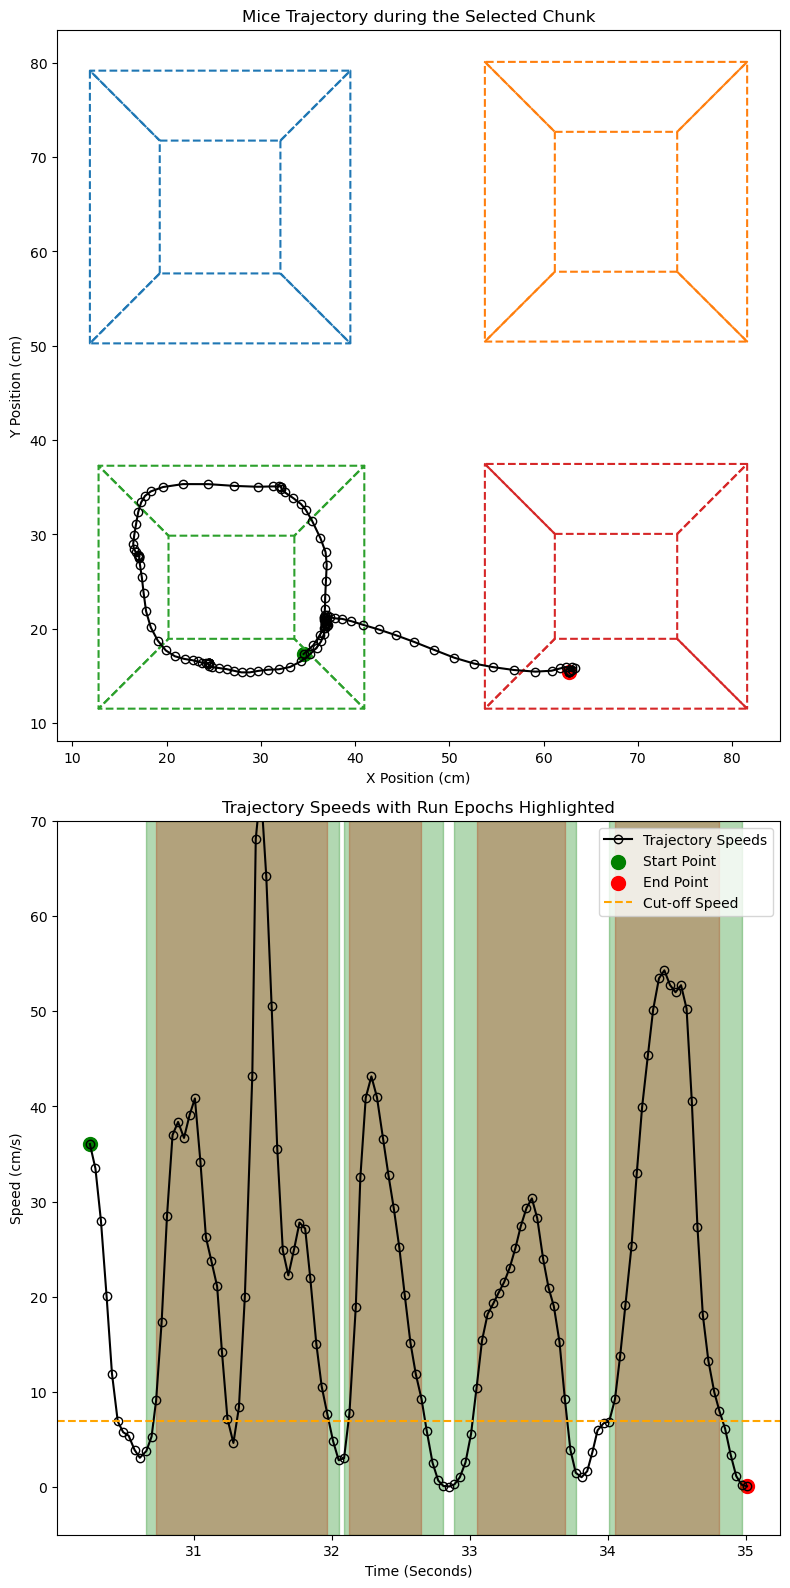

In [1161]:
plot_trajectory_speed_chunk(380, 500, traject_time,speeds, run_epochs, clean_run_epochs, smoothed_Xpositions_cm, smoothed_Ypositions_cm,all_trapezes_coordinates_cm)


In [1162]:
#assert False, "Stopping execution here." 

In [1163]:
## this function allows to plot a selected number of quarter turns  
## importantly the function identify for each quarter turn the change of trapze recorded in the turn.csv file (turndf)
## with this info we can associate each full quarter turn trajectory with a tower and a switch from one to another trapeze


# Function to compute the average angle direction based on the last few points to draw an arrow head at the nof the run epochs
def compute_average_direction(points):
    diffs = np.diff(points, axis=0)
    avg_diff = np.mean(diffs, axis=0)
    angle = np.arctan2(avg_diff[1], avg_diff[0])
    return avg_diff, angle

# Function to plot selected small trajectories on the same graph
def plot_selected_run_epochs(traject_time, smoothed_positions_cm, run_epochs, turns_df, first_epoch_to_plot, last_epoch_to_plot, points_for_direction=4):
    trapeze_switch_times=[]
    plt.figure(figsize=(10, 8))
    all_start_end_indexes=[]

    for idx in range(first_epoch_to_plot, last_epoch_to_plot):
        run_epoch = run_epochs[idx]
        start_index, end_index = run_epoch[0], run_epoch[1]
        #print(start_index,end_index)
        all_start_end_indexes.extend([start_index,end_index])
        #print(all_start_end_indexes)

        # Check if the indexes are within the bounds of traj_df
        if start_index < 0 or end_index >= len(traject_time):
            print(f"Indexes out of bounds for run_epoch: {run_epoch}")
            continue

        # Extract the run_epoch segment        
        run_epoch = [smoothed_positions_cm[0][start_index: end_index+1],smoothed_positions_cm[1][start_index: end_index+1]]
        times_run_epoch=traject_time[start_index: end_index+1]
        
        # Plot the raw trajectory of this epoch 
        plt.plot(run_epoch[0], run_epoch[1], linestyle='--', color='c')
        # Plot the smooth trajectory of this epoch 
        plt.plot(smoothed_positions_cm[0][start_index: end_index+1],smoothed_positions_cm[1][start_index: end_index+1], linestyle='-', color='b')


        # Mark the beginning of the trajectory
        plt.plot(run_epoch[0][0], run_epoch[1][0], 
                 marker='o', color='g', markersize=8, 
                 label='Start' if idx == first_epoch_to_plot else "")

        # Compute the average direction based on the last few points
        end_points = [run_epoch[0][-points_for_direction:],run_epoch[1][-points_for_direction:]]
        # Transform to the desired format
        end_points = np.column_stack((end_points[0], end_points[1]))

        # Rounding to match the format more closely
        end_points = np.round(end_points)

        
        avg_diff, angle = compute_average_direction(end_points)

        # Draw an arrow at the end of the trajectory
        plt.arrow(
            run_epoch[0][-2], run_epoch[1][-2], 
            avg_diff[0], avg_diff[1],
            shape='full', lw=0, length_includes_head=True, head_width=2, color='r',
            label='End' if idx == first_epoch_to_plot else ""
        )

        # Annotate the number of the quarter turn next to its starting point
        plt.text(run_epoch[0][0], run_epoch[1][0], f'{idx + 1}', fontsize=8, color='black', ha='right')

        # Find turn in the turns_df data frame within this quarter turn based on time
        turns_in_QT = turns_df[(turns_df['time'] >= times_run_epoch[0]) & (turns_df['time'] <= times_run_epoch[-1])]
        #print(turns_in_QT)
        trapeze_switch_times.extend(turns_in_QT['time'].values)
        # Plot the switch of trapez as a cross marker on the trajectory
        plt.scatter(turns_in_QT['xposition']*conversion_factor, (video_resolution[1]-turns_in_QT['yposition'])*conversion_factor, marker='x', color='m', label='Turn Positions')

        # Add labels to turns indicating arrivalTrapeze, departureTrapeze, and currentPatchTower
        for _, turn in turns_in_QT.iterrows():
            plt.text(turn['xposition']*conversion_factor, (video_resolution[1]-turn['yposition'])*conversion_factor, f"{turn['currentPatch']}\n{turn['previousTrapeze']}\n{turn['currentTrapeze']}",
                     fontsize=8, color='black', ha='center', va='bottom')

       # Generate a color map using matplotlib's tab10 colormap (which has 10 distinct colors) to plot the trapezes
    colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinct colors
    
    # Plot each square and trapeze with the same color for each tower
    for i, (tower, trapezes) in enumerate(all_trapezes_coordinates_cm.items()):
        tower_color = colors[i % len(colors)]  # Cycle through the colors if there are more than 10 towers
        for trapeze, coordinates in trapezes.items():
            # Make a copy of the coordinates and close the polygon by appending the first vertex
            coordinates_copy = coordinates + [coordinates[0]]
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates_copy)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color=tower_color,linestyle='--')

    # Set plot limits and labels
  
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Selected Quarter Turns: QT {first_epoch_to_plot + 1} to QT {last_epoch_to_plot}')
    plt.grid(True)
    #plt.legend()
    #plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()
    
    return all_start_end_indexes[0], all_start_end_indexes[-1],trapeze_switch_times




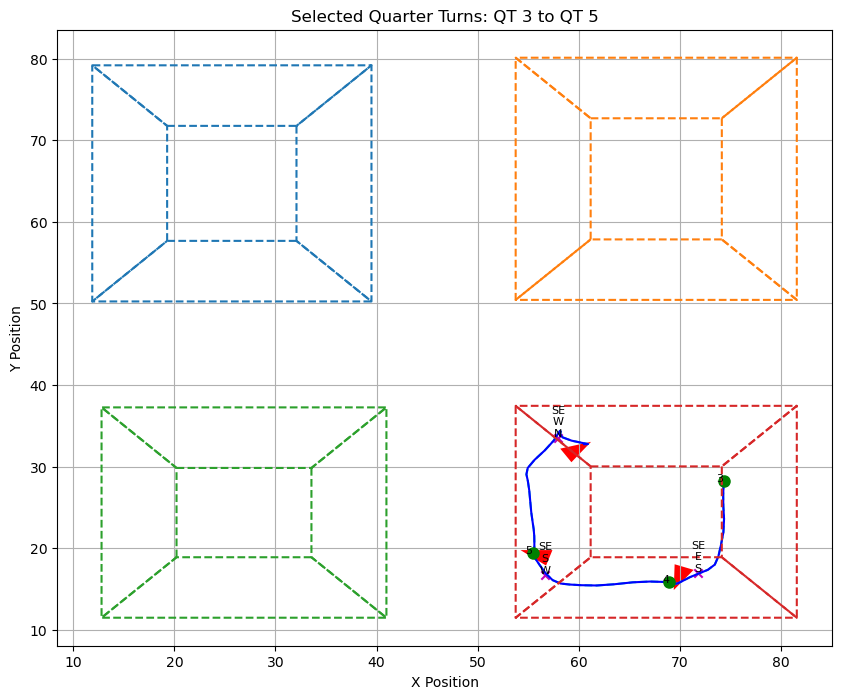

In [1164]:
# Example usage:
# plot quarter turns 1 to 3
start_index, end_index,trapeze_switch_times=plot_selected_run_epochs(traject_time, smoothed_positions_cm, clean_run_epochs, turns_df, first_epoch_to_plot=2, last_epoch_to_plot=5, points_for_direction=15)


In [1165]:
## this function allows to plot only a selected run epoch based on the index of the epoch (in the clean run epochs list)


def plot_single_run_epoch(traject_time, smoothed_positions_cm, run_epochs, turns_df, index_epoch_to_plot, points_for_direction=4):
    trapeze_switch_times=[]
    plt.figure(figsize=(10, 8))

    
    run_epoch = run_epochs[index_epoch_to_plot]
    start_index, end_index = run_epoch[0], run_epoch[1]
    #print(start_index,end_index)

   

    # Extract the run_epoch segment        
    run_epoch = [smoothed_positions_cm[0][start_index: end_index+1],smoothed_positions_cm[1][start_index: end_index+1]]
    times_run_epoch=traject_time[start_index: end_index+1]
    
    # Plot the raw trajectory of this epoch 
    plt.plot(run_epoch[0], run_epoch[1], linestyle='--', color='c')
    # Plot the smooth trajectory of this epoch 
    plt.plot(smoothed_positions_cm[0][start_index: end_index+1],smoothed_positions_cm[1][start_index: end_index+1], linestyle='-', color='b')


    # Mark the beginning of the trajectory
    plt.plot(run_epoch[0][0], run_epoch[1][0], 
                marker='o', color='g', markersize=8, 
                label='Start')

    # Compute the average direction based on the last few points
    end_points = [run_epoch[0][-points_for_direction:],run_epoch[1][-points_for_direction:]]
    # Transform to the desired format
    end_points = np.column_stack((end_points[0], end_points[1]))

    # Rounding to match the format more closely
    end_points = np.round(end_points)

    #print(end_points)
    avg_diff, angle = compute_average_direction(end_points)

    # Draw an arrow at the end of the trajectory
    plt.arrow(
        run_epoch[0][-2], run_epoch[1][-2], 
        avg_diff[0], avg_diff[1],
        shape='full', lw=0, length_includes_head=True, head_width=2, color='r',
        label='End'
    )

    

    # Find turn in the turns_df data frame within this quarter turn based on time
    turns_in_QT = turns_df[(turns_df['time'] >= times_run_epoch[0]) & (turns_df['time'] <= times_run_epoch[-1])]
    #print(turns_in_QT)
    trapeze_switch_times.extend(turns_in_QT['time'].values)
     # Plot the switch of trapez as a cross marker on the trajectory
    plt.scatter(turns_in_QT['xposition']*conversion_factor, (video_resolution[1]-turns_in_QT['yposition'])*conversion_factor, marker='x', color='m', label='Turn Positions')

    # Add labels to turns indicating arrivalTrapeze, departureTrapeze, and currentPatchTower
    for _, turn in turns_in_QT.iterrows():
        plt.text(turn['xposition']*conversion_factor, (video_resolution[1]-turn['yposition'])*conversion_factor, f"{turn['currentPatch']}\n{turn['previousTrapeze']}\n{turn['currentTrapeze']}",
                    fontsize=8, color='black', ha='center', va='bottom')


    colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinct colors
    
    # Plot each square and trapeze with the same color for each tower
    for i, (tower, trapezes) in enumerate(all_trapezes_coordinates_cm.items()):
        tower_color = colors[i % len(colors)]  # Cycle through the colors if there are more than 10 towers
        for trapeze, coordinates in trapezes.items():
            # Make a copy of the coordinates and close the polygon by appending the first vertex
            coordinates_copy = coordinates + [coordinates[0]]
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates_copy)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color=tower_color,linestyle='--')


    # Set plot limits and labels

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f' run epoch {index_epoch_to_plot+1}')
    plt.grid(True)
    #plt.legend()
    #plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()
    print(start_index, end_index)
    print(trapeze_switch_times)
    return start_index, end_index,trapeze_switch_times


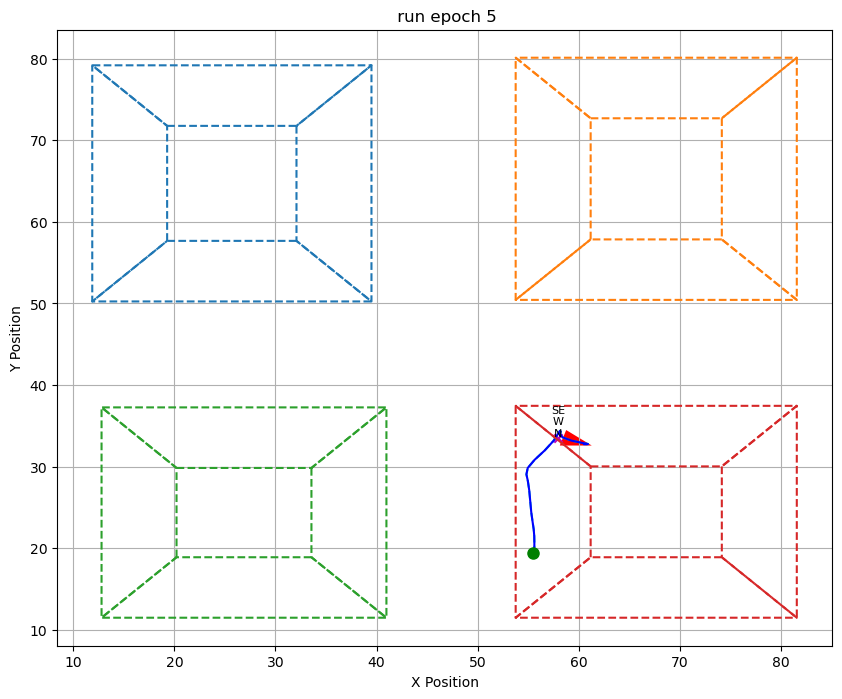

156 184
[22.001]


In [1166]:
# Example usage:
# plot quarter turns 2 (index=1)
start_index, end_index,trapeze_switch_times=plot_single_run_epoch(traject_time, smoothed_positions_cm, clean_run_epochs, turns_df, index_epoch_to_plot=4, points_for_direction=7)


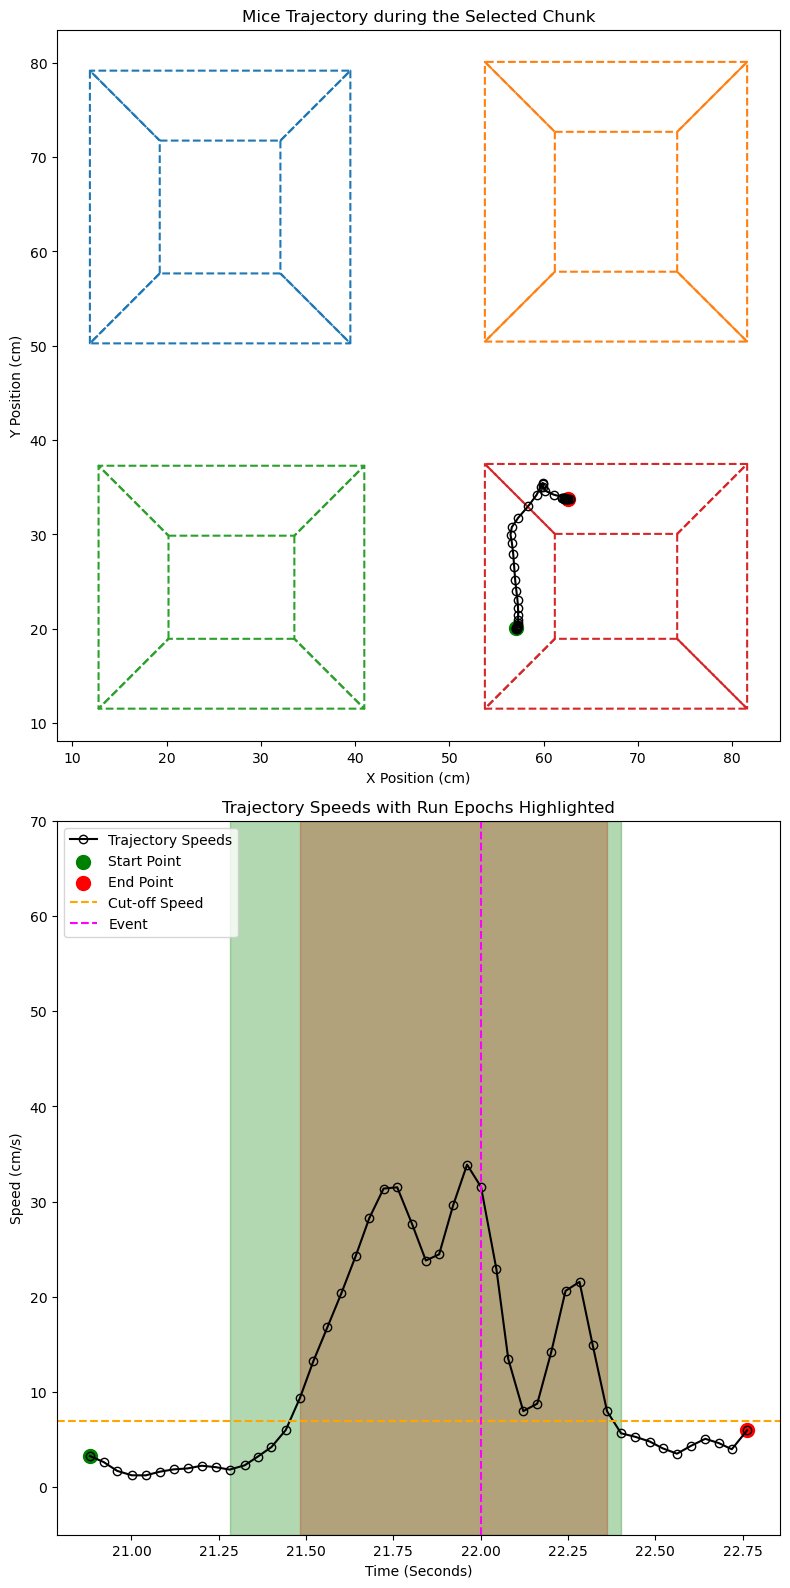

In [1167]:
plot_trajectory_speed_chunk(start_index-10, end_index+10, traject_time, speeds, run_epochs, clean_run_epochs, smoothed_Xpositions_cm, smoothed_Ypositions_cm, all_trapezes_coordinates_cm, events_list=trapeze_switch_times)

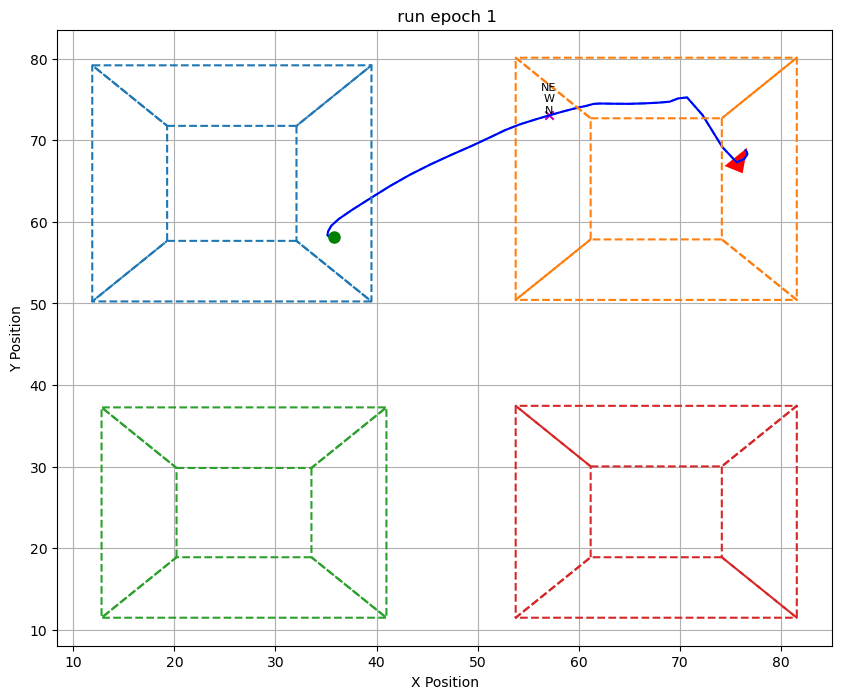

7 48
[16.042]


In [1168]:
# Example usage:
# plot run epoch 0 (index=0)
start_index, end_index,trapeze_switch_times=plot_single_run_epoch(traject_time, smoothed_positions_cm, clean_run_epochs, turns_df, index_epoch_to_plot=0, points_for_direction=7)


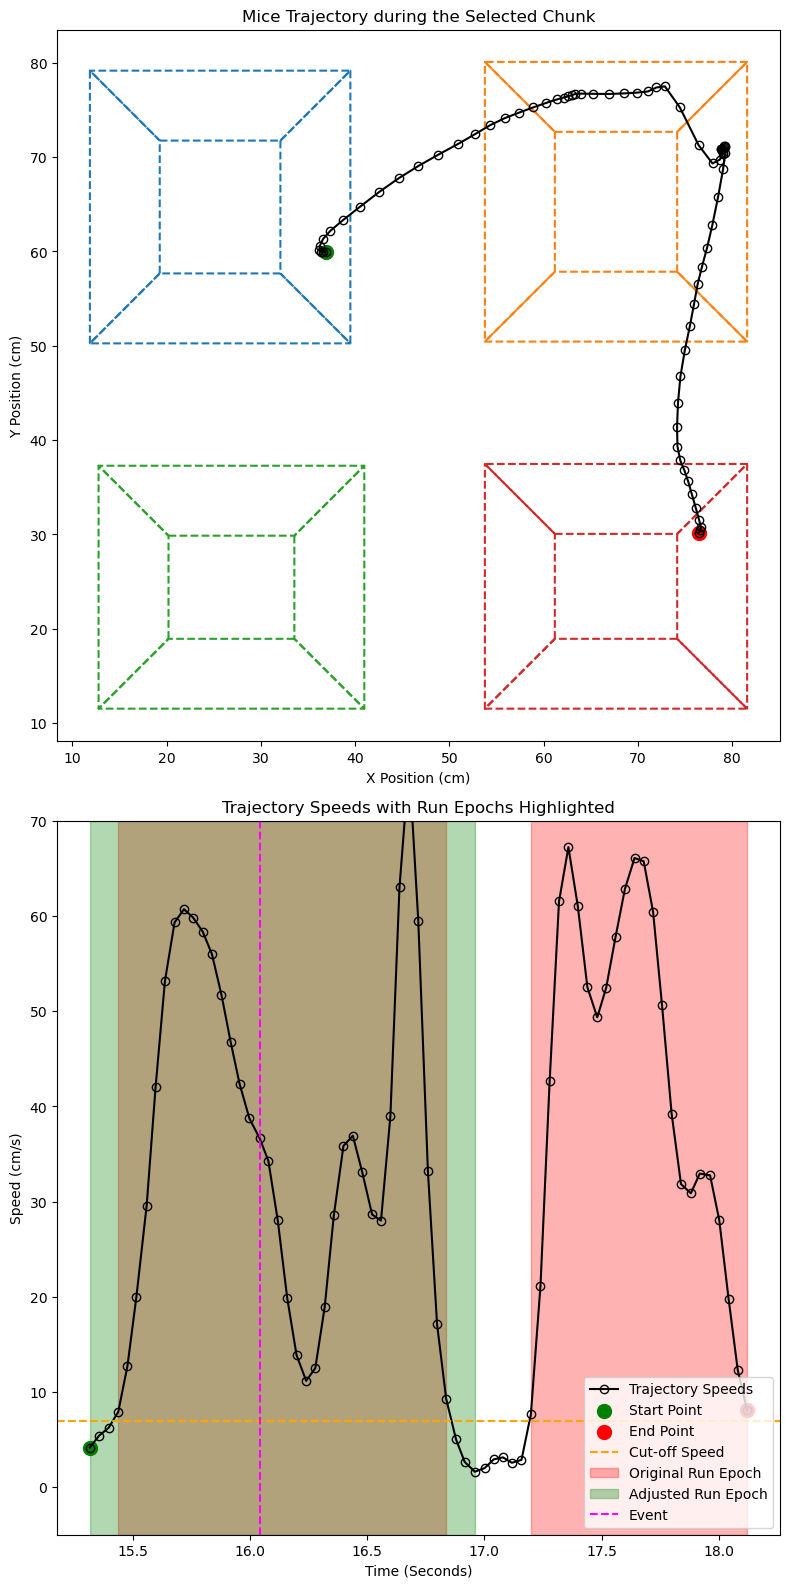

In [1169]:
plot_trajectory_speed_chunk(start_index, end_index+30, traject_time, speeds, run_epochs, clean_run_epochs,smoothed_Xpositions_cm, smoothed_Ypositions_cm, all_trapezes_coordinates_cm, cut_off_speed=7, events_list=trapeze_switch_times)

### After splitting trajectory in run epochs we are going to refdefine these epochs depending on their start and end positions relative to the trapezes surrounding towers

Is the point inside the polygon? True


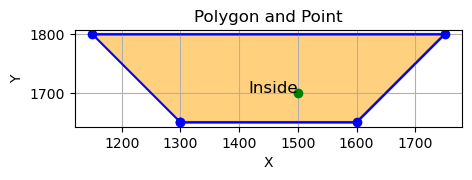

In [1170]:
# we need a function to detect if a position is in a polygon 

def is_point_in_polygon(polygon_vertices, point): # function to replace the not so efficient one points_in_polygon written originally (not by Alice :)
    """
    Determine if a point is inside or outside a polygon.

    Args:
    - polygon_vertices: Coordinates of the polygon vertices [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    - point: Coordinates of the point to check [x, y]

    Returns:
    - bool: True if the point is inside the polygon, False otherwise
    """
    path = Path(polygon_vertices)
    return path.contains_point(point)

#just for understanding the above fucntion:
def plot_polygon_and_point(polygon_vertices, point):
    """
    Plot a polygon and a point, and indicate if the point is inside or outside the polygon.

    Args:
    - polygon_vertices: Coordinates of the polygon vertices [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    - point: Coordinates of the point to plot [x, y]
    """
    fig, ax = plt.subplots()
    polygon_path = Path(polygon_vertices)
    patch = patches.PathPatch(polygon_path, facecolor='orange', lw=2, alpha=0.5)
    ax.add_patch(patch)

    # Plot the polygon vertices
    polygon_vertices.append(polygon_vertices[0])  # Close the polygon by appending the first point at the end
    xs, ys = zip(*polygon_vertices)
    ax.plot(xs, ys, 'bo-')

    # Plot the point
    is_inside = is_point_in_polygon(polygon_vertices, point)
    point_color = 'green' if is_inside else 'red'
    ax.plot(point[0], point[1], 'o', color=point_color)
    ax.text(point[0], point[1], 'Inside' if is_inside else 'Outside', fontsize=12, ha='right')

    ax.set_aspect('equal', 'box')
    ax.set_title('Polygon and Point')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Example usage:
polygon_vertices = [[1300, 1650], [1600, 1650], [1750, 1800], [1150, 1800]]
point = [1500, 1700]

is_inside = is_point_in_polygon(polygon_vertices, point)
print(f"Is the point inside the polygon? {is_inside}")

plot_polygon_and_point(polygon_vertices, point)


In [1171]:
# this check if a given position (run start or stop) is in a given trapze of a given tower
# it returns true and false and if true which tower and trapze
def check_position_in_trapezes(position, all_trapezes_coordinates):
    """
    Check if the position is inside any of the trapezes.
    :param position: Tuple (x, y) representing the position to check.
    :param all_trapezes_coordinates: Dictionary containing trapezes coordinates.
    :return: List [True, towerlabel, trapezelabel] if inside a trapeze, [False, 'none', 'none'] otherwise.
    """
    for towerlabel, trapezes in all_trapezes_coordinates.items():
        #print(towerlabel)
        for trapezelabel, trapeze_coordinates in trapezes.items():
            #print(trapezelabel)
            #print(trapeze_coordinates)
            if is_point_in_polygon(trapeze_coordinates,position):
                return [True, towerlabel, trapezelabel]
    return [False, None, None]

In [1172]:
# this cell is going to provide for each run epoch three elements in a list 
# [[startindex,endindex],[towerstart, trapezestaert],[towerstop,trapzestop]]
run_epochs_start_stop_Tower_Trapeze=[]

for epoch_index,run_epoch in enumerate(clean_run_epochs):
#     print(run_epoch)
    run_epoch_start_stop_Tower_Trapeze=[]
    start_index, end_index = run_epoch[0], run_epoch[1]
    run_epoch_start_stop_Tower_Trapeze.append(run_epoch)

    starting_position=[smoothed_positions_cm[0][start_index],smoothed_positions_cm[1][start_index]]
    ending_position=[smoothed_positions_cm[0][end_index],smoothed_positions_cm[1][end_index]]
#     print(starting_position)
    for position_to_check in [starting_position,ending_position]:
         #
         in_trapeze_info=check_position_in_trapezes(position_to_check, all_trapezes_coordinates_cm)
         run_epoch_start_stop_Tower_Trapeze.append(in_trapeze_info[1:])
     #     print(in_trapeze_info)
    run_epochs_start_stop_Tower_Trapeze.append(run_epoch_start_stop_Tower_Trapeze)

In [1173]:
run_epochs_start_stop_Tower_Trapeze

[[[7, 48], ['NW', 'E'], ['NE', 'E']],
 [[53, 79], ['NE', 'E'], [None, None]],
 [[97, 114], ['SE', 'E'], ['SE', 'S']],
 [[126, 144], ['SE', 'S'], ['SE', 'W']],
 [[156, 184], ['SE', 'W'], ['SE', 'N']],
 [[192, 213], ['SE', 'N'], [None, None]],
 [[222, 240], [None, None], ['SE', 'S']],
 [[249, 274], ['SE', 'S'], ['SE', 'W']],
 [[278, 297], ['SE', 'W'], ['SW', 'E']],
 [[311, 329], ['SW', 'E'], ['SW', 'N']],
 [[333, 365], ['SW', 'N'], ['SW', 'S']],
 [[370, 386], ['SW', 'S'], ['SW', 'E']],
 [[390, 425], ['SW', 'E'], ['SW', 'W']],
 [[426, 444], ['SW', 'W'], ['SW', 'S']],
 [[446, 468], ['SW', 'S'], ['SW', 'E']],
 [[474, 498], ['SW', 'E'], ['SE', 'S']],
 [[500, 522], ['SE', 'S'], [None, None]],
 [[523, 540], [None, None], ['SE', 'N']],
 [[544, 575], ['SE', 'N'], ['NE', 'E']],
 [[576, 594], ['NE', 'E'], ['NE', 'N']],
 [[606, 622], ['NE', 'N'], ['NE', 'W']],
 [[623, 647], ['NE', 'W'], ['NE', 'S']],
 [[649, 668], ['NE', 'S'], ['NE', 'E']],
 [[671, 688], ['NE', 'E'], ['NE', 'N']],
 [[691, 758], ['N

In [1174]:
# Determine the type of run based on start and stop position realtive to tower and trapeseand immobility
# Initialize the immobility epochs list
immobility_epochs = []

# Iterate through the run epochs to find immobility periods
for i in range(len(clean_run_epochs) - 1):
    current_epoch_end = clean_run_epochs[i][1]
    next_epoch_start = clean_run_epochs[i + 1][0]
    
    if current_epoch_end < next_epoch_start:
        immobility_epochs.append([current_epoch_end, next_epoch_start])


all_epochs={'run_around_tower':[],'run_between_towers':[],'run_toward_tower':[],'exploratory_run':[],'immobility':[]}
#run_around_tower: All run between trapezes of given tower 
#run_between_towers: All trajectories between trapeze of different tower
#run_toward_tower: All trajectories from outside trapeze towards inside trapze
#exploratory_run: runs that terminate outside trapeze
#list_of_stops = [[list_epochs[a - 1][1 ] + 1, list_epochs[a][0] - 1] for a in range(1, len(list_epochs))]

for run_epoch_start_stop_Tower_Trapeze in run_epochs_start_stop_Tower_Trapeze:
    if run_epoch_start_stop_Tower_Trapeze[2][0] is None: # if the end is not in a trapeze
        all_epochs['exploratory_run'].append(run_epoch_start_stop_Tower_Trapeze)
    elif run_epoch_start_stop_Tower_Trapeze[1][0] is None: #if the end is in a trapeze and the start is outside a trapeze
        all_epochs['run_toward_tower'].append(run_epoch_start_stop_Tower_Trapeze)
    elif run_epoch_start_stop_Tower_Trapeze[1][0]!=run_epoch_start_stop_Tower_Trapeze[2][0]: # if stat and stop in trapezes that belong to different tower
        all_epochs['run_between_towers'] .append(run_epoch_start_stop_Tower_Trapeze)
        
    else: # the animals remained around the same tower
        #print(run_epoch_start_stop_Tower_Trapeze[1][0],run_epoch_start_stop_Tower_Trapeze[2][0])
        #we need to verify that the animals switched trapeze at least once (he could start and stop in the same trapze of the same tower)
        start_stop_times_run_epoch=[traject_time[run_epoch_start_stop_Tower_Trapeze[0][0]],traject_time[run_epoch_start_stop_Tower_Trapeze[0][1]]]
        switch_in_turns_df = turns_df[(turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])]
        num_trapezeswitch=switch_in_turns_df.shape[0]
        #print(num_trapezeswitch)
        if num_trapezeswitch>0:  
            all_epochs['run_around_tower'].append(run_epoch_start_stop_Tower_Trapeze)
        # all those towe
        

all_epochs['immobility']=immobility_epochs



In [1175]:
all_epochs['run_around_tower']

[[[97, 114], ['SE', 'E'], ['SE', 'S']],
 [[126, 144], ['SE', 'S'], ['SE', 'W']],
 [[156, 184], ['SE', 'W'], ['SE', 'N']],
 [[249, 274], ['SE', 'S'], ['SE', 'W']],
 [[311, 329], ['SW', 'E'], ['SW', 'N']],
 [[333, 365], ['SW', 'N'], ['SW', 'S']],
 [[370, 386], ['SW', 'S'], ['SW', 'E']],
 [[390, 425], ['SW', 'E'], ['SW', 'W']],
 [[426, 444], ['SW', 'W'], ['SW', 'S']],
 [[446, 468], ['SW', 'S'], ['SW', 'E']],
 [[576, 594], ['NE', 'E'], ['NE', 'N']],
 [[606, 622], ['NE', 'N'], ['NE', 'W']],
 [[623, 647], ['NE', 'W'], ['NE', 'S']],
 [[649, 668], ['NE', 'S'], ['NE', 'E']],
 [[671, 688], ['NE', 'E'], ['NE', 'N']],
 [[760, 780], ['NW', 'W'], ['NW', 'S']],
 [[828, 848], ['SW', 'S'], ['SW', 'E']],
 [[942, 964], ['SE', 'S'], ['SE', 'W']],
 [[975, 992], ['SE', 'W'], ['SE', 'N']],
 [[1008, 1024], ['SE', 'N'], ['SE', 'E']],
 [[1039, 1066], ['SE', 'E'], ['SE', 'S']],
 [[1067, 1082], ['SE', 'S'], ['SE', 'W']],
 [[1126, 1147], ['SW', 'N'], ['SW', 'W']],
 [[1148, 1164], ['SW', 'W'], ['SW', 'S']],
 [[1167

In [1176]:
#this function plots all the runs of a given run type 
def plot_run_type(traject_time, smoothed_Xpositions, smoothed_Ypositions, all_epochs, runtype='', all_trapezes_coordinates={}, q=4):
    
    if not runtype:
        warnings.warn("The 'runtype' parameter is required and was not provided.")
        return
    
    runtype_epochs = all_epochs.get(runtype)
    
    if runtype_epochs is None:
        warnings.warn(f"The 'runtype' '{runtype}' is not found in 'all_epochs'.")
        return
    
    fig, ax1 = plt.subplots(figsize=(10, 8))
    totaltime = 0
    totaldistance = 0
    meanspeed = []
    maxspeed = []
    
    distances, speeds = compute_distance_speed_angular_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time)[0:2]

    colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinct colors
    
    # Plot each square and trapeze with the same color for each tower
    for i, (tower, trapezes) in enumerate(all_trapezes_coordinates_cm.items()):
        tower_color = colors[i % len(colors)]  # Cycle through the colors if there are more than 10 towers
        for trapeze, coordinates in trapezes.items():
            # Make a copy of the coordinates and close the polygon by appending the first vertex
            coordinates_copy = coordinates + [coordinates[0]]
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates_copy)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color=tower_color,linestyle='--')


    for runtype_epoch in runtype_epochs:
        start_index, end_index = runtype_epoch[0][0], runtype_epoch[0][1]
        
        # Check if the indexes are within the bounds of the arrays
        if start_index < 0 or end_index >= len(traject_time):
            print(f"Indexes out of bounds for runtype_epoch: {runtype_epoch}")
            continue

        # Extract the run epoch, compute duration, distance and speed
        runtype_epoch_Xposition = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Yposition = smoothed_Ypositions[start_index:end_index + 1]
        epochduration = traject_time[end_index] - traject_time[start_index]
        totaltime += epochduration
        distanceran = np.sum(distances[start_index:end_index])
        totaldistance += distanceran
        meanspeed.append(distanceran / epochduration)
        maxspeed.append(np.max(speeds[start_index:end_index]))

        # Plot the trajectory
        ax1.plot(runtype_epoch_Xposition, runtype_epoch_Yposition, linestyle='-', label=f"Traj {start_index}-{end_index}")
        
        # Plot the start and end points
        ax1.plot(runtype_epoch_Xposition[0], runtype_epoch_Yposition[0], 'go', markersize=3)  # Start point

        # Compute the direction of the arrow using the last q points
        if len(runtype_epoch_Xposition) >= q:
            dx = runtype_epoch_Xposition[-1] - runtype_epoch_Xposition[-q]
            dy = runtype_epoch_Yposition[-1] - runtype_epoch_Yposition[-q]
            
            # Normalize the direction
            norm = np.hypot(dx, dy)
            if norm != 0:
                dx /= norm
                dy /= norm
            
            # Plot the arrow
            ax1.arrow(runtype_epoch_Xposition[-1], runtype_epoch_Yposition[-1], dx, dy,
                      head_width=1, head_length=1, fc='red', ec='red')
    
    #print(np.median(maxspeed))

    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_title(f"{runtype} (Tot. Duration: {totaltime:.2f}s; Tot. Distance: {totaldistance:.2f}cm; Mean speed: {np.median(meanspeed):.2f}cm/s; Max speed: {np.median(maxspeed):.2f}cm/s)")
    ax1.grid(True)
    plt.show()


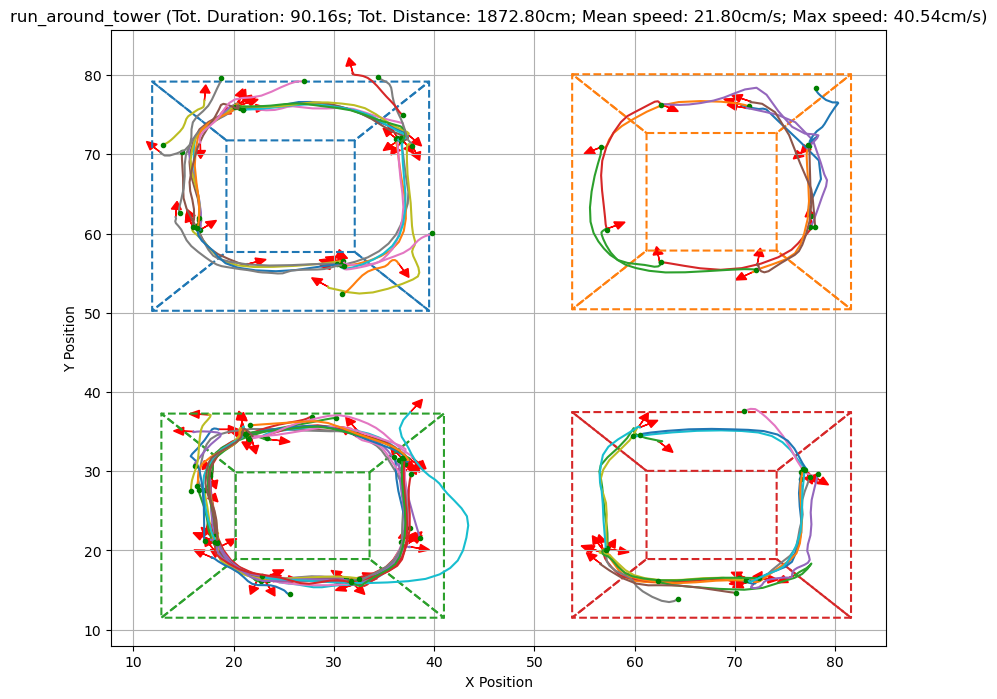

In [1177]:
plot_run_type(traject_time, smoothed_Xpositions_cm, smoothed_Ypositions_cm, all_epochs, runtype='run_around_tower', all_trapezes_coordinates=all_trapezes_coordinates_cm, q=4)

## Further analysis on turns around tower
Find turns around tower and check if they were rewarded and  clockwise or counterclowise by using the turninfo dataframe 

In [1178]:
# Create a deep copy of the list
runs_around_tower = copy.deepcopy(all_epochs['run_around_tower'])

for run_index, run_around_tower in enumerate(runs_around_tower):
    start_stop_times_run_epoch = [traject_time[run_around_tower[0][0]], traject_time[run_around_tower[0][1]]]
    
    # Find the lines in the turns_df (the DataFrame that contains all the switches of trapeze)
    condition = (turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])
    if not condition.any():
        continue
    
    switch_in_turns_df = turns_df[(turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])]
    num_trapezeswitch = switch_in_turns_df.shape[0]
    
    type_of_turn = {'Rewarded': '', 'direction': '', 'num_trapezeswitch': num_trapezeswitch}
    
    # Normalize 'Rewarded' to boolean
    rewarded_value = switch_in_turns_df.iloc[0]['Rewarded']#.strip()  # Remove any extra whitespace
    if rewarded_value in {'1', 'True',True}:
        type_of_turn['Rewarded'] = True
    elif rewarded_value in {'0', 'False',False}:
        type_of_turn['Rewarded'] = False
    else:
        raise ValueError(f"Unexpected value for Rewarded: {rewarded_value}")
    
    # Determine direction
    if switch_in_turns_df.iloc[0]['turnDirection'] == 270:
        type_of_turn['direction'] = 'CW'
    else:
        type_of_turn['direction'] = 'CCW'

    runs_around_tower[run_index].append(type_of_turn)

print(runs_around_tower)


[[[97, 114], ['SE', 'E'], ['SE', 'S'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}], [[126, 144], ['SE', 'S'], ['SE', 'W'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}], [[156, 184], ['SE', 'W'], ['SE', 'N'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}], [[249, 274], ['SE', 'S'], ['SE', 'W'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}], [[311, 329], ['SW', 'E'], ['SW', 'N'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 1}], [[333, 365], ['SW', 'N'], ['SW', 'S'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 2}], [[370, 386], ['SW', 'S'], ['SW', 'E'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 1}], [[390, 425], ['SW', 'E'], ['SW', 'W'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 2}], [[426, 444], ['SW', 'W'], ['SW', 'S'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 1}], [[446, 468], ['SW', 'S'], ['SW', 'E'], {'Rewarded': False, 'dir

In [1179]:
#Here’s a Python function that takes as input a starting_point, an ending_point, and the list runs_around_tower. 
# It will return the number of runs detected with these start and end points and whether they were rewarded or not.
def count_turns_with_reward(starting_point, ending_point, runs_around_tower):
    count_detected = 0
    count_rewarded = 0

    rewarded_runs = []

    for run in runs_around_tower:
        if run[1] == starting_point and run[2] == ending_point:
            count_detected += 1
            rewarded = run[3].get('Rewarded', False)
            rewarded_runs.append({'start': starting_point, 'end': ending_point, 'rewarded': rewarded})
            if rewarded:
                count_rewarded += 1


    return count_detected, rewarded_runs,count_rewarded

In [1180]:
starting_point = ['SW', 'W']
ending_point = ['SW', 'S']

count_detected,rewarded_runs,count_rewarded = count_turns_with_reward(starting_point, ending_point, runs_around_tower)
print(f"Count of detected runs: {count_detected}")
print(f"Count of rewarded runs: {count_rewarded}")
print("Rewarded runs:", rewarded_runs)

Count of detected runs: 4
Count of rewarded runs: 0
Rewarded runs: [{'start': ['SW', 'W'], 'end': ['SW', 'S'], 'rewarded': False}, {'start': ['SW', 'W'], 'end': ['SW', 'S'], 'rewarded': False}, {'start': ['SW', 'W'], 'end': ['SW', 'S'], 'rewarded': False}, {'start': ['SW', 'W'], 'end': ['SW', 'S'], 'rewarded': False}]


In [1181]:
# Create a deep copy of the list
runs_around_tower = copy.deepcopy(all_epochs['run_around_tower'])

for run_index, run_around_tower in enumerate(runs_around_tower):
    run_start_index = run_around_tower[0][0]
    run_end_index = run_around_tower[0][1]
    start_stop_times_run_epoch = [traject_time[run_start_index], traject_time[run_end_index]]
    
    # Find the lines in the turns_df (the DataFrame that contains all the switches of trapeze)
    condition = (turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])
    if not condition.any():
        continue
    
    switch_in_turns_df = turns_df[(turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])]
    num_trapezeswitch = switch_in_turns_df.shape[0]
    
    type_of_turn = {'Rewarded': '', 'direction': '', 'num_trapezeswitch': num_trapezeswitch}
    
    # Normalize 'Rewarded' to boolean
    rewarded_value = switch_in_turns_df.iloc[0]['Rewarded']#.strip()  # Remove any extra whitespace
    if rewarded_value in {'1', 'True',True}:
        type_of_turn['Rewarded'] = True
    elif rewarded_value in {'0', 'False',False}:
        type_of_turn['Rewarded'] = False
    else:
        raise ValueError(f"Unexpected value for Rewarded: {rewarded_value}")
    
    # Determine direction
    if switch_in_turns_df.iloc[0]['turnDirection'] == 270:
        type_of_turn['direction'] = 'CW'
    else:
        type_of_turn['direction'] = 'CCW'

    runs_around_tower[run_index].append(type_of_turn)
    
    
    # Extract the run epoch, compute duration, distance and speed
    kinematics_of_turn={'run_time': '','run_duration': '', 'run_distance': '', 'run_meanspeed': '', 'run_maxspeed': ''}
    
    kinematics_of_turn['run_time']=traject_time[run_start_index]
    kinematics_of_turn['run_duration'] = start_stop_times_run_epoch[1]-start_stop_times_run_epoch[0]
    kinematics_of_turn['run_distance'] = np.sum(distances[run_start_index:run_end_index])
    kinematics_of_turn['run_meanspeed'] = kinematics_of_turn['run_distance'] / kinematics_of_turn['run_duration']  # Compute the mean speed
    kinematics_of_turn['run_maxspeed']=np.max(speeds[run_start_index:run_end_index]) # Compute the max speed on the run)
    
    runs_around_tower[run_index].append(kinematics_of_turn)
    

print(runs_around_tower)


[[[97, 114], ['SE', 'E'], ['SE', 'S'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'run_time': 18.922, 'run_duration': 0.6780000000000008, 'run_distance': 14.782824156795336, 'run_meanspeed': 21.803575452500468, 'run_maxspeed': 39.12197777494724}], [[126, 144], ['SE', 'S'], ['SE', 'W'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'run_time': 20.08, 'run_duration': 0.7210000000000001, 'run_distance': 15.861852607494727, 'run_meanspeed': 21.99979557211474, 'run_maxspeed': 42.68745117337255}], [[156, 184], ['SE', 'W'], ['SE', 'N'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'run_time': 21.281, 'run_duration': 1.1210000000000022, 'run_distance': 19.818727729730053, 'run_meanspeed': 17.67950734141839, 'run_maxspeed': 33.88115108945}], [[249, 274], ['SE', 'S'], ['SE', 'W'], {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1}, {'run_time': 25.0, 'run_duration': 1.0040000000000013, 'run_distance': 16.548074809697283, 'run_m

In [1182]:
# this will be deleted because it does not deal correctly with wether quarter of turns are rewarded or not
#  # Create a deep copy of the list
# runs_around_tower = copy.deepcopy(all_epochs['run_around_tower'])

# for run_index,run_around_tower in enumerate(runs_around_tower):
#     #print(run_around_tower[0])
#     start_stop_times_run_epoch=[traject_time[run_around_tower[0][0]],traject_time[run_around_tower[0][1]]]
#     turns_df
#     #find the line the turns_df (the dataframe that contains all the switches of trapeze)
#     #first lets checks that there is a crossing (case of animal not changing of trapze)
#     condition = (turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])
#     if not condition.any():
#         continue
    
#     switch_in_turns_df = turns_df[(turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])]
#     num_trapezeswitch=switch_in_turns_df.shape[0]
#     #print(f"The number of rows is {num_trapezeswitch}")
#     #print(switch_in_turns_df)
#     type_of_turn={'Rewarded':'','direction':'','num_trapezeswitch':num_trapezeswitch}
#     type_of_turn['num_trapezeswitch']=num_trapezeswitch
#     print(switch_in_turns_df.iloc[0]['Rewarded'])
#     type_of_turn['Rewarded']=switch_in_turns_df.iloc[0]['Rewarded']
#     if switch_in_turns_df.iloc[0]['turnDirection']==270:
#         type_of_turn['direction']='CW'
#     else:
#         type_of_turn['direction']='CCW'
#     runs_around_tower[run_index].append(type_of_turn)
# print(runs_around_tower)
    


Compute the total and rewarded number of clockwise, coutnerclockwise turns per object 

In [1183]:
# Initialize the dictionary to hold the results for each tower
run_around_tower_sessionresult = {
    'NE': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0},
    'NW': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0},
    'SE': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0},
    'SW': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0}
}

# Process each run in the data
for run in runs_around_tower:
    _, start_info, end_info, type_of_turn, kinematics_of_turn = run
    tower = start_info[0]
    direction = type_of_turn['direction']
    rewarded = type_of_turn['Rewarded']
    #print(details)
    #print(rewarded)
    
    # Update counts based on direction
    if direction == 'CW':
        run_around_tower_sessionresult[tower]['total_CW'] += 1
        #if rewarded == 1 or rewarded == True:
        if rewarded : # DEBUG
            run_around_tower_sessionresult[tower]['rewarded_CW'] += 1
    elif direction == 'CCW':
        run_around_tower_sessionresult[tower]['total_CCW'] += 1
        #if rewarded == 1 or rewarded == True:
        if rewarded : # DEBUG
            run_around_tower_sessionresult[tower]['rewarded_CCW'] += 1

# Output the result
print(run_around_tower_sessionresult)


{'NE': {'total_CW': 6, 'total_CCW': 6, 'rewarded_CW': 5, 'rewarded_CCW': 0}, 'NW': {'total_CW': 25, 'total_CCW': 5, 'rewarded_CW': 25, 'rewarded_CCW': 0}, 'SE': {'total_CW': 19, 'total_CCW': 1, 'rewarded_CW': 19, 'rewarded_CCW': 0}, 'SW': {'total_CW': 31, 'total_CCW': 16, 'rewarded_CW': 28, 'rewarded_CCW': 0}}


In [1184]:
# Function to draw the edges (contour) of towers (or trapeze) based on their vertices (corners) coordinates
def plot_maze_towers_with_results(vertices, color, results,linewidth=0.1):
    """
    Plots the edges of a tower or trapeze based on given vertices, 
    and adds behavior data as text inside the plotted shape.
    
    Parameters:
        vertices (list of tuples): List of (x, y) coordinates for the corners of the tower/trapeze.
        color (str): Color code for the plot (e.g., 'r' for red).
        results (dict): Dictionary containing behavioral data with keys 'rewarded_CW', 'total_CW', 
                        'rewarded_CCW', and 'total_CCW'.
        
    """
    # Close the polygon by appending the first vertex to the end
    closed_vertices = vertices + [vertices[0]]
    closed_vertices = list(zip(*closed_vertices))  # Transpose vertices for plotting (x, y)

    # Plot the tower/trapeze if the flag is True
    
    plt.plot(closed_vertices[0], closed_vertices[1], color,linewidth=linewidth)
    
    # Calculate the center of the polygon for labeling
    center_x = sum(v[0] for v in vertices) / len(vertices)
    center_y = sum(v[1] for v in vertices) / len(vertices)

    # Add behavior data as text inside the polygon
    behavior_text = (f"Rewarded/Total\n"
                     f"CW: {results['rewarded_CW']}/{results['total_CW']}\n"
                     f"CCW: {results['rewarded_CCW']}/{results['total_CCW']}")
    
    plt.text(center_x, center_y, behavior_text, fontsize=10, ha='center', va='center', color='black')


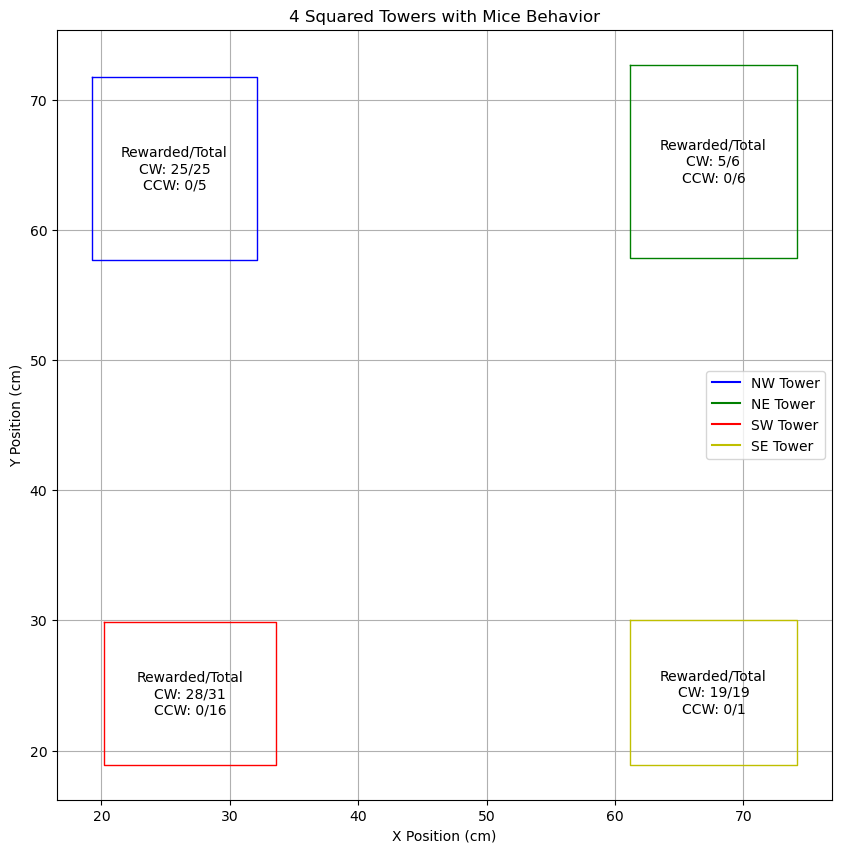

In [1185]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in towers_coordinates_cm.items():
    results = run_around_tower_sessionresult[tower_name]
    plot_maze_towers_with_results(vertices, colors[tower_name], results,linewidth=1)

# Set plot limits and labels
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title('4 Squared Towers with Mice Behavior')
plt.grid(True)

# Manually create a legend based on the tower names
for tower_name, color in colors.items():
    plt.plot([], [], color, label=f'{tower_name} Tower')

plt.legend()

# Display plot
plt.show()


In [1186]:
# Define custom colormap from green to red to plot the turns around the tower
from matplotlib.colors import LinearSegmentedColormap

def custom_cmap(num_points):
    colors = [(0, 1, 0), (1, 0.5, 0), (1, 0, 0)] # Green to orange to red
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    return [cmap(i / (num_points - 1)) for i in range(num_points)]

In [1187]:
#this function plots all the runs of a given run type 
# if the runtype is runs_around_tower it also compute and print some basic 
# TODO resutls it has redundancy with above function
def plot_run_type(traject_time, smoothed_Xpositions, smoothed_Ypositions, all_epochs, towers_coordinates_cm, runtype='', all_trapezes_coordinates={}, q=4):
    
    if not runtype:
        warnings.warn("The 'runtype' parameter is required and was not provided.")
        return
    
    runtype_epochs = all_epochs.get(runtype)
    
    if runtype_epochs is None:
        warnings.warn(f"The 'runtype' '{runtype}' is not found in 'all_epochs'.")
        return
    
    fig, ax1 = plt.subplots(figsize=(10, 8))
    totaltime = 0
    totaldistance = 0
    meanspeed = []
    maxspeed = []
    
    distances, speeds = compute_distance_speed_angular_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time)[0:2]

    
    
    # Plot each square and trapeze with the same color for each tower
    for tower, trapezes in all_trapezes_coordinates_cm.items():
        
        for trapeze, coordinates in trapezes.items():
            # Make a copy of the coordinates and close the polygon by appending the first vertex
            coordinates_copy = coordinates + [coordinates[0]]
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates_copy)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color='gray',linestyle='--')


    for runtype_epoch in runtype_epochs:
        start_index, end_index = runtype_epoch[0][0], runtype_epoch[0][1]
        
        # Check if the indexes are within the bounds of the arrays
        if start_index < 0 or end_index >= len(traject_time):
            print(f"Indexes out of bounds for runtype_epoch: {runtype_epoch}")
            continue

        # Extract the run epoch, compute duration, distance and speed
        runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]
        epochduration = traject_time[end_index] - traject_time[start_index]
        totaltime += epochduration
        distanceran = np.sum(distances[start_index:end_index])
        totaldistance += distanceran
        meanspeed.append(distanceran / epochduration)
        maxspeed.append(np.max(speeds[start_index:end_index]))

        numberofpositions=len(runtype_epoch_Xpositions)
        colorgradientforthisrun = custom_cmap(numberofpositions)

        # Ensure both lists have the same length
        if len(runtype_epoch_Xpositions) != len(runtype_epoch_Ypositions):
            raise ValueError("The lengths of X and Y positions lists must be the same.")

        # Loop through the lists and obtain each pair of values with indices
        for index  in range(numberofpositions-2):
            ax1.plot(runtype_epoch_Xpositions[index:index+2],runtype_epoch_Ypositions[index:index+2],color=colorgradientforthisrun[index])
           
        
        
        
        # Plot the trajectory
        #ax1.plot(runtype_epoch_Xpositions, runtype_epoch_Ypositions, linestyle='-', label=f"Traj {start_index}-{end_index}")
        
        # Plot the start and end points
        ax1.plot(runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0], 'go', markersize=3)  # Start point

        # Compute the direction of the arrow using the last q points
        if len(runtype_epoch_Xpositions) >= q:
            dx = runtype_epoch_Xpositions[-1] - runtype_epoch_Xpositions[-q]
            dy = runtype_epoch_Ypositions[-1] - runtype_epoch_Ypositions[-q]
            
            # Normalize the direction
            norm = np.hypot(dx, dy)
            if norm != 0:
                dx /= norm
                dy /= norm
            
            # Plot the arrow
            ax1.arrow(runtype_epoch_Xpositions[-1], runtype_epoch_Ypositions[-1], dx, dy,
                      head_width=1, head_length=1, fc='red', ec='red')
            
    if runtype=='run_around_tower':
        runs_around_tower = copy.deepcopy(all_epochs['run_around_tower'])

        for run_index,run_around_tower in enumerate(runs_around_tower):
            #print(run_around_tower[0])
            start_stop_times_run_epoch=[traject_time[run_around_tower[0][0]],traject_time[run_around_tower[0][1]]]
            turns_df
            #find the line the turns_df (the dataframe that contains all the switches of trapeze)
            #first lets checks that there is a crossing (case of animal not changing of trapze)
            condition = (turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])
            if not condition.any():
                continue
            
            switch_in_turns_df = turns_df[(turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])]
            num_trapezeswitch=switch_in_turns_df.shape[0]
            #print(f"The number of rows is {num_trapezeswitch}")
            #print(switch_in_turns_df)
            type_of_turn={'Rewarded':'','direction':'','num_trapezeswitch':num_trapezeswitch}
            type_of_turn['num_trapezeswitch']=num_trapezeswitch


            # Normalize 'Rewarded' to boolean
            rewarded_value = switch_in_turns_df.iloc[0]['Rewarded']#.strip()  # Remove any extra whitespace
            if rewarded_value in {'1', 'True',True}:
                type_of_turn['Rewarded'] = True
            elif rewarded_value in {'0', 'False',False}:
                type_of_turn['Rewarded'] = False
            else:
                raise ValueError(f"Unexpected value for Rewarded: {rewarded_value}")

            #type_of_turn['Rewarded']=switch_in_turns_df.iloc[0]['Rewarded']

            if switch_in_turns_df.iloc[0]['turnDirection']==270:
                type_of_turn['direction']='CW'
            else:
                type_of_turn['direction']='CCW'
            
            runs_around_tower[run_index].append(type_of_turn)

        run_around_tower_sessionresult = {
        'NE': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0},
        'NW': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0},
        'SE': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0},
        'SW': {'total_CW': 0, 'total_CCW': 0, 'rewarded_CW': 0, 'rewarded_CCW': 0}
        }

        # Process each run in the data
        for run in runs_around_tower:
            _, start_info, end_info, details, = run
            tower = start_info[0]
            direction = details['direction']
            rewarded = details['Rewarded']
            
            # Update counts based on direction   ###attention try to see if it work if strings are removed around the 1. 
            if direction == 'CW':
                run_around_tower_sessionresult[tower]['total_CW'] += 1
                if rewarded:
                    run_around_tower_sessionresult[tower]['rewarded_CW'] += 1
            elif direction == 'CCW':
                run_around_tower_sessionresult[tower]['total_CCW'] += 1
                if rewarded:
                    run_around_tower_sessionresult[tower]['rewarded_CCW'] += 1


        #Colors for the towers
        colors = {'NW': 'w-', 'NE': 'w-', 'SW': 'w-', 'SE': 'y-'}
        # Plot each tower
        for tower_name, vertices in towers_coordinates_cm.items():
            results = run_around_tower_sessionresult[tower_name]
            plot_maze_towers_with_results(vertices, colors[tower_name], results)
 

    


    print(np.median(maxspeed))

    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_title(f"{runtype} (Tot. Duration: {totaltime:.2f}s; Tot. Distance: {totaldistance:.2f}cm; Mean speed: {np.median(meanspeed):.2f}cm/s; Max speed: {np.median(maxspeed):.2f}cm/s)")
    ax1.set_aspect('equal')
    plt.show()


40.53865761628873


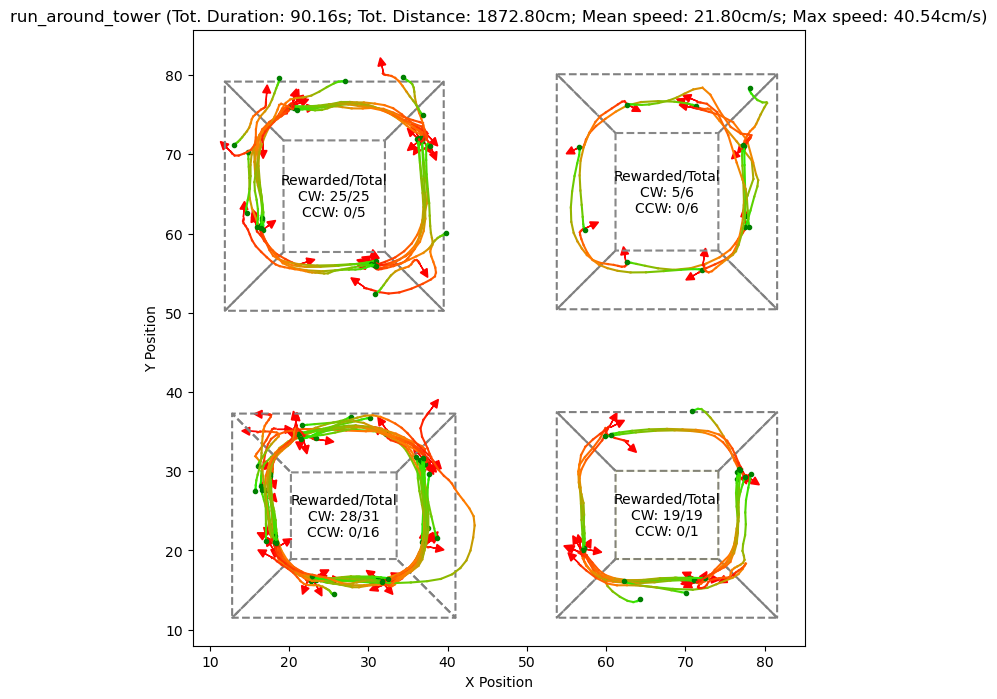

In [1188]:
plot_run_type(traject_time, smoothed_Xpositions_cm, smoothed_Ypositions_cm, all_epochs, towers_coordinates_cm, runtype='run_around_tower', all_trapezes_coordinates=all_trapezes_coordinates_cm, q=4)

In [1189]:
#this function plots all the runs of a given run type 
# if the runtype is runs_around_tower it also compute and print some basic resutls
def plot_CW_CCW_run_around_towers(smoothed_Xpositions, smoothed_Ypositions, runs_around_tower, all_trapezes_coordinates_cm, q=4):
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

     # Plot all trapezes
    for ax in axs:
            # Plot each square and trapeze with the same color for each tower
        for tower, trapezes in all_trapezes_coordinates_cm.items():
            
            for trapeze, coordinates in trapezes.items():
                # Make a copy of the coordinates and close the polygon by appending the first vertex
                coordinates_copy = coordinates + [coordinates[0]]
                # Extract x and y coordinates for plotting
                x_coords, y_coords = zip(*coordinates_copy)
                ax.plot(x_coords, y_coords, label=f'{tower}_{trapeze}', color='gray',linestyle='--')

    for run_around_tower in runs_around_tower:
        if run_around_tower[3]['num_trapezeswitch']>1:
            continue

        start_index, end_index = run_around_tower[0][0], run_around_tower[0][1]
        
        # Extract the run epoch, compute duration, distance and speed
        runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]

        numberofpositions=len(runtype_epoch_Xpositions)
        colorgradientforthisrun = custom_cmap(numberofpositions)

        # Ensure both lists have the same length
        if len(runtype_epoch_Xpositions) != len(runtype_epoch_Ypositions):
            raise ValueError("The lengths of X and Y positions lists must be the same.")

        #choose the axis index depending if the turn is CW or CCW
        if run_around_tower[3]['direction']=='CW':
            subplotindex=0
        else:
            subplotindex=1
        
        # Loop through the lists and obtain each pair of values with indices
        for index  in range(numberofpositions-2):

            #plot the run
            axs[subplotindex].plot(runtype_epoch_Xpositions[index:index+2],runtype_epoch_Ypositions[index:index+2],color=colorgradientforthisrun[index])
           
        # Plot the start and end points
        axs[subplotindex].plot(runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0], 'go', markersize=3)  # Start point

        # Compute the direction of the arrow using the last q points
        if len(runtype_epoch_Xpositions) >= q:
            dx = runtype_epoch_Xpositions[-1] - runtype_epoch_Xpositions[-q]
            dy = runtype_epoch_Ypositions[-1] - runtype_epoch_Ypositions[-q]
            
            # Normalize the direction
            norm = np.hypot(dx, dy)
            if norm != 0:
                dx /= norm
                dy /= norm
            
            # Plot the arrow
            axs[subplotindex].arrow(runtype_epoch_Xpositions[-1], runtype_epoch_Ypositions[-1], dx, dy,
                      head_width=1, head_length=1, fc='red', ec='red')
            axs[subplotindex].set_aspect('equal')
            
    plt.show()


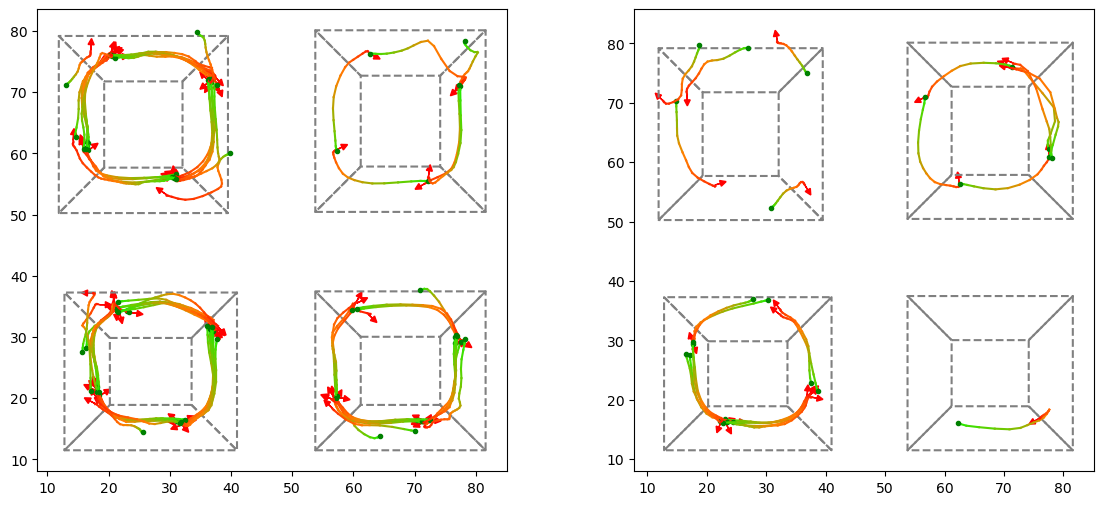

In [1190]:
plot_CW_CCW_run_around_towers(smoothed_Xpositions_cm, smoothed_Ypositions_cm, runs_around_tower, all_trapezes_coordinates_cm, q=4)

In [1191]:
def get_timeAND_speed_OfRunsAroundTowers(traject_time, smoothed_Xpositions, smoothed_Ypositions, runs_around_tower, q=4):
    speeds = compute_distance_speed_angular_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time)[1]
    CW_turns = 0
    CCW_turns = 0
    timeANDmedian_speed_of_runs = []
    keys = ['rewarded', 'unrewarded', 'CW', 'CCW']
    time_of_runsaroundtower_bytype = {key: [] for key in keys}

    for run_around_tower in runs_around_tower:
        if run_around_tower[3]['num_trapezeswitch'] > 1:
            continue

        start_index, end_index = run_around_tower[0][0], run_around_tower[0][1]
        
        if run_around_tower[3]['direction'] == 'CW':
            CW_turns += 1
            time_of_runsaroundtower_bytype['CW'].append(traject_time[start_index])
            if run_around_tower[3]['Rewarded']: 
                time_of_runsaroundtower_bytype['rewarded'].append(traject_time[start_index])
            else:
                time_of_runsaroundtower_bytype['unrewarded'].append(traject_time[start_index])
        else:
            CCW_turns += 1
            time_of_runsaroundtower_bytype['CCW'].append(traject_time[start_index])
            if run_around_tower[3]['Rewarded']: 
                time_of_runsaroundtower_bytype['rewarded'].append(traject_time[start_index])
            else:
                time_of_runsaroundtower_bytype['unrewarded'].append(traject_time[start_index])

        timeANDmedian_speed_of_runs.append([traject_time[start_index], np.median(speeds[start_index:end_index + 1])])

    return timeANDmedian_speed_of_runs, time_of_runsaroundtower_bytype, speeds, CW_turns, CCW_turns



In [1192]:
# Process data
timeANDmedian_speed_of_runs, time_of_runsaroundtower_bytype, speeds, CW_turns, CCW_turns = get_timeAND_speed_OfRunsAroundTowers(
    traject_time, smoothed_Xpositions_cm, smoothed_Ypositions_cm, runs_around_tower
)


In [1193]:
timeANDmedian_speed_of_runs

[[18.922, 23.48456753695949],
 [20.08, 25.17651402487172],
 [21.281, 17.29563733955875],
 [25.0, 13.259397874540568],
 [27.486, 23.545973576813978],
 [29.846, 28.842918031215248],
 [32.088, 19.52983325327895],
 [32.888, 19.587017862128555],
 [38.09, 13.487786227707232],
 [39.291, 23.787916509668122],
 [39.971, 18.80637140766413],
 [41.013, 18.37541447994797],
 [41.892, 27.228627986592322],
 [45.453, 23.782587189851235],
 [48.175, 23.923524211714543],
 [52.738, 12.943357592098389],
 [54.058, 26.640759087635992],
 [55.378, 31.369881664123653],
 [56.62, 10.901918223092277],
 [57.74, 26.786784263293786],
 [60.102, 15.967496419031571],
 [60.983, 22.831838350128045],
 [61.742, 22.676655834936543],
 [64.181, 24.097458787883994],
 [66.625, 16.746886086643073],
 [67.985, 32.13286323530926],
 [69.106, 28.021577984951975],
 [70.267, 30.139152042759065],
 [72.669, 19.134578700039356],
 [73.789, 29.204343991283277],
 [75.87, 17.53645558009226],
 [76.79, 22.23446094017998],
 [79.15, 20.6246954537101

In [1194]:
time_of_runsaroundtower_bytype

{'rewarded': [18.922,
  20.08,
  21.281,
  25.0,
  52.738,
  54.058,
  55.378,
  56.62,
  57.74,
  64.181,
  66.625,
  67.985,
  69.106,
  70.267,
  72.669,
  73.789,
  79.15,
  81.592,
  82.714,
  84.075,
  85.355,
  87.837,
  91.959,
  93.52,
  94.48,
  95.561,
  96.56,
  99.761,
  101.045,
  102.164,
  103.203,
  104.286,
  105.686,
  106.725,
  124.135,
  126.058,
  127.377,
  128.698,
  129.738,
  130.98,
  132.301,
  133.46,
  134.542,
  144.707,
  147.068,
  148.189,
  149.229,
  150.43,
  152.991,
  160.193,
  161.436,
  162.557,
  163.637,
  164.758,
  165.959,
  234.714,
  235.716,
  236.997,
  238.399,
  239.837,
  241.078,
  250.362,
  251.245,
  290.184,
  291.664,
  292.866,
  294.264,
  301.312,
  353.737,
  364.105,
  384.396,
  565.892,
  573.056,
  644.094,
  644.972,
  680.235],
 'unrewarded': [27.486,
  29.846,
  32.088,
  32.888,
  38.09,
  39.291,
  39.971,
  41.013,
  41.892,
  45.453,
  48.175,
  60.102,
  60.983,
  61.742,
  75.87,
  76.79,
  97.882,
  109.13,


In [1195]:
reward_spouts

{'NW': {'N': [24.93, 69.66],
  'E': [31.14, 62.81999999999999],
  'S': [24.93, 55.98],
  'W': [18.72, 62.81999999999999]},
 'NE': {'N': [65.7, 70.56],
  'E': [72.0, 63.36],
  'S': [65.7, 56.16],
  'W': [59.4, 63.36]},
 'SW': {'N': [26.1, 28.98],
  'E': [32.58, 23.67],
  'S': [26.1, 18.36],
  'W': [19.62, 23.67]},
 'SE': {'N': [65.7, 29.16],
  'E': [72.0, 23.759999999999998],
  'S': [65.7, 18.36],
  'W': [59.4, 23.759999999999998]}}

In [1196]:
runs_around_tower[0]

[[97, 114],
 ['SE', 'E'],
 ['SE', 'S'],
 {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1},
 {'run_time': 18.922,
  'run_duration': 0.6780000000000008,
  'run_distance': 14.782824156795336,
  'run_meanspeed': 21.803575452500468,
  'run_maxspeed': 39.12197777494724}]

In [1197]:
def plot_CW_CCW_runs_around_towers_vsrewardport(traject_time, smoothed_Xpositions, smoothed_Ypositions, runs_around_tower, reward_spouts, speeds, CW_turns, CCW_turns, q=4):
    fig, axs = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})  # Adjusted figsize and height ratios
    fixed_origin = (0, 0)  # Define a fixed origin point
    cmap = plt.cm.copper  # Use 'cool' colormap directly
    norm = Normalize(vmin=0, vmax=len(runs_around_tower))  # Normalize indices to colormap range

    for index, run_around_tower in enumerate(runs_around_tower):
        if run_around_tower[3]['num_trapezeswitch'] > 1:
            continue

        start_index, end_index = run_around_tower[0][0], run_around_tower[0][1]
        tower_id=run_around_tower[1][0]
        reward_sput_id=run_around_tower[1][1]

        runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]
        numberofpositions = len(runtype_epoch_Xpositions)
        colorgradientforthisrun = custom_cmap(numberofpositions)  # Generate color gradient for this run

        if run_around_tower[3]['direction'] == 'CW':
            subplotindex = 0
        else:
            subplotindex = 1

        #start_x, start_y = runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0]
        start_x, start_y = reward_spouts[tower_id][reward_sput_id][0], reward_spouts[tower_id][reward_sput_id][1]
        translated_Xpositions = [x - start_x + fixed_origin[0] for x in runtype_epoch_Xpositions]
        translated_Ypositions = [y - start_y + fixed_origin[1] for y in runtype_epoch_Ypositions]

        for i in range(numberofpositions - 1):
            axs[0, subplotindex].plot(translated_Xpositions[i:i+2], translated_Ypositions[i:i+2], color=colorgradientforthisrun[i])

        axs[0, subplotindex].plot(translated_Xpositions[0], translated_Ypositions[0], 'go', markersize=3)

        if len(translated_Xpositions) >= q:
            dx = translated_Xpositions[-1] - translated_Xpositions[-q]
            dy = translated_Ypositions[-1] - translated_Ypositions[-q]
            norm_speed = np.hypot(dx, dy)
            if norm_speed != 0:
                dx /= norm_speed
                dy /= norm_speed
            axs[0, subplotindex].arrow(translated_Xpositions[-1], translated_Ypositions[-1], dx, dy,
                                       head_width=1, head_length=1, fc='red', ec='red')

        adjusted_time = [t - traject_time[start_index] for t in traject_time[start_index:end_index + 1]]
        axs[1, subplotindex].plot(adjusted_time, speeds[start_index:end_index + 1], color=cmap(norm(index)))

    axs[0, 0].set_ylabel('Y Position (cm)')
    axs[0, 0].set_xlabel('X Position (cm)')
    axs[0, 1].set_xlabel('X Position (cm)')
    axs[1, 0].set_ylabel('Speed (cm/s)')
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 1].set_xlabel('Time (s)')

    for subplotindex in [0, 1]:
        axs[1, subplotindex].set_ylim(0, 80)
        axs[1, subplotindex].set_xlim(0, 1.1)
        axs[0, subplotindex].set_ylim(-20, 20)
        axs[0, subplotindex].set_xlim(-20, 20)
        if subplotindex == 0:
            axs[0, subplotindex].set_title(f"CW Turns: {CW_turns}")
        else:
            axs[0, subplotindex].set_title(f"CCW Turns: {CCW_turns}")

    for ax in axs[1, :]:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    cbar_ax = fig.add_axes([0.3, 0.35, 0.4, 0.02])  # [left, bottom, width, height]
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Index of Run')
    cbar.set_ticks([0, len(runs_around_tower)-1])
    cbar.set_ticklabels(['First', 'Last'])

    # fig.set_layout_engine(None)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4)
    plt.show()



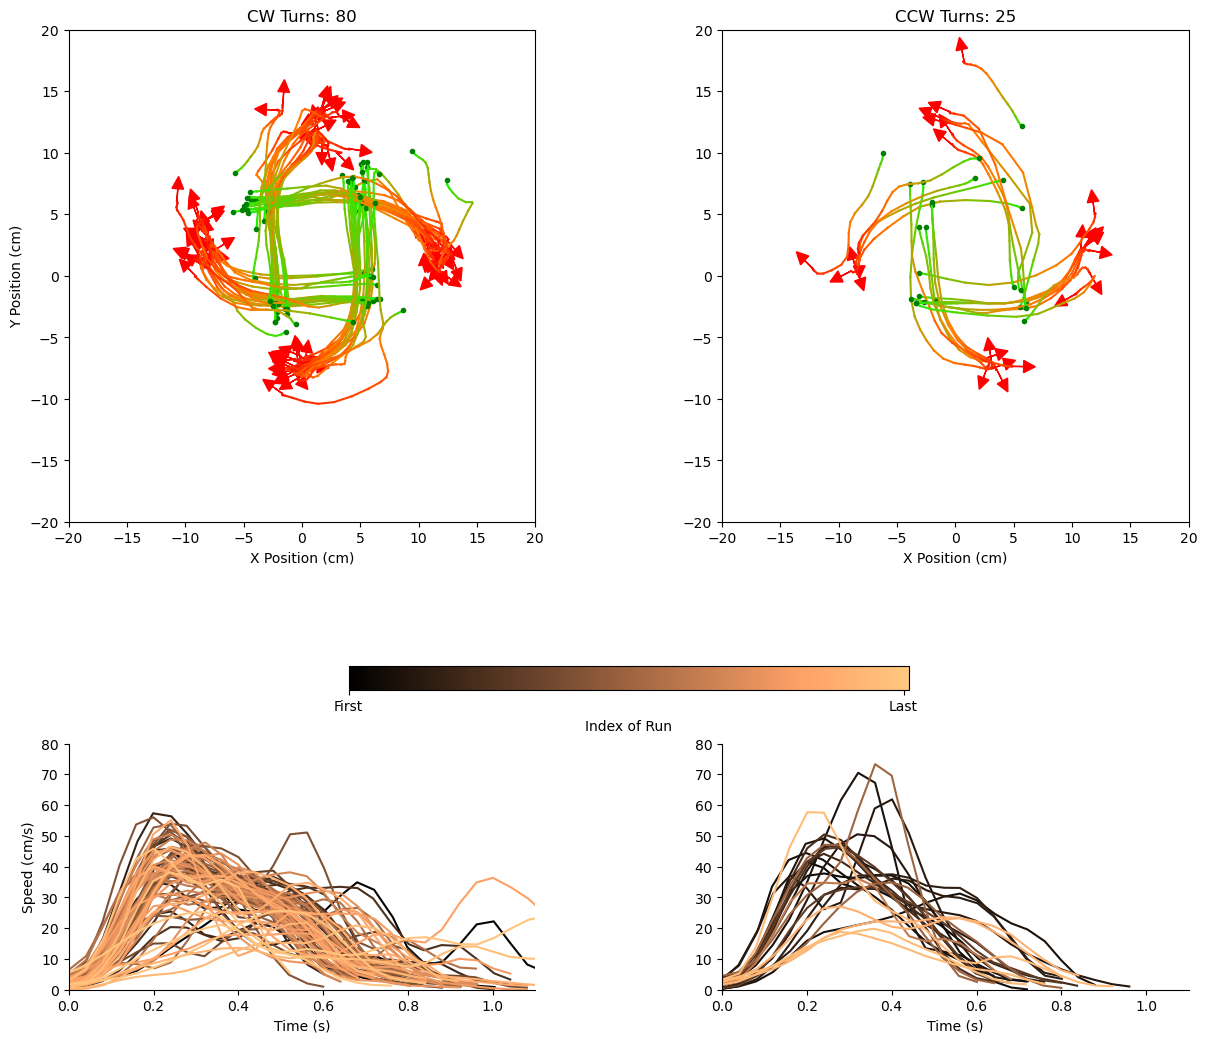

In [1198]:
# Plot data
plot_CW_CCW_runs_around_towers_vsrewardport(
    traject_time, smoothed_Xpositions_cm, smoothed_Ypositions_cm, runs_around_tower, reward_spouts, speeds, CW_turns, CCW_turns
)

In [1199]:
def plot_CW_CCW_runs_around_towers_origin(traject_time, smoothed_Xpositions, smoothed_Ypositions, runs_around_tower, speeds, CW_turns, CCW_turns, q=4):
    fig, axs = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})  # Adjusted figsize and height ratios
    fixed_origin = (0, 0)  # Define a fixed origin point
    cmap = plt.cm.copper  # Use 'cool' colormap directly
    norm = Normalize(vmin=0, vmax=len(runs_around_tower))  # Normalize indices to colormap range

    for index, run_around_tower in enumerate(runs_around_tower):
        if run_around_tower[3]['num_trapezeswitch'] > 1:
            continue

        start_index, end_index = run_around_tower[0][0], run_around_tower[0][1]

        runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]
        numberofpositions = len(runtype_epoch_Xpositions)
        colorgradientforthisrun = custom_cmap(numberofpositions)  # Generate color gradient for this run

        if run_around_tower[3]['direction'] == 'CW':
            subplotindex = 0
        else:
            subplotindex = 1

        start_x, start_y = runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0]
        translated_Xpositions = [x - start_x + fixed_origin[0] for x in runtype_epoch_Xpositions]
        translated_Ypositions = [y - start_y + fixed_origin[1] for y in runtype_epoch_Ypositions]

        for i in range(numberofpositions - 1):
            axs[0, subplotindex].plot(translated_Xpositions[i:i+2], translated_Ypositions[i:i+2], color=colorgradientforthisrun[i])

        axs[0, subplotindex].plot(translated_Xpositions[0], translated_Ypositions[0], 'go', markersize=3)

        if len(translated_Xpositions) >= q:
            dx = translated_Xpositions[-1] - translated_Xpositions[-q]
            dy = translated_Ypositions[-1] - translated_Ypositions[-q]
            norm_speed = np.hypot(dx, dy)
            if norm_speed != 0:
                dx /= norm_speed
                dy /= norm_speed
            axs[0, subplotindex].arrow(translated_Xpositions[-1], translated_Ypositions[-1], dx, dy,
                                       head_width=1, head_length=1, fc='red', ec='red')

        adjusted_time = [t - traject_time[start_index] for t in traject_time[start_index:end_index + 1]]
        axs[1, subplotindex].plot(adjusted_time, speeds[start_index:end_index + 1], color=cmap(norm(index)))

    axs[0, 0].set_ylabel('Y Position (cm)')
    axs[0, 0].set_xlabel('X Position (cm)')
    axs[0, 1].set_xlabel('X Position (cm)')
    axs[1, 0].set_ylabel('Speed (cm/s)')
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 1].set_xlabel('Time (s)')

    for subplotindex in [0, 1]:
        axs[1, subplotindex].set_ylim(0, 80)
        axs[1, subplotindex].set_xlim(0, 1.1)
        axs[0, subplotindex].set_ylim(-20, 20)
        axs[0, subplotindex].set_xlim(-20, 20)
        if subplotindex == 0:
            axs[0, subplotindex].set_title(f"CW Turns: {CW_turns}")
        else:
            axs[0, subplotindex].set_title(f"CCW Turns: {CCW_turns}")

    for ax in axs[1, :]:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    cbar_ax = fig.add_axes([0.3, 0.35, 0.4, 0.02])  # [left, bottom, width, height]
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Index of Run')
    cbar.set_ticks([0, len(runs_around_tower)-1])
    cbar.set_ticklabels(['First', 'Last'])

    # fig.set_layout_engine(None)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4)
    plt.show()



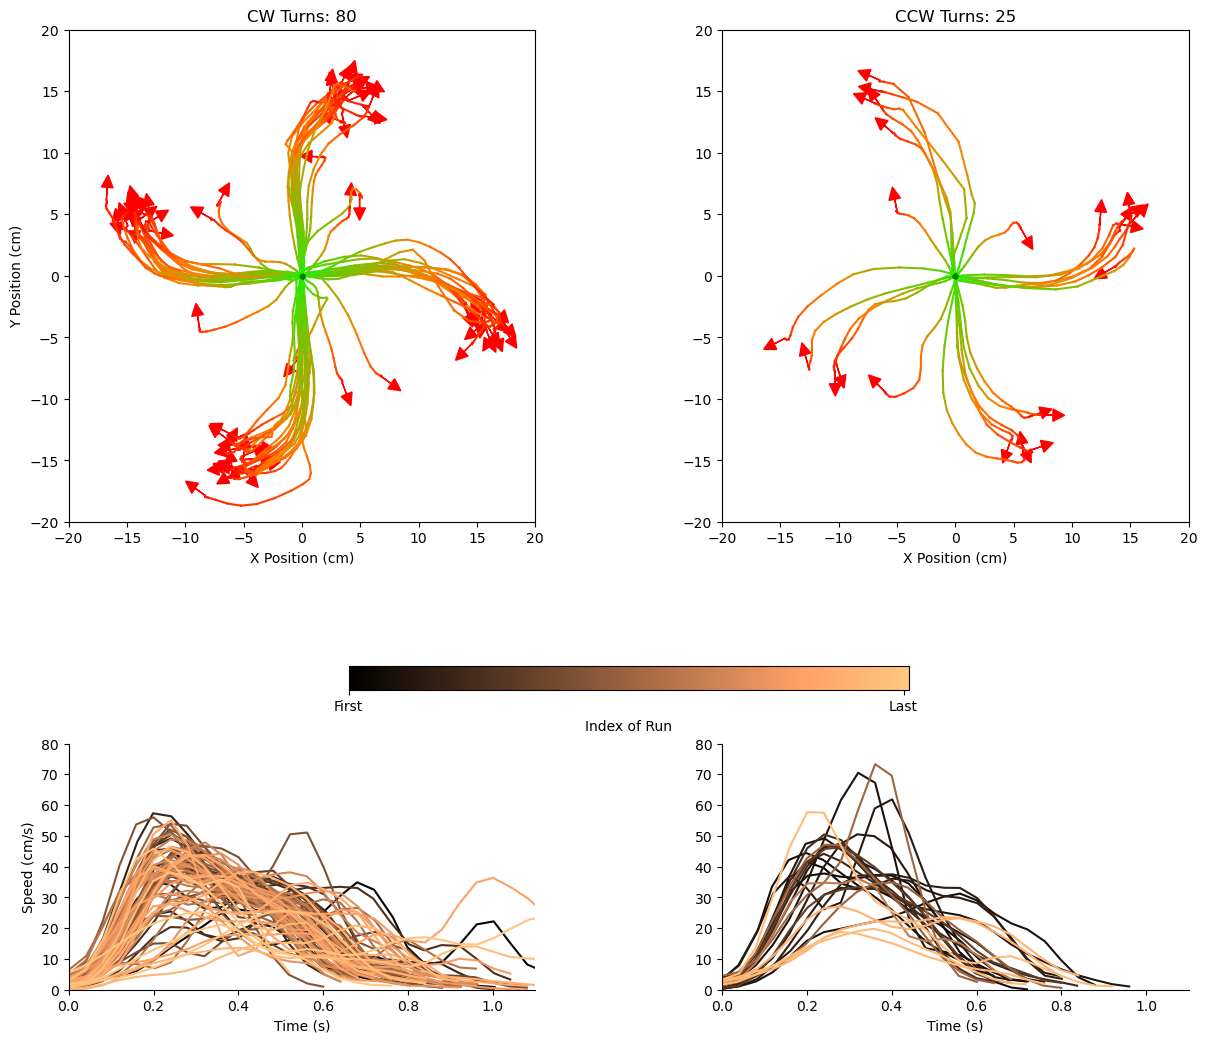

In [1200]:
# Plot data
plot_CW_CCW_runs_around_towers_origin(
    traject_time, smoothed_Xpositions_cm, smoothed_Ypositions_cm, runs_around_tower, speeds, CW_turns, CCW_turns
)


In [1201]:
runs_around_tower

[[[97, 114],
  ['SE', 'E'],
  ['SE', 'S'],
  {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1},
  {'run_time': 18.922,
   'run_duration': 0.6780000000000008,
   'run_distance': 14.782824156795336,
   'run_meanspeed': 21.803575452500468,
   'run_maxspeed': 39.12197777494724}],
 [[126, 144],
  ['SE', 'S'],
  ['SE', 'W'],
  {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1},
  {'run_time': 20.08,
   'run_duration': 0.7210000000000001,
   'run_distance': 15.861852607494727,
   'run_meanspeed': 21.99979557211474,
   'run_maxspeed': 42.68745117337255}],
 [[156, 184],
  ['SE', 'W'],
  ['SE', 'N'],
  {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1},
  {'run_time': 21.281,
   'run_duration': 1.1210000000000022,
   'run_distance': 19.818727729730053,
   'run_meanspeed': 17.67950734141839,
   'run_maxspeed': 33.88115108945}],
 [[249, 274],
  ['SE', 'S'],
  ['SE', 'W'],
  {'Rewarded': True, 'direction': 'CW', 'num_trapezeswitch': 1},
  {'run_time': 25.0,
   'run

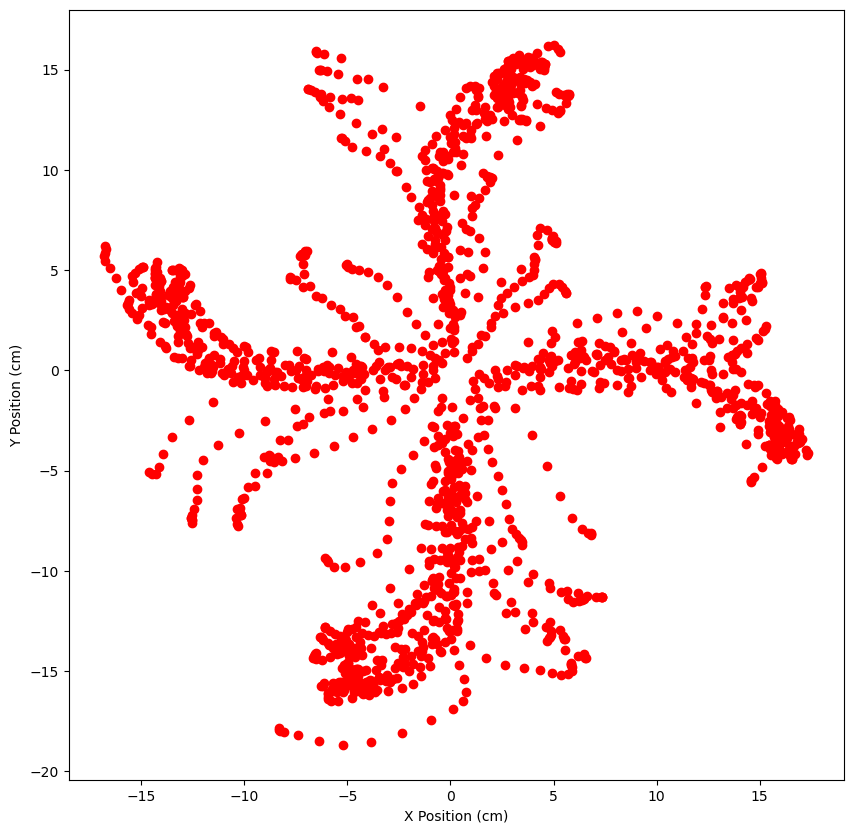

In [1202]:
import matplotlib.pyplot as plt

fixed_origin = (0, 0)  # Define a fixed origin point
all_Xpositions = []
all_Ypositions = []

for run_around_tower in runs_around_tower:
    if run_around_tower[3]['num_trapezeswitch'] > 1:
        continue

    # Extract start and end index from run_around_tower
    start_index, end_index = run_around_tower[0][0], run_around_tower[0][1]

    # Get the X and Y positions for the epoch
    runtype_epoch_Xpositions = smoothed_Xpositions_cm[start_index:end_index + 1]
    runtype_epoch_Ypositions = smoothed_Ypositions_cm[start_index:end_index + 1]
    
    # Translate positions based on the start point and fixed origin
    start_x, start_y = runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0]
    translated_Xpositions = [x - start_x + fixed_origin[0] for x in runtype_epoch_Xpositions]
    translated_Ypositions = [y - start_y + fixed_origin[1] for y in runtype_epoch_Ypositions]

    # Extend the lists instead of appending
    all_Xpositions.extend(translated_Xpositions[5:])
    all_Ypositions.extend(translated_Ypositions[5:])

# Ensure there is data to plot
if all_Xpositions and all_Ypositions:
    plt.figure(figsize=(10, 10))
    plt.scatter(all_Xpositions, all_Ypositions, color='red')
    plt.ylabel('Y Position (cm)')
    plt.xlabel('X Position (cm)')
    plt.show()


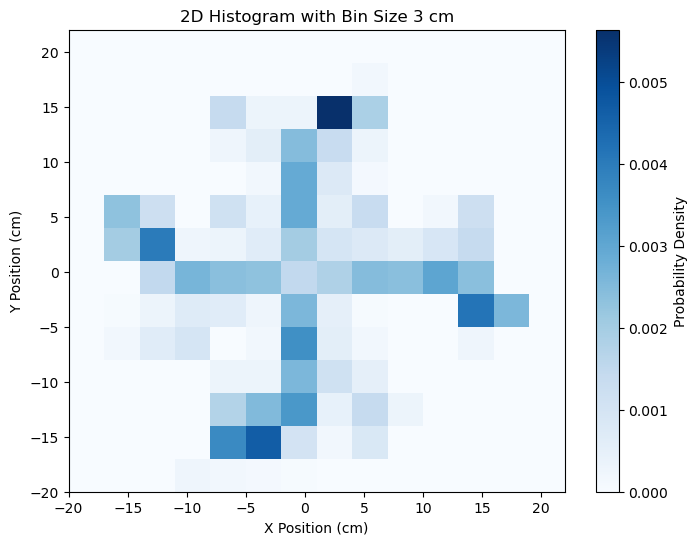

Normalized values in bins:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.94476857e-04 6.48256191e-05 0.00000000e+00 2.00959419e-03
  2.33372229e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.48256191e-04 3.24128095e-04 1.49098924e-03 4.01918838e-03
  1.23168676e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.59302476e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.72384286e-04 7.13081810e-04 2.65785038e-03 2.59302476e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.94476857e-04 3.69506029e-03 1.75029172e-03 3.24128095e-04
  0.00000000e+00 6.48256191e-04 2.3

In [1203]:
plt.rcParams['figure.figsize'] = [5, 5]  # Set default figure size

bin_size = 3  # You can adjust this to your desired bin size

# Define the range for both axes (-20 cm to +20 cm)
x_range = (-20, 20)
y_range = (-20, 20)

## Create 2D histogram with normalization
plt.figure(figsize=(8, 6))
hist, xedges, yedges, im = plt.hist2d(all_Xpositions, all_Ypositions,
                                       bins=[np.arange(x_range[0], x_range[1] + bin_size, bin_size),
                                             np.arange(y_range[0], y_range[1] + bin_size, bin_size)],
                                       range=[x_range, y_range],
                                       cmap='Blues',
                                       density=True)  # Normalized values

# Add color bar
plt.colorbar(im, label='Probability Density')

# Label the axes
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title(f'2D Histogram with Bin Size {bin_size} cm')
plt.show()

# Access normalized values
print("Normalized values in bins:")
print(hist)


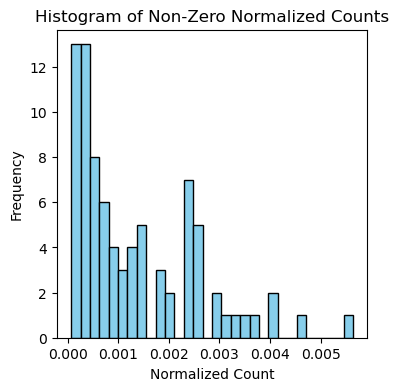

In [1204]:
# Flatten the histogram and remove zero values
non_zero_hist = hist[hist > 0]

# Create histogram of non-zero normalized counts
plt.figure(figsize=(4, 4))
plt.hist(non_zero_hist, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Normalized Count')
plt.ylabel('Frequency')
plt.title('Histogram of Non-Zero Normalized Counts')
plt.show()

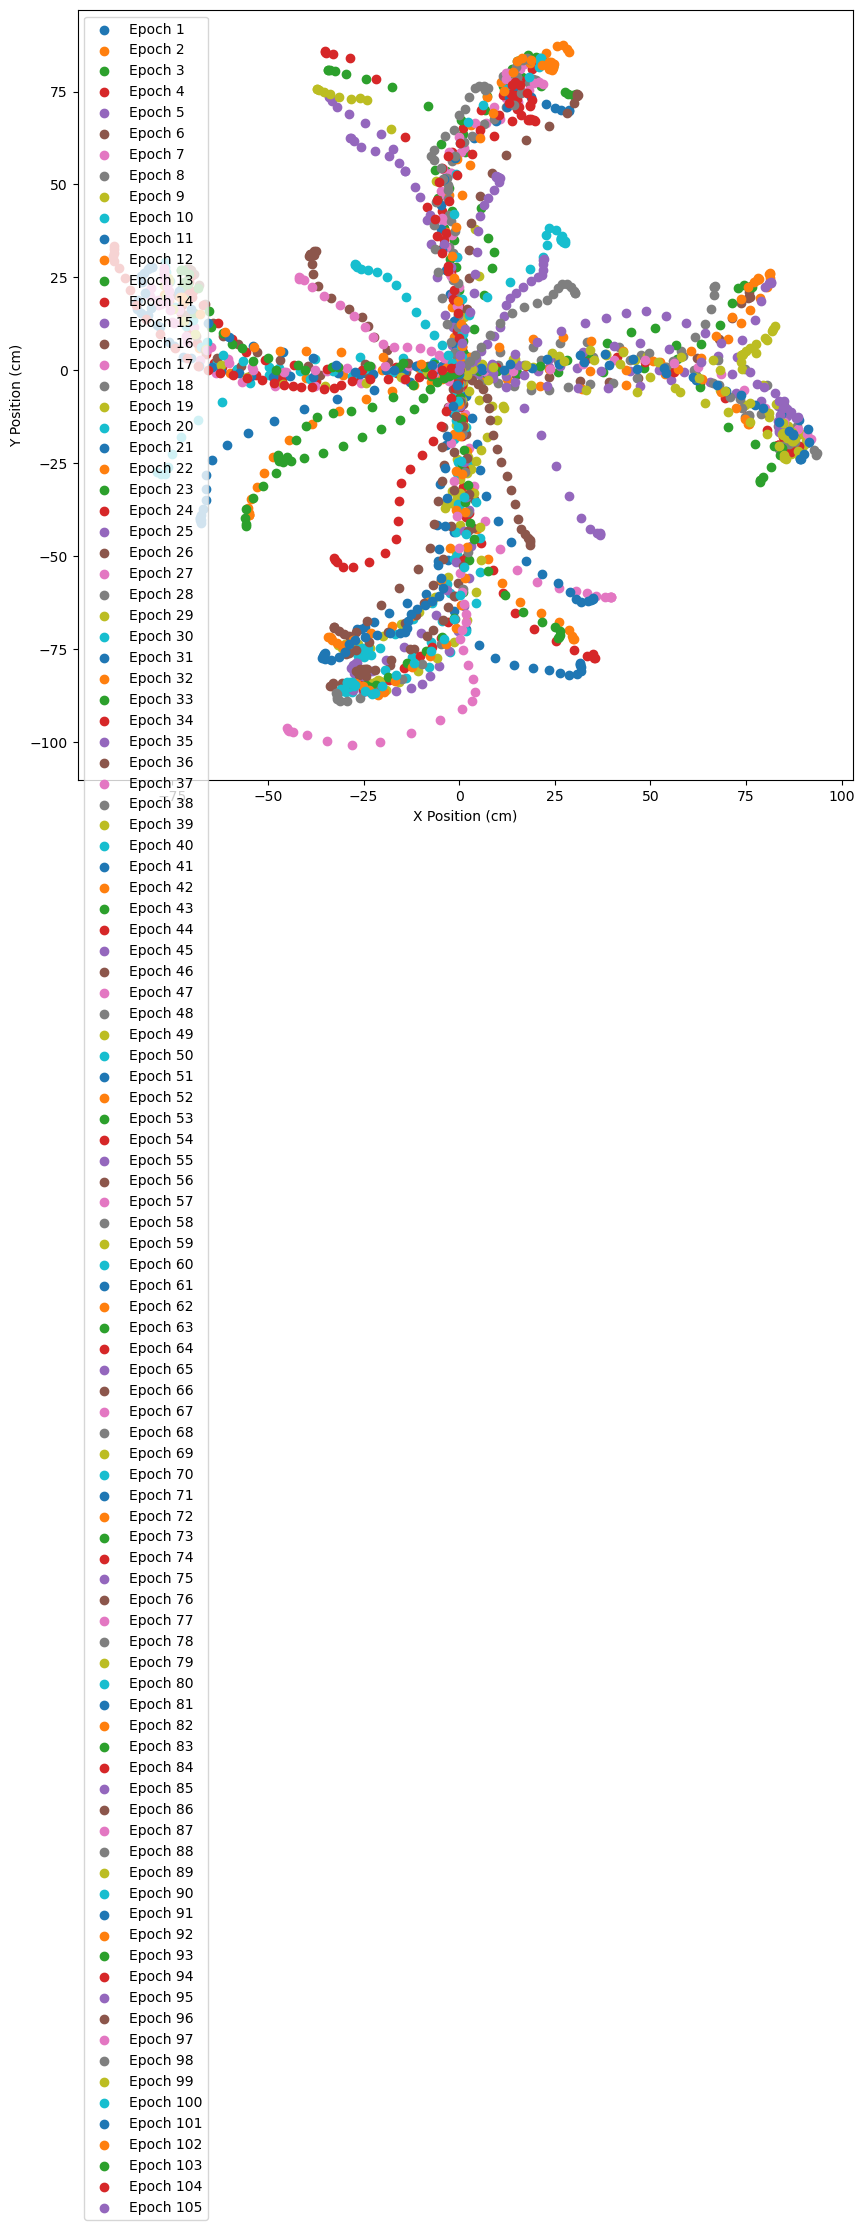

In [1205]:
import matplotlib.pyplot as plt

fixed_origin = (0, 0)  # Define a fixed origin point
all_Xpositions = []
all_Ypositions = []

for run_around_tower in runs_around_tower:
    if run_around_tower[3]['num_trapezeswitch'] > 1:
        continue

    # Extract start and end index from run_around_tower
    start_index, end_index = run_around_tower[0][0], run_around_tower[0][1]

    # Get the X and Y positions for the epoch
    runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
    runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]
    
    # Translate positions based on the start point and fixed origin
    start_x, start_y = runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0]
    translated_Xpositions = [x - start_x + fixed_origin[0] for x in runtype_epoch_Xpositions]
    translated_Ypositions = [y - start_y + fixed_origin[1] for y in runtype_epoch_Ypositions]

    # Append translated positions
    all_Xpositions.append(translated_Xpositions)
    all_Ypositions.append(translated_Ypositions)

# Ensure there is data to plot
if all_Xpositions and all_Ypositions:
    plt.figure(figsize=(10, 10))
    
    # Loop through all positions and plot each epoch
    for i in range(len(all_Xpositions)):
        plt.scatter(all_Xpositions[i], all_Ypositions[i], label=f'Epoch {i+1}')

    plt.ylabel('Y Position (cm)')
    plt.xlabel('X Position (cm)')
    plt.legend()
    plt.show()


In [1206]:
# assert False, "Stopping execution here"

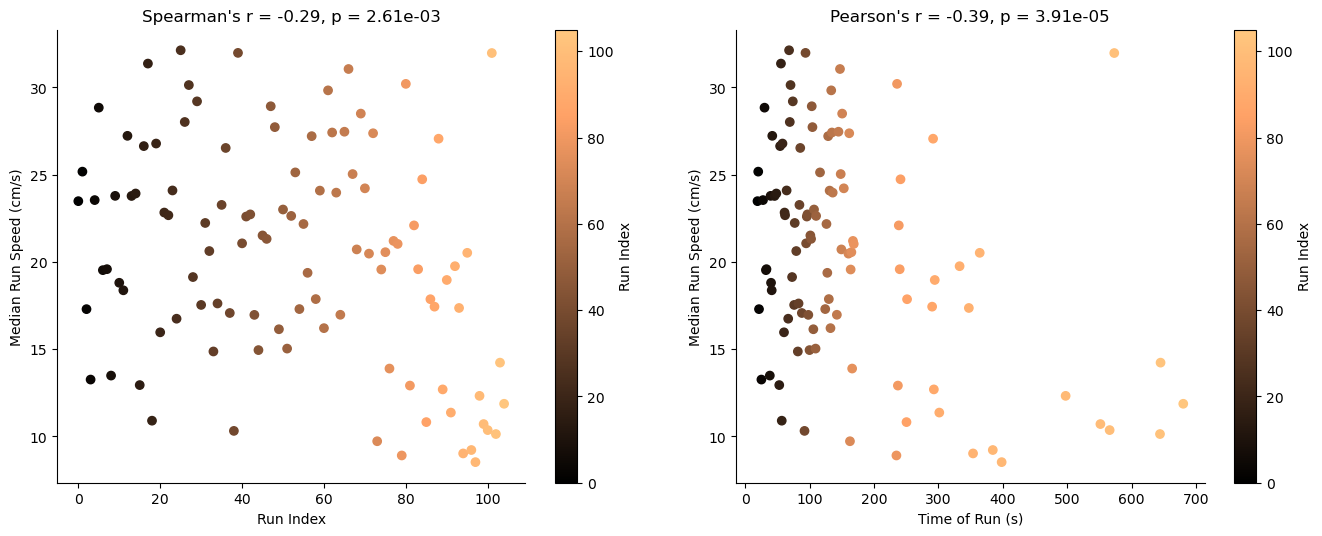

Spearman's rank correlation coefficient (index): -0.290866680489322
P-value (index): 0.002610880879933051
Pearson's rank correlation coefficient (time): -0.390004253883755
P-value (time): 3.9122866181507354e-05
The correlation between run index and median run speed is statistically significant.
The correlation between time of run and median run speed is statistically significant.


In [1207]:
from scipy.stats import spearmanr, pearsonr

median_speed_runs = []
time_runs = []

for time_run, median_speed_run in timeANDmedian_speed_of_runs:
    median_speed_runs.append(median_speed_run)
    time_runs.append(time_run)

# Generate the indices for the runs
run_indices = np.arange(len(time_runs))

# Compute Spearman's rank correlation coefficient and the p-value for both sets of data
correlation_coefficient_index, p_value_index = spearmanr(run_indices, median_speed_runs)
# Compute Pearson's correlation coefficient and the p-value for time vs. median speed
correlation_coefficient_time, p_value_time = pearsonr(time_runs, median_speed_runs)

# Create a colormap
cmap = plt.cm.copper
norm = plt.Normalize(vmin=0, vmax=len(median_speed_runs))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the median run speeds vs. run index as a scatter plot with color gradient
sc1 = axs[0].scatter(run_indices, median_speed_runs, c=run_indices, cmap=cmap, norm=norm)
axs[0].set_xlabel('Run Index')
axs[0].set_ylabel('Median Run Speed (cm/s)')
axs[0].set_title(f"Spearman's r = {correlation_coefficient_index:.2f}, p = {p_value_index:.2e}")
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
fig.colorbar(sc1, ax=axs[0], label='Run Index')

# Plot the median run speeds vs. time of run as a scatter plot with color gradient
sc2 = axs[1].scatter(time_runs, median_speed_runs, c=run_indices, cmap=cmap, norm=norm)
axs[1].set_xlabel('Time of Run (s)')
axs[1].set_ylabel('Median Run Speed (cm/s)')
axs[1].set_title(f"Pearson's r = {correlation_coefficient_time:.2f}, p = {p_value_time:.2e}")
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
fig.colorbar(sc2, ax=axs[1], label='Run Index')

# Adjust layout
fig.tight_layout(pad=3.0)

# Display the plot
plt.show()

# Print the results
print(f"Spearman's rank correlation coefficient (index): {correlation_coefficient_index}")
print(f"P-value (index): {p_value_index}")
print(f"Pearson's rank correlation coefficient (time): {correlation_coefficient_time}")
print(f"P-value (time): {p_value_time}")

# Check if the correlation is significant
alpha = 0.05  # significance level
if p_value_index < alpha:
    print("The correlation between run index and median run speed is statistically significant.")
else:
    print("The correlation between run index and median run speed is not statistically significant.")

if p_value_time < alpha:
    print("The correlation between time of run and median run speed is statistically significant.")


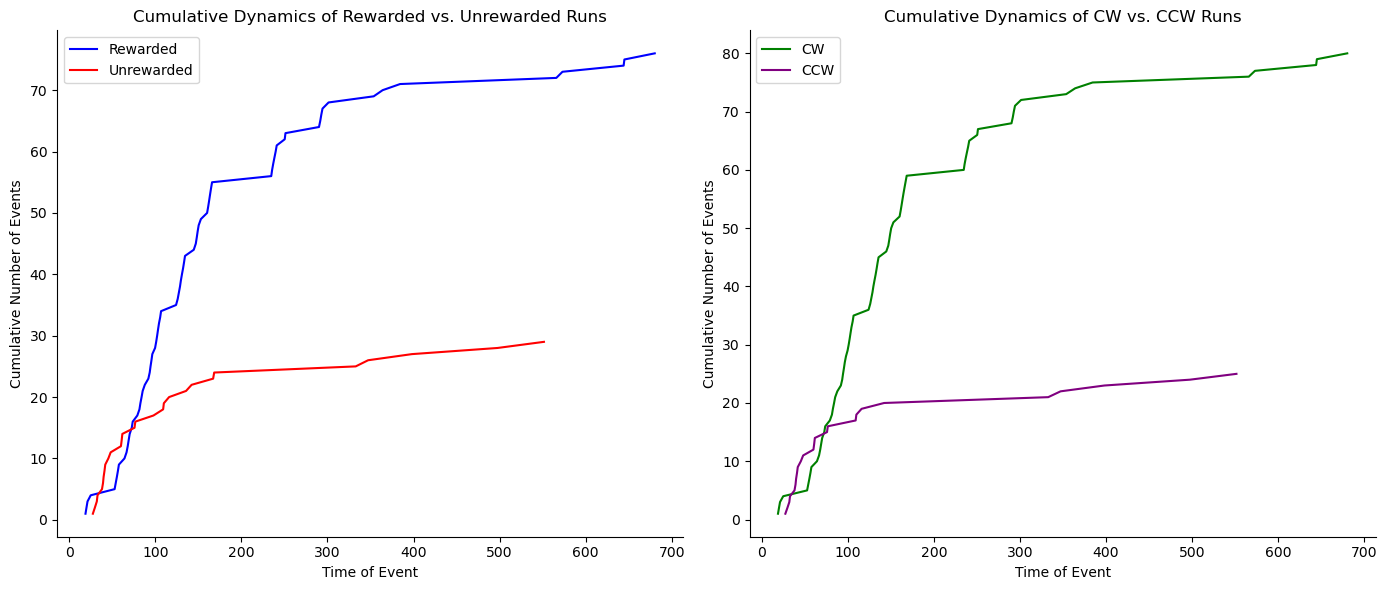

In [1208]:
# Calculate cumulative counts
rewarded_times_sorted = np.sort(time_of_runsaroundtower_bytype['rewarded'])
unrewarded_times_sorted = np.sort(time_of_runsaroundtower_bytype['unrewarded'])
CW_times_sorted = np.sort(time_of_runsaroundtower_bytype['CW'])
CCW_times_sorted = np.sort(time_of_runsaroundtower_bytype['CCW'])

rewarded_cumulative = np.arange(1, len(rewarded_times_sorted) + 1)
unrewarded_cumulative = np.arange(1, len(unrewarded_times_sorted) + 1)
CW_cumulative = np.arange(1, len(CW_times_sorted) + 1)
CCW_cumulative = np.arange(1, len(CCW_times_sorted) + 1)

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot cumulative dynamics for rewarded vs. unrewarded runs
axs[0].plot(rewarded_times_sorted, rewarded_cumulative, label='Rewarded', color='blue')
axs[0].plot(unrewarded_times_sorted, unrewarded_cumulative, label='Unrewarded', color='red')
axs[0].set_xlabel('Time of Event')
axs[0].set_ylabel('Cumulative Number of Events')
axs[0].set_title('Cumulative Dynamics of Rewarded vs. Unrewarded Runs')
axs[0].legend()
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

# Plot cumulative dynamics for CW vs. CCW runs
axs[1].plot(CW_times_sorted, CW_cumulative, label='CW', color='green')
axs[1].plot(CCW_times_sorted, CCW_cumulative, label='CCW', color='purple')
axs[1].set_xlabel('Time of Event')
axs[1].set_ylabel('Cumulative Number of Events')
axs[1].set_title('Cumulative Dynamics of CW vs. CCW Runs')
axs[1].legend()
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [1209]:
for key, value in all_epochs.items():
    print(key)

run_around_tower
run_between_towers
run_toward_tower
exploratory_run
immobility


## Between Towers Run

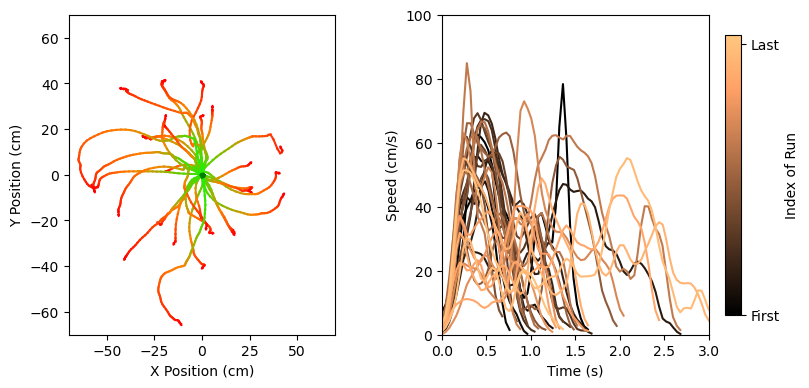

In [1210]:
# Create a deep copy of the list
runs_between_towers = copy.deepcopy(all_epochs['run_between_towers'])

# for run_index,run_between_towers in enumerate(runs_between_towers):
#     print(run_between_towers)

    

def plot_runs_between_towers_origin(traject_time, smoothed_Xpositions, smoothed_Ypositions, runs_between_towers, q=4):
    speeds = compute_distance_speed_angular_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time)[1]

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    timeANDmedian_speed_of_runs = []
    fixed_origin = (0, 0)
    cmap = plt.cm.copper
    norm = Normalize(vmin=0, vmax=len(runs_between_towers))

    for index, run_between_towers in enumerate(runs_between_towers):
        start_index, end_index = run_between_towers[0][0], run_between_towers[0][1]
        runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]

        numberofpositions = len(runtype_epoch_Xpositions)
        colorgradientforthisrun = custom_cmap(numberofpositions)

        if len(runtype_epoch_Xpositions) != len(runtype_epoch_Ypositions):
            raise ValueError("The lengths of X and Y positions lists must be the same.")

        start_x, start_y = runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0]
        translated_Xpositions = [x - start_x + fixed_origin[0] for x in runtype_epoch_Xpositions]
        translated_Ypositions = [y - start_y + fixed_origin[1] for y in runtype_epoch_Ypositions]

        for i in range(numberofpositions - 1):
            axs[0].plot(translated_Xpositions[i:i+2], translated_Ypositions[i:i+2], color=colorgradientforthisrun[i])

        axs[0].plot(translated_Xpositions[0], translated_Ypositions[0], 'go', markersize=3)

        if len(translated_Xpositions) >= q:
            dx = translated_Xpositions[-1] - translated_Xpositions[-q]
            dy = translated_Ypositions[-1] - translated_Ypositions[-q]

            norm_speed = np.hypot(dx, dy)
            if norm_speed != 0:
                dx /= norm_speed
                dy /= norm_speed

            axs[0].arrow(translated_Xpositions[-1], translated_Ypositions[-1], dx, dy,
                         head_width=1, head_length=1, fc='red', ec='red')

        adjusted_time = [t - traject_time[start_index] for t in traject_time[start_index:end_index + 1]]
        axs[1].plot(adjusted_time, speeds[start_index:end_index + 1], color=cmap(norm(index)))
        timeANDmedian_speed_of_runs.append([traject_time[start_index], np.median(speeds[start_index:end_index + 1]),np.max(speeds[start_index:end_index + 1])])

    axs[0].set_ylabel('Y Position (cm)')
    axs[0].set_xlabel('X Position (cm)')
    axs[1].set_ylabel('Speed (cm/s)')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylim(0, 100)
    axs[1].set_xlim(0, 3)
    axs[0].set_ylim(-70, 70)
    axs[0].set_xlim(-70, 70)

    # Create an additional axes for the colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, orientation='vertical')
    cbar.set_label('Index of Run')
    cbar.set_ticks([0, len(runs_between_towers) - 1])
    cbar.set_ticklabels(['First', 'Last'])

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)
    plt.show()

    return timeANDmedian_speed_of_runs

# Example call (replace with your actual data)
timeANDmedian_speed_of_between_tower_runs = plot_runs_between_towers_origin(traject_time, smoothed_Xpositions_cm, smoothed_Ypositions_cm, runs_between_towers)


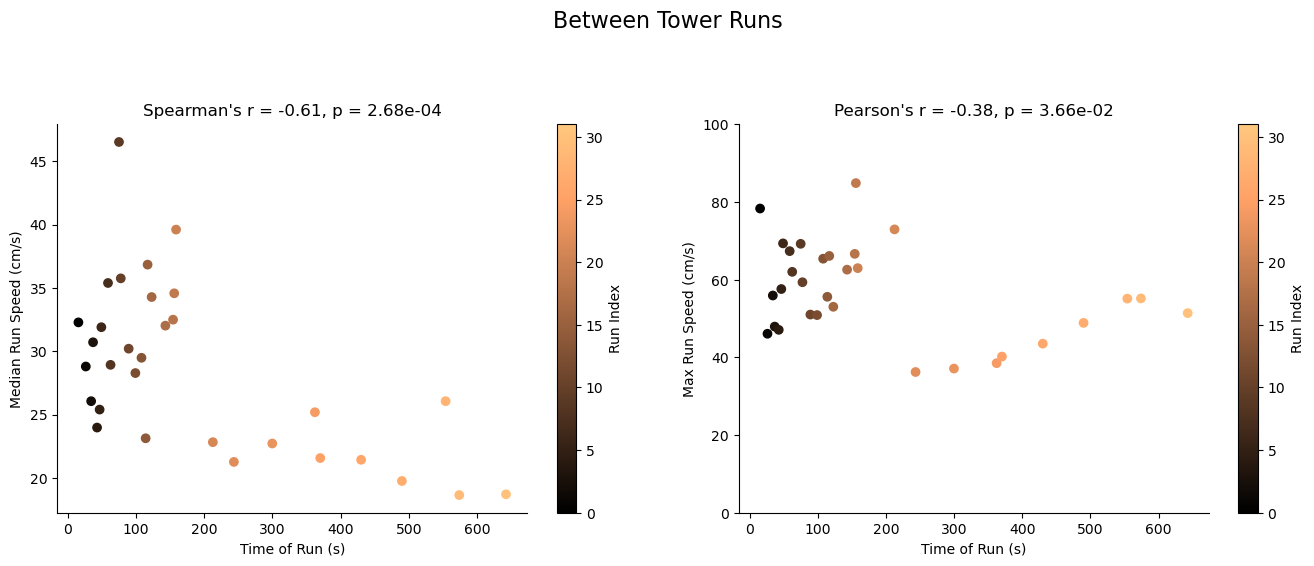

Spearman's rank correlation coefficient (index): -0.6101424958894411
P-value (index): 0.0002679510499211548
Pearson's rank correlation coefficient (time): -0.37696738846611433
P-value (time): 0.036578565866057955
The correlation between run index and median run speed is statistically significant.
The correlation between time of run and median run speed is statistically significant.


In [1211]:
# compute the speed of the runs
max_speed_runs=[]
median_speed_runs = []
time_runs = []

for time_run, median_speed_run,max_speed_run in timeANDmedian_speed_of_between_tower_runs:
    median_speed_runs.append(median_speed_run)
    max_speed_runs.append(max_speed_run)
    time_runs.append(time_run)

# Generate the indices for the runs
run_indices = np.arange(len(time_runs))

# Compute Spearman's rank correlation coefficient and the p-value for both sets of data
correlation_coefficient_index, p_value_index = pearsonr(time_runs, median_speed_runs)
# Compute Pearson's correlation coefficient and the p-value for time vs. median speed
correlation_coefficient_time, p_value_time = pearsonr(time_runs, max_speed_runs)

# Create a colormap
cmap = plt.cm.copper
norm = plt.Normalize(vmin=0, vmax=len(median_speed_runs))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Between Tower Runs', fontsize=16)

# Plot the median run speeds vs. run index as a scatter plot with color gradient
sc1 = axs[0].scatter(time_runs, median_speed_runs, c=run_indices, cmap=cmap, norm=norm)
axs[0].set_xlabel('Time of Run (s)')
axs[0].set_ylabel('Median Run Speed (cm/s)')
axs[0].set_title(f"Spearman's r = {correlation_coefficient_index:.2f}, p = {p_value_index:.2e}")
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
fig.colorbar(sc1, ax=axs[0], label='Run Index')

# Plot the median run speeds vs. time of run as a scatter plot with color gradient
sc2 = axs[1].scatter(time_runs, max_speed_runs, c=run_indices, cmap=cmap, norm=norm)
axs[1].set_xlabel('Time of Run (s)')
axs[1].set_ylabel('Max Run Speed (cm/s)')
axs[1].set_title(f"Pearson's r = {correlation_coefficient_time:.2f}, p = {p_value_time:.2e}")
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].set_ylim(0,100)
fig.colorbar(sc2, ax=axs[1], label='Run Index')

# Adjust layout
fig.tight_layout(pad=3.0)

# Display the plot
plt.show()

# Print the results
print(f"Spearman's rank correlation coefficient (index): {correlation_coefficient_index}")
print(f"P-value (index): {p_value_index}")
print(f"Pearson's rank correlation coefficient (time): {correlation_coefficient_time}")
print(f"P-value (time): {p_value_time}")

# Check if the correlation is significant
alpha = 0.05  # significance level
if p_value_index < alpha:
    print("The correlation between run index and median run speed is statistically significant.")
else:
    print("The correlation between run index and median run speed is not statistically significant.")

if p_value_time < alpha:
    print("The correlation between time of run and median run speed is statistically significant.")


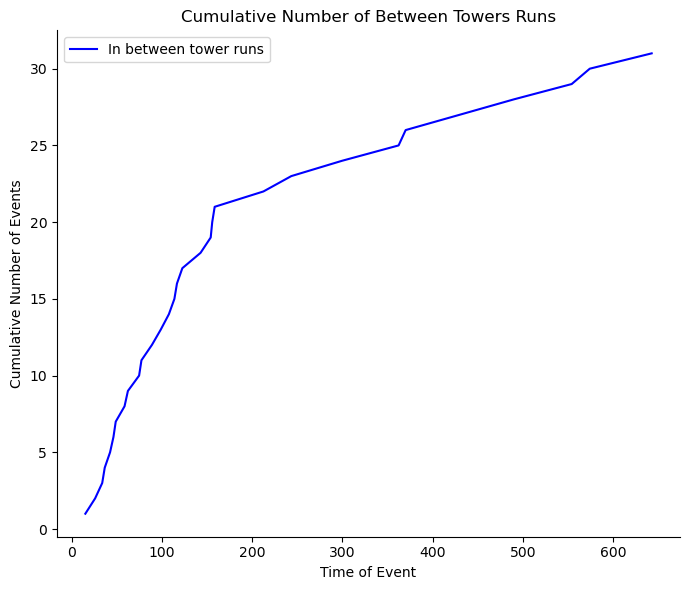

In [1212]:
# Calculate cumulative counts
between_tower_runs_times_sorted = np.sort(time_runs)
between_tower_runs_cumulative = np.arange(1, len(between_tower_runs_times_sorted) + 1)


# Create the subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 6))

# Plot cumulative dynamics for rewarded vs. unrewarded runs
axs.plot(between_tower_runs_times_sorted, between_tower_runs_cumulative, label='In between tower runs', color='blue')
axs.set_xlabel('Time of Event')
axs.set_ylabel('Cumulative Number of Events')
axs.set_title('Cumulative Number of Between Towers Runs')
axs.legend()
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Exploratory Runs

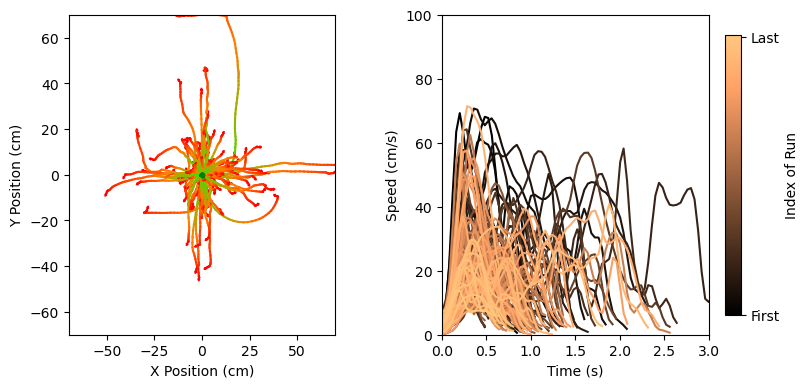

In [1213]:
# Create a deep copy of the list
exploratory_runs = copy.deepcopy(all_epochs['exploratory_run'])

# for run_index,run_between_towers in enumerate(exploratory_runs):
#     print(run_between_towers)

    

def plot_exploratory_runs_orgin(traject_time, smoothed_Xpositions, smoothed_Ypositions, exploratory_runs, q=4):
    speeds = compute_distance_speed_angular_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time)[1]

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    timeANDmedian_speed_of_runs = []
    fixed_origin = (0, 0)
    cmap = plt.cm.copper
    norm = Normalize(vmin=0, vmax=len(exploratory_runs))

    for index, run_between_towers in enumerate(exploratory_runs):
        start_index, end_index = run_between_towers[0][0], run_between_towers[0][1]
        runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]

        numberofpositions = len(runtype_epoch_Xpositions)
        colorgradientforthisrun = custom_cmap(numberofpositions)

        if len(runtype_epoch_Xpositions) != len(runtype_epoch_Ypositions):
            raise ValueError("The lengths of X and Y positions lists must be the same.")

        start_x, start_y = runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0]
        translated_Xpositions = [x - start_x + fixed_origin[0] for x in runtype_epoch_Xpositions]
        translated_Ypositions = [y - start_y + fixed_origin[1] for y in runtype_epoch_Ypositions]

        for i in range(numberofpositions - 1):
            axs[0].plot(translated_Xpositions[i:i+2], translated_Ypositions[i:i+2], color=colorgradientforthisrun[i])

        axs[0].plot(translated_Xpositions[0], translated_Ypositions[0], 'go', markersize=3)

        if len(translated_Xpositions) >= q:
            dx = translated_Xpositions[-1] - translated_Xpositions[-q]
            dy = translated_Ypositions[-1] - translated_Ypositions[-q]

            norm_speed = np.hypot(dx, dy)
            if norm_speed != 0:
                dx /= norm_speed
                dy /= norm_speed

            axs[0].arrow(translated_Xpositions[-1], translated_Ypositions[-1], dx, dy,
                         head_width=1, head_length=1, fc='red', ec='red')

        adjusted_time = [t - traject_time[start_index] for t in traject_time[start_index:end_index + 1]]
        axs[1].plot(adjusted_time, speeds[start_index:end_index + 1], color=cmap(norm(index)))
        timeANDmedian_speed_of_runs.append([traject_time[start_index], np.median(speeds[start_index:end_index + 1]),np.max(speeds[start_index:end_index + 1])])

    axs[0].set_ylabel('Y Position (cm)')
    axs[0].set_xlabel('X Position (cm)')
    axs[1].set_ylabel('Speed (cm/s)')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylim(0, 100)
    axs[1].set_xlim(0, 3)
    axs[0].set_ylim(-70, 70)
    axs[0].set_xlim(-70, 70)

    # Create an additional axes for the colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, orientation='vertical')
    cbar.set_label('Index of Run')
    cbar.set_ticks([0, len(exploratory_runs) - 1])
    cbar.set_ticklabels(['First', 'Last'])

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)
    plt.show()

    return timeANDmedian_speed_of_runs

# Example call (replace with your actual data)
timeANDmedian_speed_ofexploratory_runs = plot_exploratory_runs_orgin(traject_time, smoothed_Xpositions_cm, smoothed_Ypositions_cm, exploratory_runs)


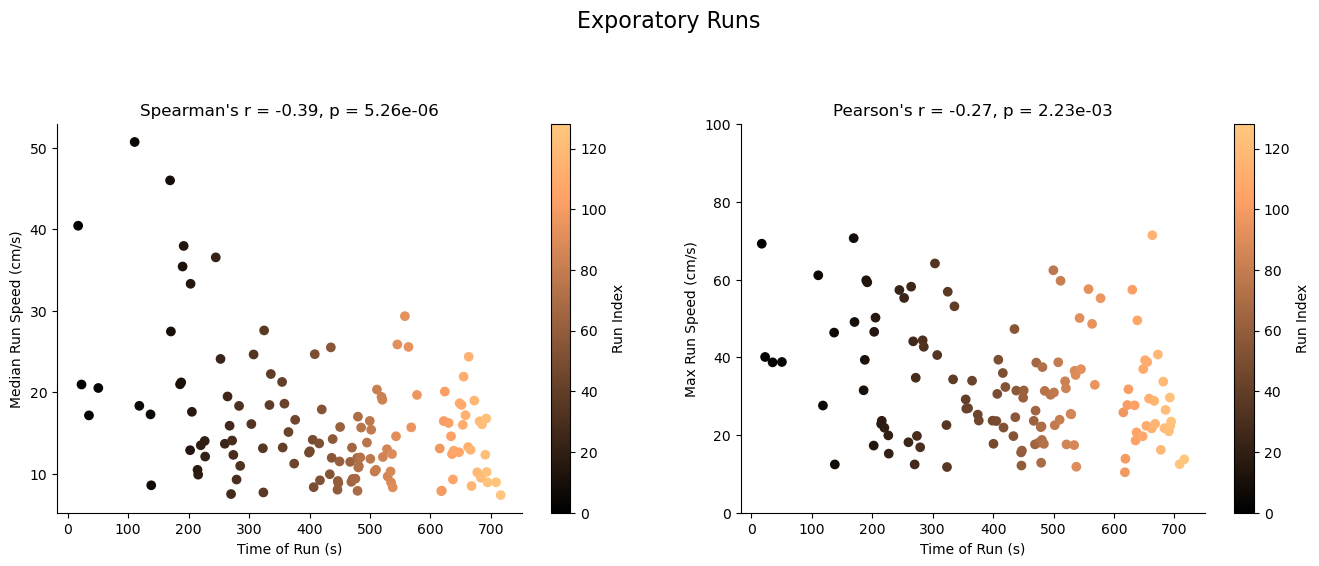

Spearman's rank correlation coefficient (index): -0.3902728420580083
P-value (index): 5.262247646389199e-06
Pearson's rank correlation coefficient (time): -0.26796525810087546
P-value (time): 0.002227673720452488
The correlation between run index and median run speed is statistically significant.
The correlation between time of run and median run speed is statistically significant.


In [1214]:
# compute the speed of the runs
max_speed_runs=[]
median_speed_runs = []
time_runs = []

for time_run, median_speed_run,max_speed_run in timeANDmedian_speed_ofexploratory_runs:
    median_speed_runs.append(median_speed_run)
    max_speed_runs.append(max_speed_run)
    time_runs.append(time_run)

# Generate the indices for the runs
run_indices = np.arange(len(time_runs))

# Compute Spearman's rank correlation coefficient and the p-value for both sets of data
correlation_coefficient_index, p_value_index = pearsonr(time_runs, median_speed_runs)
# Compute Pearson's correlation coefficient and the p-value for time vs. median speed
correlation_coefficient_time, p_value_time = pearsonr(time_runs, max_speed_runs)

# Create a colormap
cmap = plt.cm.copper
norm = plt.Normalize(vmin=0, vmax=len(median_speed_runs))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Exporatory Runs', fontsize=16)

# Plot the median run speeds vs. run index as a scatter plot with color gradient
sc1 = axs[0].scatter(time_runs, median_speed_runs, c=run_indices, cmap=cmap, norm=norm)
axs[0].set_xlabel('Time of Run (s)')
axs[0].set_ylabel('Median Run Speed (cm/s)')
axs[0].set_title(f"Spearman's r = {correlation_coefficient_index:.2f}, p = {p_value_index:.2e}")
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
fig.colorbar(sc1, ax=axs[0], label='Run Index')

# Plot the median run speeds vs. time of run as a scatter plot with color gradient
sc2 = axs[1].scatter(time_runs, max_speed_runs, c=run_indices, cmap=cmap, norm=norm)
axs[1].set_xlabel('Time of Run (s)')
axs[1].set_ylabel('Max Run Speed (cm/s)')
axs[1].set_title(f"Pearson's r = {correlation_coefficient_time:.2f}, p = {p_value_time:.2e}")
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].set_ylim(0,100)
fig.colorbar(sc2, ax=axs[1], label='Run Index')

# Adjust layout
fig.tight_layout(pad=3.0)

# Display the plot
plt.show()

# Print the results
print(f"Spearman's rank correlation coefficient (index): {correlation_coefficient_index}")
print(f"P-value (index): {p_value_index}")
print(f"Pearson's rank correlation coefficient (time): {correlation_coefficient_time}")
print(f"P-value (time): {p_value_time}")

# Check if the correlation is significant
alpha = 0.05  # significance level
if p_value_index < alpha:
    print("The correlation between run index and median run speed is statistically significant.")
else:
    print("The correlation between run index and median run speed is not statistically significant.")

if p_value_time < alpha:
    print("The correlation between time of run and median run speed is statistically significant.")


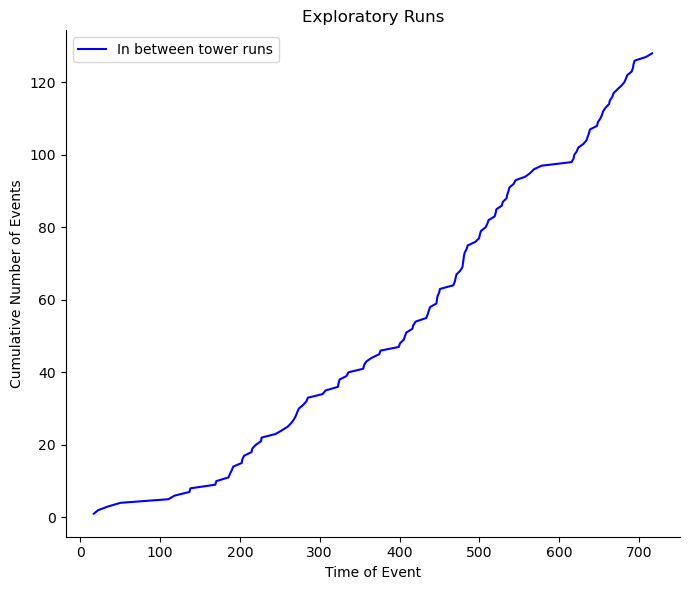

In [1215]:
# Calculate cumulative counts
exploratory_runs_times_sorted = np.sort(time_runs)
exploratory_runs_cumulative = np.arange(1, len(exploratory_runs_times_sorted) + 1)


# Create the subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 6))

# Plot cumulative dynamics for rewarded vs. unrewarded runs
axs.plot(exploratory_runs_times_sorted, exploratory_runs_cumulative, label='In between tower runs', color='blue')
axs.set_xlabel('Time of Event')
axs.set_ylabel('Cumulative Number of Events')
axs.set_title('Exploratory Runs')
axs.legend()
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [1216]:
assert False, "Stopping execution here."


## this function allows to plot only a selected run epoch 


def plot_single_run_epoch_based_on_startstopindexex(traject_time, smoothed_positions_cm, turns_df ,epoch_start_stop_indexes, all_trapezes_coordinates_cm, points_for_direction=4):
    trapeze_switch_times=[]
    plt.figure(figsize=(10, 8))

    
    
    start_index, end_index = epoch_start_stop_indexes[0], epoch_start_stop_indexes[1]
    #print(start_index,end_index)

   

    # Extract the run_epoch segment        
    run_epoch = [smoothed_positions_cm[0][start_index: end_index+1],smoothed_positions_cm[1][start_index: end_index+1]]
    times_run_epoch=traject_time[start_index:end_index+1]
    
    # Plot the raw trajectory of this epoch 
    #plt.plot(run_epoch[0], run_epoch[1], linestyle='--', color='c')
    # Plot the smooth trajectory of this epoch 
    plt.plot(smoothed_positions_cm[0][start_index: end_index+1],smoothed_positions_cm[1][start_index: end_index+1], linestyle='--', color='b')


    # Mark the beginning of the trajectory
    plt.plot(run_epoch[0][0], run_epoch[1][0], 
                marker='o', color='g', markersize=8, 
                label='Start')

    # Compute the average direction based on the last few points
    end_points = [run_epoch[0][-points_for_direction:],run_epoch[1][-points_for_direction:]]
    print(end_points)
    # Transform to the desired format
    end_points = np.column_stack((end_points[0], end_points[1]))
    # Rounding to match the format more closely
    #end_points = np.round(end_points)
    print(end_points)
    avg_diff, angle = compute_average_direction(end_points)
    print(avg_diff)
    # Draw an arrow at the end of the trajectory based on average final directions
    plt.arrow(
            run_epoch[0][-2], run_epoch[1][-2], 
            avg_diff[0], avg_diff[1],
            shape='full', lw=0, length_includes_head=True, head_width=2, color='r',
            label='End'
    )

    

    # Find turn in the turns_df data frame within this quarter turn based on time
    turns_in_QT = turns_df[(turns_df['time'] >= times_run_epoch[0]) & (turns_df['time'] <= times_run_epoch[-1])]
    #print(turns_in_QT)
    trapeze_switch_times.extend(turns_in_QT['time'].values)
    # Plot the switch of trapez as a cross marker on the trajectory
    plt.scatter(turns_in_QT['xposition']*conversion_factor, (video_resolution[1]-turns_in_QT['yposition'])*conversion_factor, marker='x', color='m', label='Turn Positions')


    # Add labels to turns indicating arrivalTrapeze, departureTrapeze, and currentPatchTower
    for _, turn in turns_in_QT.iterrows():
        plt.text(turn['xposition']*conversion_factor, (video_resolution[1]-turn['yposition'])*conversion_factor, f"{turn['currentPatch']}\n{turn['previousTrapeze']}\n{turn['currentTrapeze']}",
                    fontsize=8, color='black', ha='center', va='bottom')
        
    # Plot each square and trapeze
    for tower, trapezes in all_trapezes_coordinates_cm.items():
        for trapeze, coordinates in trapezes.items():
            # Make a copy of the coordinates and close the polygon by appending the first vertex
            coordinates_copy = coordinates + [coordinates[0]]
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates_copy)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')

    # Set plot limits and labels

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Selected run epoch')
    plt.grid(True)
    #plt.legend()
    #plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()
    
    return trapeze_switch_times




AssertionError: Stopping execution here.

In [ ]:
for run_around_tower in runs_around_tower:
    if run_around_tower[3]['num_trapezeswitch']>1:
        print(run_around_tower)


[[391, 433], ['SE', 'W'], ['SE', 'E'], {'Rewarded': '1', 'direction': 'CW', 'num_trapezeswitch': 2}]
[[7207, 7223], ['NW', 'E'], ['NW', 'N'], {'Rewarded': '1', 'direction': 'CCW', 'num_trapezeswitch': 3}]
[[11629, 11657], ['NW', 'E'], ['NW', 'W'], {'Rewarded': '1', 'direction': 'CW', 'num_trapezeswitch': 2}]
[[13009, 13041], ['NE', 'W'], ['NE', 'E'], {'Rewarded': 'False', 'direction': 'CW', 'num_trapezeswitch': 2}]
[[14131, 14170], ['NW', 'W'], ['NW', 'E'], {'Rewarded': '1', 'direction': 'CW', 'num_trapezeswitch': 2}]
[[19353, 19376], ['SW', 'E'], ['SW', 'E'], {'Rewarded': '1', 'direction': 'CW', 'num_trapezeswitch': 2}]


[array([77.48635039, 77.57128414, 77.54222638, 77.45333524, 77.32532511,
       77.20568298, 77.15077768, 77.13994428]), array([30.45556417, 29.59435815, 28.94747857, 28.55923738, 28.36698052,
       28.33779615, 28.36174558, 28.37088574])]
[[77.48635039 30.45556417]
 [77.57128414 29.59435815]
 [77.54222638 28.94747857]
 [77.45333524 28.55923738]
 [77.32532511 28.36698052]
 [77.20568298 28.33779615]
 [77.15077768 28.36174558]
 [77.13994428 28.37088574]]
[-0.04948659 -0.2978112 ]


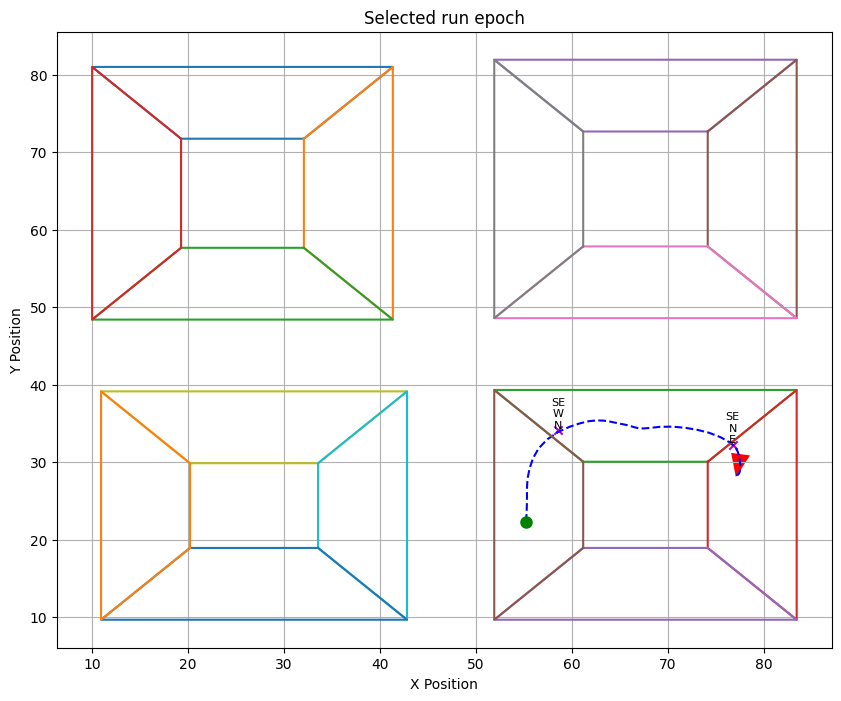

In [ ]:

# Example usage:
# plot quarter turns 1 to 3
trapeze_switch_times=plot_single_run_epoch_based_on_startstopindexex(traject_time, smoothed_positions_cm, turns_df,[391, 433],all_trapezes_coordinates_cm, points_for_direction=8)


52.55493729970901


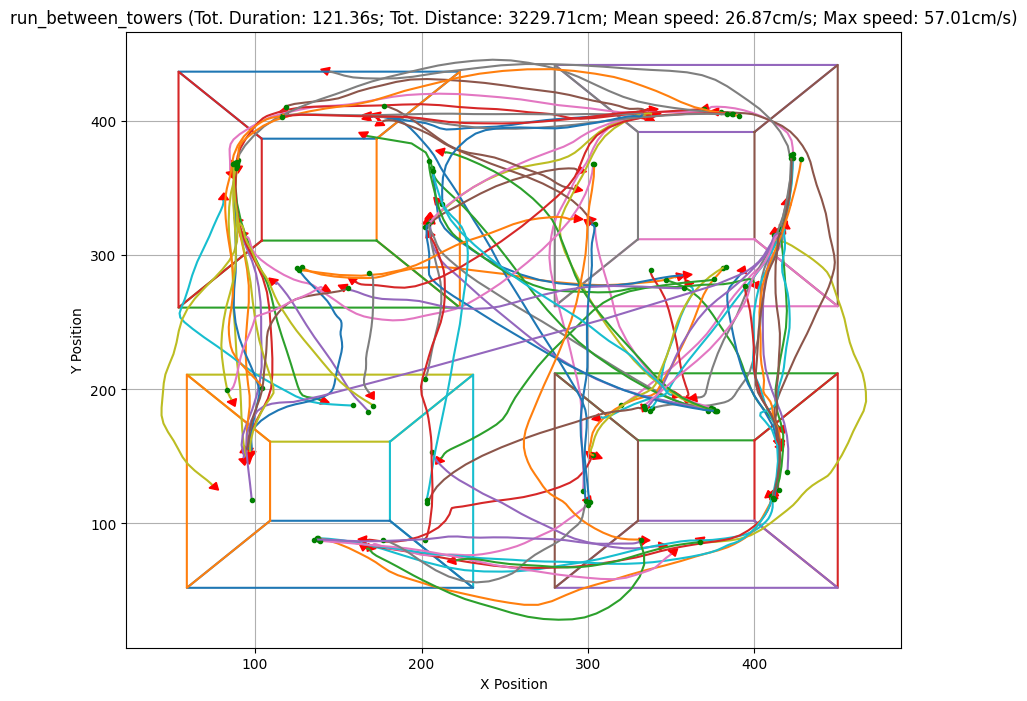

In [ ]:
plot_run_type(traject_time, smoothed_Xpositions, smoothed_Ypositions, all_epochs, runtype='run_between_towers', all_trapezes_coordinates=all_trapezes_coordinates, q=4)

In [ ]:
runs_between_towers=all_epochs['run_between_towers'].copy()
for run_index,run_between_towers in enumerate(runs_between_towers):
    print(run_index)
    epoch_start_stop_indexes=[run_between_towers[0][0],run_between_towers[0][1]]
    print(epoch_start_stop_indexes)
    start_stop_times_run_epoch=[traject_time[run_between_towers[0][0]],traject_time[run_between_towers[0][1]]]
    turns_df
    #find the line the turns_df (the dataframe that contains all the switches of trapeze)
    #first lets checks that there is a crossing (case of animal not changing of trapze)
    condition = (turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])
    if not condition.any():
        print('no trapeze switch')
        continue
    
    switch_in_turns_df = turns_df[(turns_df['time'] >= start_stop_times_run_epoch[0]) & (turns_df['time'] <= start_stop_times_run_epoch[1])]
    type_of_turn={'Rewarded':'','direction':''}
    type_of_turn['Rewarded']=switch_in_turns_df.iloc[0]['Rewarded']
    if switch_in_turns_df.iloc[0]['turnDirection']==270:
        type_of_turn['direction']='CW'
    else:
        type_of_turn['direction']='CCW'
    runs_between_towers[run_index].append(type_of_turn)
    


0
[0, 50]
1
[522, 559]
2
[745, 801]
3
[855, 875]
no trapeze switch
4
[971, 999]
5
[1058, 1093]
6
[1115, 1138]
7
[1217, 1248]
8
[1332, 1361]
9
[1391, 1441]
10
[1446, 1492]
11
[1705, 1739]
no trapeze switch
12
[1815, 1842]
13
[1929, 1962]
no trapeze switch
14
[2016, 2041]
15
[2299, 2334]
16
[2389, 2413]
17
[2451, 2492]
18
[2501, 2527]
19
[2801, 2835]
20
[3065, 3111]
21
[3204, 3241]
22
[3329, 3356]
23
[3381, 3416]
24
[3470, 3511]
25
[3552, 3578]
26
[3734, 3764]
no trapeze switch
27
[4242, 4259]
no trapeze switch
28
[4382, 4410]
no trapeze switch
29
[4619, 4639]
no trapeze switch
30
[5019, 5042]
31
[5143, 5185]
32
[5193, 5230]
33
[5492, 5533]
34
[5540, 5558]
35
[5601, 5642]
36
[5649, 5675]
37
[5720, 5759]
38
[5789, 5816]
39
[5968, 5996]
40
[6101, 6126]
41
[6253, 6277]
42
[6390, 6427]
43
[6465, 6493]
44
[7034, 7062]
45
[7100, 7146]
46
[7175, 7205]
47
[7261, 7288]
48
[7807, 7827]
no trapeze switch
49
[7922, 7944]
50
[8066, 8115]
51
[8159, 8185]
52
[8247, 8279]
53
[8339, 8380]
54
[9373, 9425]

In [ ]:
trapeze_switch_times

[np.float64(15.024), np.float64(15.907), np.float64(16.707)]

In [ ]:
# TODO find in the between tower and toward tower if the animal got rewarded. 